<a href="https://colab.research.google.com/github/nattntn/DataPreparation_ForDeeptooth/blob/main/ICIP2025/ICIP2025_Step2_UpperThirdMolar_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import data set (เรียกใช้ CSV)

In [ ]:
import pandas as pd
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io
import cv2
import PIL
import os
import glob
import sys
import keras


In [ ]:
import keras


In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# path original

In [ ]:
original= pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')

# load data from CVAT

## 7Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/7YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df7 = pd.DataFrame(rows)
df7



tagName      Filename   left     top  width  height     Rleft  \
0   Upper Third Molar   FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1   Upper Third Molar   FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2   Upper Third Molar   FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3   Upper Third Molar   FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4   Upper Third Molar   FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
5   Upper Third Molar   FlipV85.jpg  318.2  199.45  33.76   33.48  0.518241   
6   Upper Third Molar  FlipVV83.jpg  304.2  185.50  37.14   35.20  0.495440   
7   Upper Third Molar  FlipVV91.jpg  304.8  217.60  27.10   34.80  0.496417   
8   Upper Third Molar  FlipVV94.jpg  296.2  183.50  33.30   33.80  0.482410   
9   Upper Third Molar  FlipVV98.jpg  259.9  186.00  52.96   45.70  0.423290   
10  Upper Third Molar       V79.jpg  307.0  250.37  63.10   56.13  0.500000   
11  Upper Third Molar      VV83.jpg  324.7  171.60  33.20   35.70  0.528827   
12  Upper Third Molar      VV88.jpg  311.4  194.86  56.97   50.44  0.507166   
13  Upper Third Molar      VV91.jpg  318.9  206.66  27.50   34.24  0.519381   
14  Upper Third Molar      VV94.jpg  299.9  204.90  36.40   28.40  0.488436   
15  Upper Third Molar      VV98.jpg  290.9  187.80  39.90   25.50  0.473779   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.408410  0.044463  0.053976  0.457248  0.435398  
1   0.393147  0.047720  0.048745  0.505945  0.417519  
2   0.393050  0.079365  0.088803  0.510855  0.437452  
3   0.429923  0.060098  0.057915  0.444218  0.458880  
4   0.434556  0.057655  0.056197  0.486971  0.462654  
5   0.385039  0.054984  0.064633  0.545733  0.417355  
6   0.358108  0.060489  0.067954  0.525684  0.392085  
7   0.420077  0.044137  0.067181  0.518485  0.453668  
8   0.354247  0.054235  0.065251  0.509528  0.386873  
9   0.359073  0.086254  0.088224  0.466417  0.403185  
10  0.430929  0.102769  0.096609  0.551384  0.479234  
11  0.331274  0.054072  0.068919  0.555863  0.365734  
12  0.376178  0.092785  0.097375  0.553559  0.424865  
13  0.398958  0.044788  0.066100  0.541775  0.432008  
14  0.395560  0.059283  0.054826  0.518078  0.422973  
15  0.362548  0.064984  0.049228  0.506270  0.387162

In [ ]:
len(set(df7['Filename']))

16

## 8Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/8YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df8 = pd.DataFrame(rows)
df8

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar   FlipP72.jpg  296.30  197.90  25.00   22.20  0.482573   
1   Upper Third Molar   FlipP74.jpg  295.80  195.90  37.10   32.10  0.481759   
2   Upper Third Molar   FlipP75.jpg  283.61  157.10  41.19   31.80  0.461906   
3   Upper Third Molar   FlipP77.jpg  295.70  209.40  29.43   31.40  0.481596   
4   Upper Third Molar   FlipP80.jpg  279.00  231.90  36.30   19.70  0.454397   
5   Upper Third Molar   FlipP82.jpg  253.30  303.30  54.00   41.47  0.412541   
6   Upper Third Molar   FlipP84.jpg  312.80  229.30  23.61   24.60  0.509446   
7   Upper Third Molar  FlipPP68.jpg  295.90  164.50  43.00   36.70  0.481922   
8   Upper Third Molar  FlipPP70.jpg  312.30  168.40  21.50   25.20  0.508632   
9   Upper Third Molar  FlipPP72.jpg  295.70  166.89  43.90   33.71  0.481596   
10  Upper Third Molar  FlipPP75.jpg  235.30  173.20  50.20   35.60  0.383225   
11  Upper Third Molar  FlipPP76.jpg  248.70  211.90  31.01   39.20  0.405049   
12  Upper Third Molar  FlipPP80.jpg  293.80  197.50  29.50   32.10  0.478502   
13  Upper Third Molar  FlipPP83.jpg  308.20  183.10  33.15   30.00  0.501954   
14  Upper Third Molar       P70.jpg  308.90  220.50  28.20   18.10  0.503094   
15  Upper Third Molar       P72.jpg  319.30  191.30  26.15   33.30  0.520033   
16  Upper Third Molar       P73.jpg  319.04  240.38  20.00   23.96  0.519609   
17  Upper Third Molar       P74.jpg  307.30  194.51  38.90   30.79  0.500489   
18  Upper Third Molar       P75.jpg  286.80  172.50  37.92   27.40  0.467101   
19  Upper Third Molar       P77.jpg  281.90  208.27  42.98   39.93  0.459121   
20  Upper Third Molar       P80.jpg  288.20  230.90  42.10   35.90  0.469381   
21  Upper Third Molar       P81.jpg  290.90  201.20  32.40   24.90  0.473779   
22  Upper Third Molar       P82.jpg  248.70  303.80  39.50   47.00  0.405049   
23  Upper Third Molar      PP68.jpg  292.30  168.30  30.68   34.98  0.476059   
24  Upper Third Molar      PP72.jpg  295.20  169.14  25.60   34.46  0.480782   
25  Upper Third Molar      PP75.jpg  266.60  188.70  33.02   29.20  0.434202   
26  Upper Third Molar      PP80.jpg  289.00  188.90  36.90   40.29  0.470684   
27  Upper Third Molar      PP83.jpg  315.90  182.95  29.20   34.25  0.514495   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.382046  0.040717  0.042857  0.502932  0.403475  
1   0.378185  0.060423  0.061969  0.511971  0.409170  
2   0.303282  0.067085  0.061390  0.495448  0.333977  
3   0.404247  0.047932  0.060618  0.505562  0.434556  
4   0.399139  0.059121  0.033907  0.483958  0.416093  
5   0.463761  0.087948  0.063410  0.456515  0.495466  
6   0.394664  0.038453  0.042341  0.528673  0.415835  
7   0.317568  0.070033  0.070849  0.516938  0.352992  
8   0.325097  0.035016  0.048649  0.526140  0.349421  
9   0.322181  0.071498  0.065077  0.517345  0.354720  
10  0.334363  0.081759  0.068726  0.424104  0.368726  
11  0.409073  0.050505  0.075676  0.430301  0.446911  
12  0.339931  0.048046  0.055250  0.502524  0.367556  
13  0.353475  0.053990  0.057915  0.528950  0.382432  
14  0.425676  0.045928  0.034942  0.526059  0.443147  
15  0.369305  0.042590  0.064286  0.541327  0.401448  
16  0.464054  0.032573  0.046255  0.535896  0.487181  
17  0.375502  0.063355  0.059440  0.532166  0.405222  
18  0.333012  0.061759  0.052896  0.497980  0.359459  
19  0.402066  0.070000  0.077085  0.494121  0.440608  
20  0.397418  0.068567  0.061790  0.503664  0.428313  
21  0.388417  0.052769  0.048069  0.500163  0.412452  
22  0.464526  0.064332  0.071865  0.437215  0.500459  
23  0.324903  0.049967  0.067529  0.501042  0.358668  
24  0.326525  0.041694  0.066525  0.501629  0.359788  
25  0.364286  0.053779  0.056371  0.461091  0.392471  
26  0.325129  0.060098  0.069346  0.500733  0.359802  
27  0.353185  0.047557  0.066120  0.538274  0.386245

In [ ]:
len(set(df8['Filename']))

28

## 9Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/9YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df9 = pd.DataFrame(rows)
df9

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar   FlipW81.jpg  263.50  177.63  47.00   33.31  0.429153   
1   Upper Third Molar   FlipW84.jpg  268.50  197.30  32.80   34.40  0.437296   
2   Upper Third Molar   FlipW85.jpg  264.71  197.25  42.60   37.05  0.431124   
3   Upper Third Molar   FlipW86.jpg  270.00  193.86  42.24   41.44  0.439739   
4   Upper Third Molar   FlipW88.jpg  254.80  191.88  35.46   33.62  0.414984   
5   Upper Third Molar   FlipW89.jpg  287.90  199.50  52.67   40.30  0.468893   
6   Upper Third Molar   FlipW90.jpg  291.30  224.33  61.70   58.97  0.474430   
7   Upper Third Molar   FlipW95.jpg  283.40  235.88  45.10   23.02  0.461564   
8   Upper Third Molar  FlipWW75.jpg  291.20  170.53  38.00   31.07  0.474267   
9   Upper Third Molar  FlipWW76.jpg  233.70  154.00  42.20   42.20  0.380619   
10  Upper Third Molar  FlipWW77.jpg  257.60  186.30  37.70   36.20  0.419544   
11  Upper Third Molar  FlipWW78.jpg  275.70  176.40  36.40   31.20  0.449023   
12  Upper Third Molar  FlipWW79.jpg  265.50  163.80  40.68   39.08  0.432410   
13  Upper Third Molar  FlipWW80.jpg  304.80  179.40  43.70   44.10  0.496417   
14  Upper Third Molar  FlipWW81.jpg  275.90  163.90  42.00   35.80  0.449349   
15  Upper Third Molar  FlipWW82.jpg  228.90  177.90  38.60   35.10  0.372801   
16  Upper Third Molar  FlipWW83.jpg  281.80  198.70  39.28   34.70  0.458958   
17  Upper Third Molar  FlipWW88.jpg  267.40  196.04  42.35   30.74  0.435505   
18  Upper Third Molar       W81.jpg  272.50  182.74  50.00   36.96  0.443811   
19  Upper Third Molar       W84.jpg  265.50  196.18  46.93   36.32  0.432410   
20  Upper Third Molar       W85.jpg  281.50  200.70  40.30   41.00  0.458469   
21  Upper Third Molar       W86.jpg  269.40  192.80  44.18   37.50  0.438762   
22  Upper Third Molar       W89.jpg  294.80  203.10  53.94   39.60  0.480130   
23  Upper Third Molar       W95.jpg  288.60  245.04  32.70   24.02  0.470033   
24  Upper Third Molar      WW76.jpg  226.60  165.36  38.30   38.03  0.369055   
25  Upper Third Molar      WW77.jpg  250.40  189.87  42.97   33.31  0.407818   
26  Upper Third Molar      WW78.jpg  289.80  181.20  41.13   32.14  0.471987   
27  Upper Third Molar      WW79.jpg  280.70  155.50  44.50   36.10  0.457166   
28  Upper Third Molar      WW80.jpg  305.80  189.40  54.90   46.50  0.498046   
29  Upper Third Molar      WW81.jpg  298.30  186.00  25.20   24.50  0.485831   
30  Upper Third Molar      WW82.jpg  251.10  173.50  41.90   30.00  0.408958   
31  Upper Third Molar      WW85.jpg  301.50  183.30  28.60   33.30  0.491042   
32  Upper Third Molar      WW88.jpg  269.17  202.63  40.23   37.47  0.438388   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.342915  0.076547  0.064305  0.467427  0.375068  
1   0.380888  0.053420  0.066409  0.464007  0.414093  
2   0.380792  0.069381  0.071525  0.465814  0.416554  
3   0.374247  0.068795  0.080000  0.474137  0.414247  
4   0.330258  0.057752  0.057866  0.443860  0.359191  
5   0.385135  0.085782  0.077799  0.511783  0.424035  
6   0.433069  0.100489  0.113842  0.524674  0.489990  
7   0.405990  0.073453  0.039621  0.498290  0.425800  
8   0.329208  0.061889  0.059981  0.505212  0.359199  
9   0.297297  0.068730  0.081467  0.414984  0.338031  
10  0.359653  0.061401  0.069884  0.450244  0.394595  
11  0.340541  0.059283  0.060232  0.478664  0.370656  
12  0.316216  0.066254  0.075444  0.465537  0.353938  
13  0.346332  0.071173  0.085135  0.532003  0.388900  
14  0.316409  0.068404  0.069112  0.483550  0.350965  
15  0.343436  0.062866  0.067761  0.404235  0.377317  
16  0.383591  0.063974  0.066988  0.490945  0.417085  
17  0.378456  0.068974  0.059344  0.469992  0.408127  
18  0.352780  0.081433  0.071351  0.484528  0.388456  
19  0.378726  0.076433  0.070116  0.470627  0.413784  
20  0.387452  0.065635  0.079151  0.491287  0.427027  
21  0.372201  0.071954  0.072394  0.474739  0.408398  
22  0.392085  0.087850  0.07

In [ ]:
len(set(df9['Filename']))

33

## 10Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/10YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df10 = pd.DataFrame(rows)
df10

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar   FlipH76.jpg  282.70  192.80  61.00   42.70  0.460423   
1   Upper Third Molar   FlipH79.jpg  280.00  174.60  37.18   34.00  0.456026   
2   Upper Third Molar   FlipH80.jpg  282.87  183.70  56.11   40.20  0.460700   
3   Upper Third Molar   FlipH85.jpg  211.60  262.10  55.80   42.20  0.344625   
4   Upper Third Molar   FlipH86.jpg  263.50  206.60  44.70   34.70  0.429153   
5   Upper Third Molar   FlipH88.jpg  263.60  208.50  44.40   34.10  0.429316   
6   Upper Third Molar   FlipH89.jpg  274.90  212.30  47.60   30.70  0.447720   
7   Upper Third Molar   FlipH93.jpg  294.20  230.30  63.40   41.70  0.479153   
8   Upper Third Molar  FlipHH84.jpg  285.70  165.40  55.50   49.00  0.465309   
9   Upper Third Molar  FlipHH87.jpg  243.20  200.10  52.60   40.90  0.396091   
10  Upper Third Molar  FlipHH88.jpg  288.70  150.20  38.10   30.20  0.470195   
11  Upper Third Molar  FlipHH91.jpg  280.00  188.20  52.00   43.80  0.456026   
12  Upper Third Molar  FlipHH93.jpg  244.50  176.00  37.67   30.40  0.398208   
13  Upper Third Molar  FlipHH94.jpg  273.60  157.30  58.30   37.70  0.445603   
14  Upper Third Molar  FlipHH95.jpg  283.70  159.10  45.97   39.40  0.462052   
15  Upper Third Molar       H79.jpg  292.90  171.00  37.40   34.10  0.477036   
16  Upper Third Molar       H80.jpg  289.30  184.50  49.30   52.60  0.471173   
17  Upper Third Molar       H81.jpg  279.00  185.00  41.10   33.18  0.454397   
18  Upper Third Molar       H85.jpg  230.43  271.00  37.17   26.40  0.375293   
19  Upper Third Molar       H86.jpg  265.40  205.24  37.80   40.36  0.432248   
20  Upper Third Molar       H87.jpg  299.60  220.92  37.80   30.18  0.487948   
21  Upper Third Molar       H88.jpg  265.30  204.20  38.60   40.60  0.432085   
22  Upper Third Molar       H93.jpg  298.00  238.00  32.80   39.60  0.485342   
23  Upper Third Molar      HH87.jpg  258.90  192.40  46.30   42.57  0.421661   
24  Upper Third Molar      HH88.jpg  304.50  147.80  42.00   29.50  0.495928   
25  Upper Third Molar      HH91.jpg  310.50  192.08  35.72   37.62  0.505700   
26  Upper Third Molar      HH94.jpg  285.50  163.40  40.59   30.50  0.464984   
27  Upper Third Molar      HH95.jpg  305.10  159.19  36.30   29.21  0.496906   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.372201  0.099349  0.082432  0.510098  0.413417  
1   0.337066  0.060554  0.065637  0.486303  0.369884  
2   0.354633  0.091384  0.077606  0.506393  0.393436  
3   0.451119  0.090879  0.072633  0.390065  0.487435  
4   0.355594  0.072801  0.059725  0.465554  0.385456  
5   0.358864  0.072313  0.058692  0.465472  0.388210  
6   0.365404  0.077524  0.052840  0.486482  0.391824  
7   0.396386  0.103257  0.071773  0.530782  0.432272  
8   0.319305  0.090391  0.094595  0.510505  0.366602  
9   0.386293  0.085668  0.078958  0.438925  0.425772  
10  0.289961  0.062052  0.058301  0.501221  0.319112  
11  0.363320  0.084691  0.084556  0.498371  0.405598  
12  0.339768  0.061352  0.058687  0.428884  0.369112  
13  0.303668  0.094951  0.072780  0.493078  0.340058  
14  0.307143  0.074870  0.076062  0.499487  0.345174  
15  0.330116  0.060912  0.065830  0.507492  0.363031  
16  0.356178  0.080293  0.101544  0.511319  0.406950  
17  0.357143  0.066938  0.064054  0.487866  0.389170  
18  0.466437  0.060537  0.045439  0.405562  0.489157  
19  0.353253  0.061564  0.069466  0.463029  0.387986  
20  0.380241  0.061564  0.051945  0.518730  0.406213  
21  0.351463  0.062866  0.069880  0.463518  0.386403  
22  0.409639  0.053420  0.068158  0.512052  0.443718  
23  0.371429  0.075407  0.082181  0.459365  0.412519  
24  0.285328  0.068404  0.056950  0.530130  0.313803  
25  0.370811  0.058176  0.072625  0.534788  0.407124  
26  0.315444  0.066107  0.058880  0.498037  0.344884  
27  0.307317  0.059121  0.056390  0.526466  0.335512

In [ ]:
len(set(df10['Filename']))

28

## 11Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/11YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df11 = pd.DataFrame(rows)
df11

tagName       Filename    left     top  width  height     Rleft  \
0   Upper Third Molar        D78.jpg  234.30  262.80  51.10   54.10  0.381596   
1   Upper Third Molar        D79.jpg  278.10  174.40  41.00   34.00  0.452932   
2   Upper Third Molar        D83.jpg  283.10  154.70  37.00   31.20  0.461075   
3   Upper Third Molar        D85.jpg  274.00  204.70  47.70   44.80  0.446254   
4   Upper Third Molar        D87.jpg  301.10  170.30  48.60   43.00  0.490391   
5   Upper Third Molar        D88.jpg  294.70  191.00  19.80   23.00  0.479967   
6   Upper Third Molar        D89.jpg  282.90  206.30  42.10   39.60  0.460749   
7   Upper Third Molar        D90.jpg  280.00  190.75  26.80   20.05  0.456026   
8   Upper Third Molar        D91.jpg  239.20  199.30  44.50   43.40  0.389577   
9   Upper Third Molar        D92.jpg  290.00  178.40  48.60   45.60  0.472313   
10  Upper Third Molar      DD100.jpg  267.30  187.30  52.50   46.70  0.435342   
11  Upper Third Molar      DD106.jpg  279.30  207.52  18.30   13.30  0.454886   
12  Upper Third Molar      DD107.jpg  270.10  136.90  56.00   45.60  0.439902   
13  Upper Third Molar      DD108.jpg  282.20  178.70  53.70   51.50  0.459609   
14  Upper Third Molar      DD110.jpg  287.30  218.90  49.40   43.60  0.467915   
15  Upper Third Molar      DD111.jpg  293.70  135.40  50.20   44.30  0.478339   
16  Upper Third Molar      DD113.jpg  267.80  166.50  50.80   52.80  0.436156   
17  Upper Third Molar      DD115.jpg  276.50  175.30  50.50   49.00  0.450326   
18  Upper Third Molar      DD117.jpg  268.80  157.90  46.60   44.20  0.437785   
19  Upper Third Molar      DD118.jpg  259.90  213.80  29.10   22.60  0.423290   
20  Upper Third Molar      DD121.jpg  263.30  160.60  40.90   43.90  0.428827   
21  Upper Third Molar       DD95.jpg  265.60  155.20  50.60   46.00  0.432573   
22  Upper Third Molar       DD98.jpg  265.50  184.03  42.59   37.87  0.432410   
23  Upper Third Molar       DD99.jpg  273.60  173.10  42.70   42.10  0.445603   
24  Upper Third Molar    FlipD78.jpg  256.10  270.60  52.77   53.30  0.417101   
25  Upper Third Molar    FlipD79.jpg  260.50  176.60  51.20   38.60  0.424267   
26  Upper Third Molar    FlipD80.jpg  284.10  175.10  30.60   20.50  0.462704   
27  Upper Third Molar    FlipD82.jpg  232.91  195.70  62.70   49.30  0.379332   
28  Upper Third Molar    FlipD83.jpg  281.70  166.40  43.70   29.20  0.458795   
29  Upper Third Molar    FlipD85.jpg  272.10  207.70  44.01   41.30  0.443160   
30  Upper Third Molar    FlipD87.jpg  280.80  170.20  45.40   40.60  0.457329   
31  Upper Third Molar    FlipD89.jpg  275.40  206.10  46.90   40.60  0.448534   
32  Upper Third Molar    FlipD91.jpg  244.10  181.70  51.84   50.30  0.397557   
33  Upper Third Molar    FlipD92.jpg  276.50  181.90  46.90   50.10  0.450326   
34  Upper Third Molar  FlipDD100.jpg  268.60  187.70  48.70   46.58  0.437459   
35  Upper Third Molar  FlipDD101.jpg  296.70  207.70  48.80   44.80  0.483225   
36  Upper Third Molar  FlipDD106.jpg  242.00  211.00  24.80   22.70  0.394137   
37  Upper Third Molar  FlipDD108.jpg  285.00  173.20  53.60   47.70  0.464169   
38  Upper Third Molar  FlipDD110.jpg  281.40  226.10  52.80   41.60  0.458306   
39  Upper Third Molar  FlipDD111.jpg  296.10  142.90  45.60   35.30  0.482248   
40  Upper Third Molar  FlipDD113.jpg  249.80  165.80  55.10   46.40  0.406840   
41  Upper Third Molar  FlipDD115.jpg  268.60  170.30  49.60   46.40  0.437459   
42  Upper Third Molar  FlipDD117.jpg  250.70  155.10  47.10   44.80  0.408306   
43  Upper Third Molar  FlipDD118.jpg  251.40  180.10  35.40   36.70  0.409446   
44  Upper Third Molar  FlipDD121.jpg  264.30  149.80  47.70   44.60  0.430456   
45  Upper Third Molar   FlipDD95.jpg  253.60  138.30  49.80   48.80  0.413029   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.401835  0.083225  0.082722  0.423208  0.443196  
1   0.336680  0.066775  0.065637  0.486319  0.369498  
2   0.298649  0.060261  0.060232  0.49120

In [ ]:
len(set(df11['Filename']))

46

## 12Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/12YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df12 = pd.DataFrame(rows)
df12

tagName       Filename    left     top  width  height     Rleft  \
0   Upper Third Molar    FlipO85.jpg  248.02  175.00  42.88   31.10  0.403941   
1   Upper Third Molar    FlipO86.jpg  278.50  173.50  39.30   37.80  0.453583   
2   Upper Third Molar    FlipO89.jpg  262.70  149.50  51.60   45.70  0.427850   
3   Upper Third Molar    FlipO90.jpg  270.40  193.50  54.50   46.00  0.440391   
4   Upper Third Molar    FlipO91.jpg  284.80  178.10  44.30   42.90  0.463844   
5   Upper Third Molar    FlipO93.jpg  267.60  215.10  40.90   42.10  0.435831   
6   Upper Third Molar    FlipO94.jpg  298.60  191.92  40.30   31.68  0.486319   
7   Upper Third Molar    FlipO95.jpg  253.40  188.30  55.70   42.00  0.412704   
8   Upper Third Molar    FlipO97.jpg  246.50  199.00  45.50   42.40  0.401466   
9   Upper Third Molar    FlipO98.jpg  256.30  162.30  53.90   46.60  0.417427   
10  Upper Third Molar    FlipO99.jpg  246.00  169.70  54.37   51.10  0.400651   
11  Upper Third Molar  FlipOO103.jpg  265.90  143.70  54.50   52.20  0.433062   
12  Upper Third Molar  FlipOO104.jpg  261.20  156.80  60.20   41.80  0.425407   
13  Upper Third Molar  FlipOO106.jpg  281.90  189.78  44.40   40.52  0.459121   
14  Upper Third Molar  FlipOO110.jpg  269.90  184.10  43.60   44.90  0.439577   
15  Upper Third Molar  FlipOO111.jpg  294.90  199.90  53.80   50.50  0.480293   
16  Upper Third Molar  FlipOO112.jpg  240.80  149.80  35.30   27.60  0.392182   
17  Upper Third Molar  FlipOO115.jpg  268.90  152.10  49.50   45.90  0.437948   
18  Upper Third Molar  FlipOO116.jpg  243.50  191.16  51.50   47.64  0.396580   
19  Upper Third Molar  FlipOO117.jpg  259.73  150.93  35.97   40.79  0.423013   
20  Upper Third Molar  FlipOO118.jpg  232.70  164.40  51.80   47.80  0.378990   
21  Upper Third Molar   FlipOO97.jpg  263.90  172.60  56.60   43.50  0.429805   
22  Upper Third Molar   FlipOO99.jpg  250.41  173.90  45.20   38.70  0.407834   
23  Upper Third Molar        O85.jpg  256.00  182.20  42.40   35.70  0.416938   
24  Upper Third Molar        O87.jpg  272.90  183.90  48.70   43.80  0.444463   
25  Upper Third Molar        O89.jpg  279.40  156.70  49.80   46.30  0.455049   
26  Upper Third Molar        O90.jpg  286.50  183.90  48.80   45.80  0.466612   
27  Upper Third Molar        O92.jpg  280.60  186.60  52.60   43.10  0.457003   
28  Upper Third Molar        O93.jpg  290.30  219.00  39.60   40.90  0.472801   
29  Upper Third Molar        O94.jpg  317.50  184.91  46.90   39.88  0.517101   
30  Upper Third Molar        O95.jpg  270.20  188.80  50.80   43.40  0.440065   
31  Upper Third Molar        O97.jpg  258.30  191.00  54.40   46.50  0.420684   
32  Upper Third Molar        O98.jpg  260.10  157.30  50.90   43.80  0.423616   
33  Upper Third Molar      OO103.jpg  288.60  157.30  52.20   51.20  0.470033   
34  Upper Third Molar      OO104.jpg  283.30  157.30  51.80   42.80  0.461401   
35  Upper Third Molar      OO106.jpg  303.02  184.30  50.68   39.50  0.493518   
36  Upper Third Molar      OO107.jpg  272.60  155.89  41.30   37.51  0.443974   
37  Upper Third Molar      OO110.jpg  275.30  183.60  47.40   41.80  0.448371   
38  Upper Third Molar      OO111.jpg  297.50  194.90  45.00   45.10  0.484528   
39  Upper Third Molar      OO115.jpg  265.00  158.90  49.10   43.80  0.431596   
40  Upper Third Molar      OO116.jpg  251.10  199.27  46.70   44.23  0.408958   
41  Upper Third Molar      OO117.jpg  272.66  150.30  48.54   41.70  0.444072   
42  Upper Third Molar       OO97.jpg  260.24  164.50  53.66   48.30  0.423844   
43  Upper Third Molar       OO99.jpg  274.10  170.40  47.80   39.10  0.446417   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.337838  0.069837  0.060039  0.438860  0.367857  
1   0.334942  0.064007  0.072973  0.485586  0.371429  
2   0.288610  0.084039  0.088224  0.469870  0.332722  
3   0.373552  0.088762  0.088803  0.484772  0.417954  
4   0.343822  0.072150  0.082819  0.499919  0.385232  
5   0.415251  0.066612  0.081274  0.46

In [ ]:
len(set(df12['Filename']))

44

## 13Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/13YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df13 = pd.DataFrame(rows)
df13

tagName       Filename    left     top  width  height     Rleft  \
0   Upper Third Molar   FlipG101.jpg  255.80  206.80  53.00   45.80  0.416612   
1   Upper Third Molar   FlipG103.jpg  241.70  166.80  45.53   41.00  0.393648   
2   Upper Third Molar   FlipG105.jpg  269.10  183.40  44.70   56.16  0.438274   
3   Upper Third Molar   FlipG109.jpg  269.80  208.20  49.00   44.80  0.439414   
4   Upper Third Molar   FlipG110.jpg  257.80  173.30  62.40   53.80  0.419870   
5   Upper Third Molar   FlipG111.jpg  238.90  159.20  58.60   50.80  0.389088   
6   Upper Third Molar    FlipG83.jpg  267.30  204.20  53.60   45.10  0.435342   
7   Upper Third Molar    FlipG84.jpg  289.90  199.20  52.70   42.20  0.472150   
8   Upper Third Molar    FlipG92.jpg  268.60  166.00  55.50   49.10  0.437459   
9   Upper Third Molar    FlipG93.jpg  288.10  172.40  41.80   37.80  0.469218   
10  Upper Third Molar    FlipG94.jpg  234.10  202.03  51.86   57.27  0.381270   
11  Upper Third Molar    FlipG98.jpg  280.30  180.00  47.20   38.80  0.456515   
12  Upper Third Molar  FlipGG117.jpg  256.30  155.30  48.30   52.90  0.417427   
13  Upper Third Molar  FlipGG119.jpg  252.30  168.80  48.80   52.20  0.410912   
14  Upper Third Molar  FlipGG120.jpg  216.60  184.40  45.30   48.60  0.352769   
15  Upper Third Molar  FlipGG121.jpg  257.00  161.80  43.70   51.50  0.418567   
16  Upper Third Molar  FlipGG124.jpg  224.56  187.80  56.44   48.90  0.365733   
17  Upper Third Molar  FlipGG125.jpg  246.20  185.70  50.20   42.30  0.400977   
18  Upper Third Molar  FlipGG129.jpg  268.10  170.40  44.50   43.20  0.436645   
19  Upper Third Molar  FlipGG132.jpg  279.80  160.60  40.90   44.60  0.455700   
20  Upper Third Molar  FlipGG136.jpg  253.90  178.20  47.80   49.10  0.413518   
21  Upper Third Molar  FlipGG137.jpg  270.40  119.40  35.10   25.40  0.440391   
22  Upper Third Molar  FlipGG138.jpg  233.70  147.30  54.10   55.80  0.380619   
23  Upper Third Molar  FlipGG139.jpg  247.20  182.02  53.60   45.18  0.402606   
24  Upper Third Molar  FlipGG140.jpg  252.80  192.80  49.80   49.40  0.411726   
25  Upper Third Molar       G101.jpg  270.70  205.80  51.60   44.80  0.440879   
26  Upper Third Molar       G103.jpg  261.62  168.20  30.84   25.03  0.426091   
27  Upper Third Molar       G105.jpg  277.60  192.50  42.40   51.60  0.452117   
28  Upper Third Molar       G108.jpg  237.40  175.80  52.00   53.40  0.386645   
29  Upper Third Molar       G109.jpg  279.60  203.00  47.20   37.50  0.455375   
30  Upper Third Molar       G110.jpg  271.00  181.30  47.00   52.30  0.441368   
31  Upper Third Molar       G111.jpg  265.60  163.10  55.30   49.50  0.432573   
32  Upper Third Molar        G83.jpg  277.90  205.60  51.40   46.10  0.452606   
33  Upper Third Molar        G84.jpg  297.80  195.30  50.60   41.80  0.485016   
34  Upper Third Molar        G92.jpg  272.50  183.40  48.20   35.60  0.443811   
35  Upper Third Molar        G93.jpg  297.40  174.50  45.30   36.80  0.484365   
36  Upper Third Molar        G94.jpg  249.40  211.60  49.20   50.30  0.406189   
37  Upper Third Molar        G98.jpg  284.40  180.70  42.30   37.90  0.463192   
38  Upper Third Molar      GG117.jpg  263.30  154.62  50.10   52.68  0.428827   
39  Upper Third Molar      GG120.jpg  231.20  183.00  42.40   45.40  0.376547   
40  Upper Third Molar      GG121.jpg  271.20  155.80  43.70   58.90  0.441694   
41  Upper Third Molar      GG124.jpg  250.80  189.30  46.60   47.60  0.408469   
42  Upper Third Molar      GG125.jpg  268.70  187.90  46.80   48.90  0.437622   
43  Upper Third Molar      GG129.jpg  271.40  172.10  44.70   47.90  0.442020   
44  Upper Third Molar      GG132.jpg  292.20  184.50  51.60   42.40  0.475896   
45  Upper Third Molar      GG136.jpg  253.80  177.00  47.30   47.94  0.413355   
46  Upper Third Molar      GG137.jpg  279.40  139.80  31.20   33.30  0.455049   
47  Upper Third Molar      GG138.jpg  248.90  149.70  55.83   55.20  0.405375   
48  Upper Third Molar      GG139.jpg  267.00 

In [ ]:
len(set(df13['Filename']))

50

## 14Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/14YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df14 = pd.DataFrame(rows)
df14

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipY101.jpg  291.00  191.30  41.40   51.20  0.473941   
1   Upper Third Molar  FlipY104.jpg  240.10  187.90  44.70   57.90  0.391042   
2   Upper Third Molar  FlipY188.jpg  269.60  199.20  65.90   49.30  0.439088   
3   Upper Third Molar  FlipY190.jpg  268.30  183.00  49.40   51.10  0.436971   
4   Upper Third Molar  FlipY193.jpg  239.90  159.20  49.68   62.10  0.390717   
5   Upper Third Molar  FlipY198.jpg  257.10  191.80  54.10   47.51  0.418730   
6   Upper Third Molar  FlipY202.jpg  246.30  196.12  48.50   53.18  0.401140   
7   Upper Third Molar  FlipY204.jpg  258.70  162.20  51.70   47.50  0.421336   
8   Upper Third Molar  FlipY222.jpg  221.70  166.10  44.90   54.70  0.361075   
9   Upper Third Molar  FlipY236.jpg  251.80  177.10  53.50   57.20  0.410098   
10  Upper Third Molar  FlipY243.jpg  288.00  210.60  48.90   51.30  0.469055   
11  Upper Third Molar  FlipY247.jpg  244.70  190.50  40.70   42.80  0.398534   
12  Upper Third Molar  FlipY248.jpg  277.90  174.70  59.00   42.70  0.452606   
13  Upper Third Molar  FlipY251.jpg  279.50  162.60  57.00   48.80  0.455212   
14  Upper Third Molar  FlipY265.jpg  265.00  213.30  48.60   46.10  0.431596   
15  Upper Third Molar  FlipY270.jpg  260.19  180.50  55.61   49.10  0.423762   
16  Upper Third Molar  FlipY274.jpg  268.60  159.30  45.00   53.60  0.437459   
17  Upper Third Molar  FlipY278.jpg  265.60  179.20  40.50   52.90  0.432573   
18  Upper Third Molar  FlipY279.jpg  274.60  186.50  56.27   47.10  0.447231   
19  Upper Third Molar   FlipY96.jpg  261.50  199.90  59.60   59.80  0.425896   
20  Upper Third Molar   FlipY98.jpg  262.50  200.49  51.90   50.10  0.427524   
21  Upper Third Molar   FlipY99.jpg  264.40  174.50  51.10   52.40  0.430619   
22  Upper Third Molar      Y101.jpg  298.40  197.00  42.50   52.00  0.485993   
23  Upper Third Molar      Y104.jpg  244.60  182.60  48.10   58.00  0.398371   
24  Upper Third Molar      Y188.jpg  276.60  188.00  48.10   46.22  0.450489   
25  Upper Third Molar      Y190.jpg  279.70  172.10  51.40   50.50  0.455537   
26  Upper Third Molar      Y193.jpg  263.20  156.80  44.10   61.52  0.428664   
27  Upper Third Molar      Y198.jpg  282.10  197.90  51.60   49.30  0.459446   
28  Upper Third Molar      Y202.jpg  272.00  190.00  49.90   57.10  0.442997   
29  Upper Third Molar      Y204.jpg  273.90  169.36  46.90   46.54  0.446091   
30  Upper Third Molar      Y236.jpg  264.30  182.90  51.00   56.05  0.430456   
31  Upper Third Molar      Y240.jpg  254.60  174.30  54.30   47.40  0.414658   
32  Upper Third Molar      Y243.jpg  314.70  213.00  45.50   47.00  0.512541   
33  Upper Third Molar      Y245.jpg  268.40  146.30  62.30   55.70  0.437134   
34  Upper Third Molar      Y247.jpg  264.50  197.40  40.10   50.30  0.430782   
35  Upper Third Molar      Y251.jpg  271.20  166.80  45.70   42.10  0.441694   
36  Upper Third Molar      Y270.jpg  270.00  184.70  52.00   47.20  0.439739   
37  Upper Third Molar      Y274.jpg  280.80  166.00  55.10   57.00  0.457329   
38  Upper Third Molar      Y278.jpg  287.50  191.30  37.55   51.20  0.468241   
39  Upper Third Molar      Y279.jpg  282.30  181.80  71.50   53.70  0.459772   
40  Upper Third Molar      Y282.jpg  282.20  185.40  42.09   64.20  0.459609   
41  Upper Third Molar       Y96.jpg  270.40  203.31  54.40   57.80  0.440391   
42  Upper Third Molar       Y98.jpg  273.10  199.10  47.50   55.00  0.444788   
43  Upper Third Molar       Y99.jpg  275.80  172.40  50.30   52.98  0.449186   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.369305  0.067427  0.098842  0.507655  0.418726  
1   0.362741  0.072801  0.111776  0.427443  0.418629  
2   0.384556  0.107329  0.095174  0.492752  0.432143  
3   0.353282  0.080456  0.098649  0.477199  0.402606  
4   0.307336  0.080912  0.119884  0.431173  0.367278  
5   0.370270  0.088111  0.091718  0.462785  0.416129  
6   0.378610  0.078990  0.10

In [ ]:
len(set(df14['Filename']))

44

## 15Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/15YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df15 = pd.DataFrame(rows)
df15

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar      B148.jpg  273.90  177.90  56.30   44.50  0.446091   
1   Upper Third Molar      B153.jpg  267.30  174.00  44.50   53.20  0.435342   
2   Upper Third Molar      B154.jpg  292.10  194.20  57.50   63.30  0.475733   
3   Upper Third Molar      B157.jpg  278.60  190.40  58.00   53.80  0.453746   
4   Upper Third Molar      B158.jpg  270.73  151.86  61.80   66.17  0.440928   
5   Upper Third Molar       B16.jpg  296.70  198.56  30.35   26.84  0.483225   
6   Upper Third Molar      B162.jpg  255.00  155.70  62.19   48.90  0.415309   
7   Upper Third Molar      B165.jpg  298.40  192.40  49.97   44.12  0.485993   
8   Upper Third Molar      B166.jpg  278.00  186.20  53.80   51.50  0.452769   
9   Upper Third Molar      B175.jpg  283.20  208.00  44.60   65.00  0.461238   
10  Upper Third Molar      B176.jpg  272.00  204.60  44.60   68.40  0.442997   
11  Upper Third Molar      B179.jpg  295.90  166.60  57.00   50.00  0.481922   
12  Upper Third Molar      B181.jpg  297.90  195.70  39.80   32.10  0.485179   
13  Upper Third Molar      B183.jpg  250.30  187.10  46.80   52.10  0.407655   
14  Upper Third Molar      B251.jpg  253.10  166.90  56.30   59.90  0.412215   
15  Upper Third Molar      B299.jpg  262.70  184.40  53.30   52.90  0.427850   
16  Upper Third Molar      B300.jpg  254.91  180.80  54.39   61.70  0.415163   
17  Upper Third Molar      B313.jpg  244.90  175.40  56.50   58.40  0.398860   
18  Upper Third Molar      B332.jpg  260.40  154.50  50.60   66.20  0.424104   
19  Upper Third Molar      B333.jpg  277.10  185.30  49.20   56.40  0.451303   
20  Upper Third Molar      B334.jpg  302.50  189.70  32.20   47.40  0.492671   
21  Upper Third Molar      B336.jpg  256.10  194.90  54.60   55.70  0.417101   
22  Upper Third Molar       B99.jpg  264.30  169.40  52.10   48.20  0.430456   
23  Upper Third Molar  FlipB148.jpg  258.40  170.20  61.13   52.60  0.420847   
24  Upper Third Molar  FlipB153.jpg  255.20  170.80  44.90   57.50  0.415635   
25  Upper Third Molar  FlipB154.jpg  272.40  186.00  20.80   28.10  0.443648   
26  Upper Third Molar  FlipB155.jpg  233.50  189.60  55.20   49.90  0.380293   
27  Upper Third Molar  FlipB157.jpg  254.08  189.30  53.82   55.80  0.413811   
28  Upper Third Molar  FlipB158.jpg  266.10  152.80  58.00   63.80  0.433388   
29  Upper Third Molar  FlipB162.jpg  242.00  150.50  52.50   48.60  0.394137   
30  Upper Third Molar  FlipB165.jpg  302.30  197.50  56.70   45.10  0.492345   
31  Upper Third Molar  FlipB166.jpg  290.67  178.77  53.90   43.30  0.473404   
32  Upper Third Molar  FlipB175.jpg  283.20  204.14  49.70   74.06  0.461238   
33  Upper Third Molar  FlipB176.jpg  278.20  209.70  42.50   60.80  0.453094   
34  Upper Third Molar  FlipB179.jpg  293.00  157.50  58.10   52.10  0.477199   
35  Upper Third Molar  FlipB181.jpg  288.80  179.70  44.90   44.60  0.470358   
36  Upper Third Molar  FlipB183.jpg  242.10  184.80  50.40   53.90  0.394300   
37  Upper Third Molar  FlipB245.jpg  274.40  136.00  63.00   70.10  0.446906   
38  Upper Third Molar  FlipB251.jpg  236.80  149.02  59.60   65.58  0.385668   
39  Upper Third Molar  FlipB284.jpg  255.90  173.00  65.15   59.60  0.416775   
40  Upper Third Molar  FlipB285.jpg  251.40  117.20  55.00   58.30  0.409446   
41  Upper Third Molar  FlipB299.jpg  237.70  195.60  51.37   59.40  0.387134   
42  Upper Third Molar  FlipB300.jpg  242.00  170.70  61.10   62.90  0.394137   
43  Upper Third Molar  FlipB308.jpg  248.30  200.60  41.50   48.42  0.404397   
44  Upper Third Molar  FlipB310.jpg  265.70  182.80  53.00   49.90  0.432736   
45  Upper Third Molar  FlipB313.jpg  221.00  169.80  49.10   57.60  0.359935   
46  Upper Third Molar  FlipB317.jpg  278.90  160.35  50.00   65.45  0.454235   
47  Upper Third Molar  FlipB333.jpg  276.60  173.70  49.10   65.20  0.450489   
48  Upper Third Molar  FlipB334.jpg  289.90  182.10  42.90   54.10  0.472150   
49  Upper Thir

In [ ]:
len(set(df15['Filename']))

51

## 16Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/16YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df16 = pd.DataFrame(rows)
df16

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipT157.jpg  280.90  183.50  65.80   53.50  0.457492   
1   Upper Third Molar  FlipT159.jpg  270.90  157.20  52.40   57.10  0.441205   
2   Upper Third Molar  FlipT160.jpg  265.20  188.40  75.10   59.00  0.431922   
3   Upper Third Molar  FlipT163.jpg  263.50  186.60  53.80   52.40  0.429153   
4   Upper Third Molar  FlipT177.jpg  256.14  185.67  51.36   48.33  0.417166   
5   Upper Third Molar  FlipT178.jpg  269.80  211.70  47.80   44.50  0.439414   
6   Upper Third Molar  FlipT179.jpg  292.10  155.30  50.90   66.00  0.475733   
7   Upper Third Molar  FlipT181.jpg  272.30  183.90  54.50   51.90  0.443485   
8   Upper Third Molar  FlipT183.jpg  248.40  178.60  49.00   57.52  0.404560   
9   Upper Third Molar  FlipT191.jpg  261.70  176.80  44.30   56.70  0.426221   
10  Upper Third Molar  FlipT192.jpg  265.10  200.90  58.19   45.40  0.431759   
11  Upper Third Molar  FlipT195.jpg  276.20  154.00  60.40   54.70  0.449837   
12  Upper Third Molar  FlipT197.jpg  255.60  199.10  63.60   53.00  0.416287   
13  Upper Third Molar  FlipT198.jpg  260.70  208.80  54.10   65.30  0.424593   
14  Upper Third Molar  FlipT212.jpg  240.00  165.20  40.70   50.80  0.390879   
15  Upper Third Molar  FlipT216.jpg  257.50  168.90  42.10   55.60  0.419381   
16  Upper Third Molar  FlipT222.jpg  261.80  141.60  45.30   70.10  0.426384   
17  Upper Third Molar  FlipT228.jpg  254.00  165.20  75.50   69.00  0.413681   
18  Upper Third Molar  FlipT230.jpg  292.80  184.70  50.20   91.70  0.476873   
19  Upper Third Molar  FlipT231.jpg  266.30  173.10  50.40   63.66  0.433713   
20  Upper Third Molar  FlipT232.jpg  277.75  164.60  58.15   58.20  0.452362   
21  Upper Third Molar  FlipT237.jpg  248.70  165.10  51.10   67.80  0.405049   
22  Upper Third Molar  FlipT243.jpg  248.20  150.70  63.20   65.90  0.404235   
23  Upper Third Molar  FlipT250.jpg  244.80  160.40  58.95   61.60  0.398697   
24  Upper Third Molar  FlipT258.jpg  254.40  167.00  58.40   61.60  0.414332   
25  Upper Third Molar      T159.jpg  264.40  171.80  45.10   57.40  0.430619   
26  Upper Third Molar      T160.jpg  294.90  187.50  54.93   56.10  0.480293   
27  Upper Third Molar      T177.jpg  263.80  189.00  52.00   44.90  0.429642   
28  Upper Third Molar      T178.jpg  277.00  207.20  47.10   52.90  0.451140   
29  Upper Third Molar      T179.jpg  295.10  162.70  51.10   61.30  0.480619   
30  Upper Third Molar      T181.jpg  282.60  191.50  54.40   44.90  0.460261   
31  Upper Third Molar      T183.jpg  255.00  184.80  45.60   62.80  0.415309   
32  Upper Third Molar      T192.jpg  281.40  200.10  50.00   54.60  0.458306   
33  Upper Third Molar      T195.jpg  279.50  144.50  60.90   56.70  0.455212   
34  Upper Third Molar      T197.jpg  262.40  198.60  60.60   49.10  0.427362   
35  Upper Third Molar      T198.jpg  268.40  206.10  62.70   64.70  0.437134   
36  Upper Third Molar      T216.jpg  268.90  160.30  47.30   53.00  0.437948   
37  Upper Third Molar      T222.jpg  269.10  148.20  55.30   66.10  0.438274   
38  Upper Third Molar      T228.jpg  265.70  172.70  68.60   59.40  0.432736   
39  Upper Third Molar      T230.jpg  293.80  170.50  37.70   49.10  0.478502   
40  Upper Third Molar      T231.jpg  297.70  174.90  44.80   68.20  0.484853   
41  Upper Third Molar      T232.jpg  305.30  158.80  65.80   48.20  0.497231   
42  Upper Third Molar      T237.jpg  259.80  169.70  54.30   55.10  0.423127   
43  Upper Third Molar      T243.jpg  254.10  166.20  57.10   67.10  0.413844   
44  Upper Third Molar      T250.jpg  254.60  172.20  56.60   58.20  0.414658   
45  Upper Third Molar      T258.jpg  257.20  164.30  49.90   62.40  0.418893   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.354247  0.107166  0.103282  0.511075  0.405888  
1   0.303475  0.085342  0.110232  0.483876  0.358591  
2   0.363707  0.122313  0.113900  0.493078  0.420656  
3   0.360232  0.087622  0.101158 

In [ ]:
len(set(df16['Filename']))

46

## 17Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/17YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df17 = pd.DataFrame(rows)
df17

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipK141.jpg  263.70  187.20  38.20   56.00  0.429479   
1   Upper Third Molar  FlipK145.jpg  251.10  178.90  44.90   66.10  0.408958   
2   Upper Third Molar  FlipK149.jpg  270.90  189.10  46.70   47.12  0.441205   
3   Upper Third Molar  FlipK155.jpg  255.90  209.59  48.60   68.01  0.416775   
4   Upper Third Molar  FlipK157.jpg  257.30  167.31  48.30   68.49  0.419055   
5   Upper Third Molar  FlipK162.jpg  267.00  198.10  61.70   75.30  0.434853   
6   Upper Third Molar  FlipK167.jpg  272.74  179.90  57.36   47.00  0.444202   
7   Upper Third Molar  FlipK170.jpg  276.30  188.10  65.90   68.00  0.450000   
8   Upper Third Molar  FlipK176.jpg  279.64  171.90  41.78   52.80  0.455440   
9   Upper Third Molar  FlipK177.jpg  270.80  181.40  35.82   66.00  0.441042   
10  Upper Third Molar  FlipK180.jpg  250.30  191.40  59.90   65.70  0.407655   
11  Upper Third Molar  FlipK183.jpg  266.30  167.91  64.40   54.79  0.433713   
12  Upper Third Molar  FlipK186.jpg  254.30  173.50  67.50   66.90  0.414169   
13  Upper Third Molar  FlipK255.jpg  223.80  199.40  54.01   64.50  0.364495   
14  Upper Third Molar  FlipK257.jpg  245.50  198.10  56.90   60.10  0.399837   
15  Upper Third Molar  FlipK262.jpg  240.00  142.10  45.00   68.70  0.390879   
16  Upper Third Molar  FlipK269.jpg  291.80  208.32  50.27   61.48  0.475244   
17  Upper Third Molar  FlipK270.jpg  267.40  183.40  42.30   80.70  0.435505   
18  Upper Third Molar  FlipK292.jpg  262.00  190.80  49.40   68.60  0.426710   
19  Upper Third Molar  FlipK293.jpg  262.10  165.60  54.90   65.50  0.426873   
20  Upper Third Molar  FlipK314.jpg  257.50  195.00  60.40   58.60  0.419381   
21  Upper Third Molar  FlipK319.jpg  247.50  152.40  51.10   38.60  0.403094   
22  Upper Third Molar  FlipK320.jpg  246.70  135.50  65.40   53.00  0.401792   
23  Upper Third Molar  FlipK326.jpg  240.40  185.40  46.70   72.50  0.391531   
24  Upper Third Molar  FlipK327.jpg  286.00  185.90  41.60   47.90  0.465798   
25  Upper Third Molar      K141.jpg  291.00  190.80  39.90   57.20  0.473941   
26  Upper Third Molar      K145.jpg  289.40  179.20  52.09   56.10  0.471336   
27  Upper Third Molar      K155.jpg  263.30  210.59  42.88   60.41  0.428827   
28  Upper Third Molar      K157.jpg  266.30  171.10  49.70   64.40  0.433713   
29  Upper Third Molar      K162.jpg  275.60  192.10  53.80   73.30  0.448860   
30  Upper Third Molar      K167.jpg  282.11  191.50  57.90   45.00  0.459463   
31  Upper Third Molar      K176.jpg  279.41  182.30  53.70   55.00  0.455065   
32  Upper Third Molar      K177.jpg  288.20  174.65  39.30   69.65  0.469381   
33  Upper Third Molar      K180.jpg  271.40  197.80  61.20   62.40  0.442020   
34  Upper Third Molar      K183.jpg  270.40  164.34  50.80   53.26  0.440391   
35  Upper Third Molar      K186.jpg  245.10  184.50  56.20   66.20  0.399186   
36  Upper Third Molar      K255.jpg  249.10  206.20  38.20   53.90  0.405700   
37  Upper Third Molar      K257.jpg  249.90  174.20  52.28   82.70  0.407003   
38  Upper Third Molar      K262.jpg  253.80  141.96  45.40   67.14  0.413355   
39  Upper Third Molar      K266.jpg  277.20  117.50  47.70   63.40  0.451466   
40  Upper Third Molar      K269.jpg  311.50  210.10  55.00   64.20  0.507329   
41  Upper Third Molar      K270.jpg  270.90  188.30  48.10   79.88  0.441205   
42  Upper Third Molar      K273.jpg  274.00  161.50  51.49   60.20  0.446254   
43  Upper Third Molar      K292.jpg  282.80  181.80  46.70   66.80  0.460586   
44  Upper Third Molar      K293.jpg  279.40  174.82  51.60   70.38  0.455049   
45  Upper Third Molar      K314.jpg  269.20  188.50  43.10   60.70  0.438436   
46  Upper Third Molar      K319.jpg  257.80  148.30  51.20   45.60  0.419870   
47  Upper Third Molar      K320.jpg  258.90  131.20  61.60   65.90  0.421661   
48  Upper Third Molar      K326.jpg  266.40  183.70  45.70   68.10  0.433876   
49  Upper Thir

In [ ]:
len(set(df17['Filename']))

50

## 18Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/18YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df18 = pd.DataFrame(rows)
df18

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipS153.jpg  264.20  207.00  61.00   62.10  0.430293   
1   Upper Third Molar  FlipS155.jpg  259.70  213.90  42.10   58.30  0.422964   
2   Upper Third Molar  FlipS158.jpg  269.20  214.00  50.70   45.70  0.438436   
3   Upper Third Molar  FlipS159.jpg  287.90  178.50  44.60   52.30  0.468893   
4   Upper Third Molar  FlipS160.jpg  233.00  207.90  39.60   63.30  0.379479   
5   Upper Third Molar  FlipS165.jpg  279.60  127.30  53.40   75.80  0.455375   
6   Upper Third Molar  FlipS167.jpg  289.60  198.80  54.30   61.10  0.471661   
7   Upper Third Molar  FlipS169.jpg  251.10  204.70  49.90   59.20  0.408958   
8   Upper Third Molar  FlipS186.jpg  275.80  220.80  30.30   31.00  0.449186   
9   Upper Third Molar  FlipS189.jpg  278.30  194.00  57.20   71.90  0.453257   
10  Upper Third Molar  FlipS191.jpg  266.60  184.00  55.50   84.50  0.434202   
11  Upper Third Molar  FlipS195.jpg  263.30  187.20  66.80   57.25  0.428827   
12  Upper Third Molar  FlipS333.jpg  251.40  184.90  59.10   47.00  0.409446   
13  Upper Third Molar  FlipS342.jpg  249.70  168.35  61.98   53.05  0.406678   
14  Upper Third Molar  FlipS343.jpg  278.10  157.90  68.90   52.50  0.452932   
15  Upper Third Molar  FlipS345.jpg  244.00  174.60  47.30   65.80  0.397394   
16  Upper Third Molar  FlipS346.jpg  270.70  190.70  42.70   59.80  0.440879   
17  Upper Third Molar  FlipS348.jpg  257.40  179.70  59.80   54.10  0.419218   
18  Upper Third Molar  FlipS349.jpg  227.20  195.70  47.10   85.10  0.370033   
19  Upper Third Molar  FlipS351.jpg  256.20  182.80  54.20   54.80  0.417264   
20  Upper Third Molar  FlipS352.jpg  243.70  181.40  58.17   64.80  0.396906   
21  Upper Third Molar  FlipS354.jpg  258.20  154.00  49.30   70.90  0.420521   
22  Upper Third Molar  FlipS356.jpg  240.60  134.90  58.30   67.75  0.391857   
23  Upper Third Molar  FlipS358.jpg  249.30  167.90  45.60   71.60  0.406026   
24  Upper Third Molar  FlipS359.jpg  234.00  205.60  63.20   59.50  0.381107   
25  Upper Third Molar   FlipS36.jpg  254.60  166.30  62.70   78.10  0.414658   
26  Upper Third Molar      S153.jpg  274.10  194.10  62.60   68.20  0.446417   
27  Upper Third Molar      S155.jpg  264.30  227.00  46.30   52.80  0.430456   
28  Upper Third Molar      S158.jpg  281.30  211.60  55.47   49.80  0.458143   
29  Upper Third Molar      S159.jpg  294.60  183.00  48.60   48.10  0.479805   
30  Upper Third Molar      S160.jpg  239.40  192.50  46.00   78.80  0.389902   
31  Upper Third Molar      S165.jpg  300.50  143.00  59.90   80.40  0.489414   
32  Upper Third Molar      S167.jpg  279.35  220.20  53.65   60.90  0.454967   
33  Upper Third Molar      S169.jpg  257.10  208.10  64.30   69.90  0.418730   
34  Upper Third Molar      S186.jpg  313.30  202.74  33.30   28.96  0.510261   
35  Upper Third Molar      S189.jpg  282.10  195.60  58.90   52.60  0.459446   
36  Upper Third Molar      S191.jpg  271.10  197.40  53.70   69.30  0.441531   
37  Upper Third Molar      S195.jpg  271.30  194.30  56.80   64.30  0.441857   
38  Upper Third Molar      S342.jpg  254.40  182.20  59.10   54.20  0.414332   
39  Upper Third Molar      S343.jpg  284.60  179.80  58.70   53.80  0.463518   
40  Upper Third Molar      S345.jpg  249.50  158.40  41.90   76.50  0.406352   
41  Upper Third Molar      S346.jpg  290.40  163.60  47.30   64.90  0.472964   
42  Upper Third Molar      S348.jpg  282.50  187.10  50.30   47.40  0.460098   
43  Upper Third Molar      S349.jpg  246.20  195.50  40.90   83.90  0.400977   
44  Upper Third Molar      S351.jpg  267.09  179.60  67.21   52.90  0.435000   
45  Upper Third Molar      S352.jpg  245.70  187.80  82.10   65.40  0.400163   
46  Upper Third Molar      S354.jpg  261.30  162.88  59.70   67.72  0.425570   
47  Upper Third Molar      S356.jpg  248.60  140.50  54.50   74.90  0.404886   
48  Upper Third Molar      S358.jpg  247.20  182.30  49.70   71.00  0.402606   
49  Upper Thir

In [ ]:
len(set(df18['Filename']))

50

## 19Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/19YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df19 = pd.DataFrame(rows)
df19

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipL220.jpg  249.50  177.30  49.60   65.17  0.406352   
1   Upper Third Molar  FlipL222.jpg  282.30  200.90  43.70   49.90  0.459772   
2   Upper Third Molar  FlipL230.jpg  282.70  184.00  42.70   59.60  0.460423   
3   Upper Third Molar  FlipL231.jpg  224.20  215.30  63.70   59.00  0.365147   
4   Upper Third Molar  FlipL232.jpg  235.10  236.70  67.70   51.75  0.382899   
5   Upper Third Molar  FlipL236.jpg  279.60  169.10  42.20   58.30  0.455375   
6   Upper Third Molar  FlipL240.jpg  260.40  173.70  53.60   74.90  0.424104   
7   Upper Third Molar  FlipL244.jpg  254.50  201.30  41.30   73.40  0.414495   
8   Upper Third Molar  FlipL245.jpg  252.10  158.70  69.70   60.30  0.410586   
9   Upper Third Molar  FlipL249.jpg  285.00  188.20  62.30   58.50  0.464169   
10  Upper Third Molar  FlipL250.jpg  252.70  167.50  48.00   66.60  0.411564   
11  Upper Third Molar  FlipL262.jpg  252.50  224.80  39.20   70.60  0.411238   
12  Upper Third Molar  FlipL267.jpg  237.10  188.10  62.20   75.90  0.386156   
13  Upper Third Molar  FlipL349.jpg  246.70  144.41  56.01   75.00  0.401792   
14  Upper Third Molar  FlipL356.jpg  263.30  183.10  49.00   80.90  0.428827   
15  Upper Third Molar  FlipL359.jpg  256.70  167.30  50.20   73.80  0.418078   
16  Upper Third Molar  FlipL369.jpg  233.00  178.40  63.70   71.70  0.379479   
17  Upper Third Molar  FlipL393.jpg  248.90  168.26  65.40   79.94  0.405375   
18  Upper Third Molar  FlipL401.jpg  253.40  213.30  52.10   71.50  0.412704   
19  Upper Third Molar  FlipL404.jpg  242.60  160.40  52.50   75.40  0.395114   
20  Upper Third Molar  FlipL405.jpg  245.70  196.20  76.10   56.20  0.400163   
21  Upper Third Molar  FlipL406.jpg  269.60  200.20  48.80   77.60  0.439088   
22  Upper Third Molar  FlipL409.jpg  222.50  204.90  61.10   74.90  0.362378   
23  Upper Third Molar  FlipL411.jpg  266.20  206.20  58.60   57.70  0.433550   
24  Upper Third Molar  FlipL412.jpg  266.90  198.20  61.70   62.20  0.434691   
25  Upper Third Molar      L220.jpg  263.50  184.00  49.20   60.90  0.429153   
26  Upper Third Molar      L230.jpg  297.90  191.10  49.30   46.00  0.485179   
27  Upper Third Molar      L231.jpg  251.90  208.40  58.70   68.60  0.410261   
28  Upper Third Molar      L232.jpg  260.00  229.60  65.40   57.90  0.423453   
29  Upper Third Molar      L236.jpg  287.20  192.70  60.81   67.10  0.467752   
30  Upper Third Molar      L240.jpg  280.00  171.80  49.10   79.50  0.456026   
31  Upper Third Molar      L244.jpg  257.10  223.60  48.40   73.80  0.418730   
32  Upper Third Molar      L249.jpg  290.20  201.75  41.35   69.45  0.472638   
33  Upper Third Molar      L250.jpg  263.70  178.20  46.47   69.50  0.429479   
34  Upper Third Molar      L262.jpg  252.40  232.30  43.30   60.70  0.411075   
35  Upper Third Molar      L267.jpg  260.10  190.40  66.20   76.30  0.423616   
36  Upper Third Molar      L290.jpg  225.10  167.30  64.90   83.70  0.366612   
37  Upper Third Molar      L349.jpg  240.90  163.10  48.90   68.60  0.392345   
38  Upper Third Molar      L356.jpg  271.30  181.80  45.10   79.10  0.441857   
39  Upper Third Molar      L359.jpg  273.00  174.60  54.40   68.70  0.444625   
40  Upper Third Molar      L369.jpg  245.50  182.30  61.50   72.59  0.399837   
41  Upper Third Molar      L393.jpg  250.60  181.70  52.50   69.30  0.408143   
42  Upper Third Molar      L401.jpg  278.01  208.64  45.99   62.46  0.452785   
43  Upper Third Molar      L404.jpg  240.00  190.00  48.30   70.90  0.390879   
44  Upper Third Molar      L405.jpg  260.50  191.00  60.90   57.30  0.424267   
45  Upper Third Molar      L406.jpg  266.40  206.20  47.20   70.20  0.433876   
46  Upper Third Molar      L409.jpg  252.10  190.10  52.90   70.43  0.410586   
47  Upper Third Molar      L411.jpg  274.80  208.20  67.50   57.70  0.447557   
48  Upper Third Molar      L412.jpg  293.20  205.20  52.80   56.70  0.477524   

        Rtop 

In [ ]:
len(set(df19['Filename']))

49

## 20Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/20YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df20 = pd.DataFrame(rows)
df20

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipQ220.jpg  267.80  154.50  37.80   68.80  0.436156   
1   Upper Third Molar  FlipQ249.jpg  336.30  215.30  43.48   59.20  0.547720   
2   Upper Third Molar  FlipQ250.jpg  273.00  220.70  69.80   63.60  0.444625   
3   Upper Third Molar  FlipQ251.jpg  258.60  191.00  47.00   69.60  0.421173   
4   Upper Third Molar  FlipQ253.jpg  239.99  225.40  62.51   67.80  0.390863   
5   Upper Third Molar  FlipQ254.jpg  248.40  246.30  53.30   59.00  0.404560   
6   Upper Third Molar  FlipQ264.jpg  249.90  190.90  54.40   57.50  0.407003   
7   Upper Third Molar  FlipQ270.jpg  269.30  206.50  65.80   53.00  0.438599   
8   Upper Third Molar  FlipQ283.jpg  274.60  211.80  47.80   70.20  0.447231   
9   Upper Third Molar  FlipQ288.jpg  237.00  180.20  45.80   59.90  0.385993   
10  Upper Third Molar  FlipQ293.jpg  253.70  197.10  47.30   61.10  0.413192   
11  Upper Third Molar  FlipQ326.jpg  248.20  198.70  63.60   69.10  0.404235   
12  Upper Third Molar  FlipQ327.jpg  251.30  176.90  54.00   67.20  0.409283   
13  Upper Third Molar  FlipQ383.jpg  235.60  181.90  55.30   67.72  0.383713   
14  Upper Third Molar  FlipQ393.jpg  223.31  215.00  54.79   64.50  0.363697   
15  Upper Third Molar   FlipQ40.jpg  248.30  217.40  53.30   65.90  0.404397   
16  Upper Third Molar  FlipQ406.jpg  284.30  198.90  58.10   69.50  0.463029   
17  Upper Third Molar  FlipQ408.jpg  258.10  208.90  40.06   74.55  0.420358   
18  Upper Third Molar  FlipQ410.jpg  279.50  188.40  48.20   49.00  0.455212   
19  Upper Third Molar  FlipQ413.jpg  267.60  178.00  76.00   43.90  0.435831   
20  Upper Third Molar  FlipQ414.jpg  237.30  165.50  35.70   66.20  0.386482   
21  Upper Third Molar  FlipQ415.jpg  231.70  195.50  55.40   75.90  0.377362   
22  Upper Third Molar   FlipQ50.jpg  226.60  220.10  48.90   73.00  0.369055   
23  Upper Third Molar   FlipQ56.jpg  257.60  170.00  40.30   84.20  0.419544   
24  Upper Third Molar   FlipQ65.jpg  232.40  211.00  55.80   77.60  0.378502   
25  Upper Third Molar      Q249.jpg  313.00  238.60  40.20   70.20  0.509772   
26  Upper Third Molar      Q250.jpg  291.56  232.40  63.94   56.30  0.474853   
27  Upper Third Molar      Q251.jpg  266.50  179.60  50.10   60.60  0.434039   
28  Upper Third Molar      Q253.jpg  266.20  219.90  51.20   70.00  0.433550   
29  Upper Third Molar      Q254.jpg  243.60  246.00  49.80   61.60  0.396743   
30  Upper Third Molar      Q264.jpg  261.90  186.30  42.10   48.60  0.426547   
31  Upper Third Molar      Q270.jpg  281.10  194.40  48.00   55.80  0.457818   
32  Upper Third Molar      Q283.jpg  279.60  224.20  43.60   69.70  0.455375   
33  Upper Third Molar      Q288.jpg  250.10  177.50  47.20   76.00  0.407329   
34  Upper Third Molar      Q293.jpg  255.00  204.50  43.40   72.81  0.415309   
35  Upper Third Molar      Q326.jpg  269.80  180.60  42.60   71.90  0.439414   
36  Upper Third Molar      Q327.jpg  271.30  199.20  44.10   73.30  0.441857   
37  Upper Third Molar      Q383.jpg  249.00  184.40  50.10   66.00  0.405537   
38  Upper Third Molar      Q393.jpg  227.60  231.80  54.30   56.90  0.370684   
39  Upper Third Molar      Q402.jpg  236.10  172.20  45.70   68.90  0.384528   
40  Upper Third Molar      Q407.jpg  271.20  205.70  53.70   63.20  0.441694   
41  Upper Third Molar      Q408.jpg  263.80  205.80  40.30   76.80  0.429642   
42  Upper Third Molar      Q409.jpg  236.40  225.70  49.40   76.30  0.385016   
43  Upper Third Molar      Q410.jpg  280.80  160.60  54.50   78.50  0.457329   
44  Upper Third Molar      Q413.jpg  271.60  180.60  47.80   56.60  0.442345   
45  Upper Third Molar      Q414.jpg  238.50  169.30  39.30   67.90  0.388436   
46  Upper Third Molar      Q415.jpg  239.40  214.63  47.40   67.27  0.389902   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.301758  0.061564  0.134375  0.466938  0.368945  
1   0.415637  0.070814  0.114286  0.583127  0.472780  
2   0.42

In [ ]:
len(set(df20['Filename']))

47

## 21Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/21YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df21 = pd.DataFrame(rows)
df21

tagName      Filename    left     top   width  height     Rleft  \
0   Upper Third Molar  FlipN149.jpg  259.90  182.20   30.80   38.50  0.423290   
1   Upper Third Molar  FlipN150.jpg  268.20  173.60   54.70   64.80  0.436808   
2   Upper Third Molar  FlipN158.jpg  252.19  179.73   55.80   68.27  0.410733   
3   Upper Third Molar  FlipN160.jpg  257.60  223.68   46.90   65.42  0.419544   
4   Upper Third Molar  FlipN162.jpg  282.40  168.40   58.30   86.50  0.459935   
5   Upper Third Molar  FlipN164.jpg  272.90  182.90   58.00   47.00  0.444463   
6   Upper Third Molar  FlipN167.jpg  250.40  229.50   48.60   60.40  0.407818   
7   Upper Third Molar  FlipN168.jpg  261.70  191.80   51.30   63.30  0.426221   
8   Upper Third Molar  FlipN170.jpg  262.90  184.00   55.40   62.30  0.428176   
9   Upper Third Molar  FlipN173.jpg  261.60  201.30   49.00   63.90  0.426059   
10  Upper Third Molar  FlipN178.jpg  255.30  173.14   54.70   67.66  0.415798   
11  Upper Third Molar  FlipN182.jpg  260.10  228.23   41.80   70.97  0.423616   
12  Upper Third Molar  FlipN184.jpg  291.50  203.10   53.70   73.80  0.474756   
13  Upper Third Molar  FlipN404.jpg  242.70  202.80   51.50   71.80  0.395277   
14  Upper Third Molar  FlipN405.jpg  255.40  190.40   50.20   74.30  0.415961   
15  Upper Third Molar  FlipN406.jpg  240.00  188.80   53.00   75.10  0.390879   
16  Upper Third Molar  FlipN407.jpg  242.40  188.90   53.20   73.80  0.394788   
17  Upper Third Molar  FlipN413.jpg  257.90  181.60   62.70   54.60  0.420033   
18  Upper Third Molar  FlipN415.jpg  247.20  195.30   71.50   50.00  0.402606   
19  Upper Third Molar  FlipN416.jpg  257.60  176.30   42.50   56.70  0.419544   
20  Upper Third Molar  FlipN419.jpg  254.10  172.50   78.64   55.30  0.413844   
21  Upper Third Molar  FlipN420.jpg  247.22  154.30  104.28   58.10  0.402638   
22  Upper Third Molar  FlipN423.jpg  241.70  201.61   52.46   68.19  0.393648   
23  Upper Third Molar  FlipN424.jpg  231.70  191.80   45.60   75.00  0.377362   
24  Upper Third Molar  FlipN425.jpg  241.30  201.70   40.00   76.50  0.392997   
25  Upper Third Molar  FlipN426.jpg  237.70  153.80   48.30   89.60  0.387134   
26  Upper Third Molar      N149.jpg  271.10  159.30   48.90   86.92  0.441531   
27  Upper Third Molar      N150.jpg  273.70  188.30   68.70   53.20  0.445765   
28  Upper Third Molar      N158.jpg  257.70  195.90   47.60   66.00  0.419707   
29  Upper Third Molar      N160.jpg  257.80  224.50   65.30   61.90  0.419870   
30  Upper Third Molar      N162.jpg  284.90  166.10   51.90   82.10  0.464007   
31  Upper Third Molar      N164.jpg  268.30  183.10   61.10   44.10  0.436971   
32  Upper Third Molar      N167.jpg  240.30  223.90   48.50   73.40  0.391368   
33  Upper Third Molar      N168.jpg  258.80  199.50   56.40   77.30  0.421498   
34  Upper Third Molar      N173.jpg  274.20  205.10   44.50   47.20  0.446580   
35  Upper Third Molar      N178.jpg  255.60  184.90   57.05   65.10  0.416287   
36  Upper Third Molar      N182.jpg  265.10  228.90   41.70   71.90  0.431759   
37  Upper Third Molar      N184.jpg  284.30  208.80   53.00   73.30  0.463029   
38  Upper Third Molar      N403.jpg  247.50  200.00   42.60   75.90  0.403094   
39  Upper Third Molar      N404.jpg  249.20  203.90   55.90   46.30  0.405863   
40  Upper Third Molar      N405.jpg  261.10  195.80   45.00   74.42  0.425244   
41  Upper Third Molar      N406.jpg  260.10  195.60   58.90   59.30  0.423616   
42  Upper Third Molar      N407.jpg  245.40  205.60   50.10   58.40  0.399674   
43  Upper Third Molar      N408.jpg  244.60  191.30   44.90   69.20  0.398371   
44  Upper Third Molar      N410.jpg  237.30  180.20   44.50   61.80  0.386482   
45  Upper Third Molar      N414.jpg  250.00  182.85   49.50   81.95  0.407166   
46  Upper Third Molar      N419.jpg  264.70  164.50   48.60   73.30  0.431107   
47  Upper Third Molar      N420.jpg  249.60  172.40   56.10   65.00  0.406515   
48  Upper Third Molar      N426.jpg  249.10  

In [ ]:
len(set(df21['Filename']))

49

## 22Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/22YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df22 = pd.DataFrame(rows)
df22

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipU156.jpg  291.70  184.20  57.90   48.90  0.475081   
1   Upper Third Molar  FlipU171.jpg  237.83  232.61  58.97   66.19  0.387345   
2   Upper Third Molar  FlipU184.jpg  268.30  220.11  62.34   63.39  0.436971   
3   Upper Third Molar  FlipU197.jpg  268.40  177.19  45.50   53.91  0.437134   
4   Upper Third Molar  FlipU202.jpg  236.50  188.60  48.90   63.40  0.385179   
5   Upper Third Molar  FlipU230.jpg  206.00  185.90  48.70   91.25  0.335505   
6   Upper Third Molar  FlipU238.jpg  270.10  174.40  42.40   79.00  0.439902   
7   Upper Third Molar  FlipU247.jpg  274.90  233.60  61.20   71.60  0.447720   
8   Upper Third Molar  FlipU250.jpg  278.10  171.40  61.60   41.90  0.452932   
9   Upper Third Molar  FlipU269.jpg  256.50  177.30  68.00   64.70  0.417752   
10  Upper Third Molar  FlipU278.jpg  288.80  190.70  61.00   65.60  0.470358   
11  Upper Third Molar  FlipU279.jpg  253.50  218.50  24.90   70.00  0.412866   
12  Upper Third Molar  FlipU291.jpg  248.70  196.40  58.80   86.32  0.405049   
13  Upper Third Molar  FlipU297.jpg  256.70  220.80  56.50   65.90  0.418078   
14  Upper Third Molar  FlipU298.jpg  276.90  195.80  62.00   58.80  0.450977   
15  Upper Third Molar  FlipU299.jpg  249.70  205.10  60.00   59.70  0.406678   
16  Upper Third Molar  FlipU412.jpg  237.40  201.90  52.40   71.20  0.386645   
17  Upper Third Molar  FlipU414.jpg  234.50  168.70  53.80   81.10  0.381922   
18  Upper Third Molar  FlipU415.jpg  212.20  137.10  53.30   58.90  0.345603   
19  Upper Third Molar  FlipU416.jpg  219.80  206.10  57.30   69.30  0.357980   
20  Upper Third Molar  FlipU417.jpg  215.00  198.50  45.70   67.70  0.350163   
21  Upper Third Molar  FlipU418.jpg  255.50  184.10  40.30   68.40  0.416124   
22  Upper Third Molar  FlipU419.jpg  238.30  183.80  41.40   76.35  0.388111   
23  Upper Third Molar  FlipU420.jpg  255.40  182.80  59.60   66.30  0.415961   
24  Upper Third Molar  FlipU421.jpg  231.80  221.60  46.80   74.04  0.377524   
25  Upper Third Molar  FlipU422.jpg  238.10  191.60  57.70   68.00  0.387785   
26  Upper Third Molar  FlipU423.jpg  231.50  195.00  63.80   69.10  0.377036   
27  Upper Third Molar  FlipU426.jpg  237.40  118.80  51.60   80.78  0.386645   
28  Upper Third Molar   FlipU62.jpg  278.10  160.50  33.50   53.00  0.452932   
29  Upper Third Molar      U156.jpg  317.30  150.70  40.40   72.36  0.516775   
30  Upper Third Molar      U202.jpg  236.90  205.90  47.30   69.80  0.385831   
31  Upper Third Molar      U292.jpg  241.30  158.30  45.71   81.80  0.392997   
32  Upper Third Molar      U297.jpg  269.80  213.30  49.20   73.30  0.439414   
33  Upper Third Molar      U298.jpg  279.70  184.50  51.60   70.90  0.455537   
34  Upper Third Molar      U299.jpg  235.70  214.30  62.10   61.00  0.383876   
35  Upper Third Molar       U37.jpg  257.00  199.60  43.70   65.50  0.418567   
36  Upper Third Molar      U412.jpg  261.60  217.30  56.60   80.20  0.426059   
37  Upper Third Molar      U414.jpg  239.00  175.80  47.40   92.73  0.389251   
38  Upper Third Molar      U415.jpg  228.40  185.50  57.40   67.80  0.371987   
39  Upper Third Molar      U416.jpg  238.20  208.00  41.90   75.00  0.387948   
40  Upper Third Molar      U417.jpg  224.20  185.70  46.00   75.20  0.365147   
41  Upper Third Molar      U418.jpg  242.80  208.60  42.80   68.18  0.395440   
42  Upper Third Molar      U419.jpg  236.70  180.80  60.90   77.90  0.385505   
43  Upper Third Molar      U420.jpg  267.60  168.40  55.30   73.60  0.435831   
44  Upper Third Molar      U421.jpg  250.00  207.07  48.60   64.93  0.407166   
45  Upper Third Molar      U422.jpg  243.60  191.10  55.30   72.30  0.396743   
46  Upper Third Molar      U423.jpg  253.30  199.70  53.30   69.00  0.412541   
47  Upper Third Molar      U426.jpg  225.30  136.50  69.40   74.40  0.366938   
48  Upper Third Molar       U44.jpg  254.50  198.60  47.70   83.90  0.414495   

        Rtop 

In [ ]:
len(set(df22['Filename']))

49

## 23Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/23YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df23 = pd.DataFrame(rows)
df23

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar      E102.jpg  250.10  199.45  43.10   74.95  0.407329   
1   Upper Third Molar      E108.jpg  255.70  197.95  38.62   48.02  0.416450   
2   Upper Third Molar      E125.jpg  257.30  136.90  56.60   61.80  0.419055   
3   Upper Third Molar       E15.jpg  243.30  190.40  43.30   73.00  0.396254   
4   Upper Third Molar      E219.jpg  278.90  172.30  39.90   72.10  0.454235   
5   Upper Third Molar      E244.jpg  255.20  174.70  70.70   61.10  0.415635   
6   Upper Third Molar      E252.jpg  261.20  164.30  46.20   48.80  0.425407   
7   Upper Third Molar      E280.jpg  288.20  204.94  46.43   46.76  0.469381   
8   Upper Third Molar      E282.jpg  275.90  189.50  60.60   55.00  0.449349   
9   Upper Third Molar      E283.jpg  285.40  188.50  69.80   57.80  0.464821   
10  Upper Third Molar      E284.jpg  249.10  198.80  43.10   51.40  0.405700   
11  Upper Third Molar      E287.jpg  260.30  215.90  53.90   65.30  0.423941   
12  Upper Third Molar      E293.jpg  226.20  191.60  53.60   52.10  0.368404   
13  Upper Third Molar      E297.jpg  284.00  166.60  46.60   77.20  0.462541   
14  Upper Third Molar      E314.jpg  262.40  207.30  41.90   69.30  0.427362   
15  Upper Third Molar      E356.jpg  227.10  176.82  46.90   83.98  0.369870   
16  Upper Third Molar      E369.jpg  268.31  167.30  52.21   79.00  0.436987   
17  Upper Third Molar      E393.jpg  237.60  196.30  52.20   67.80  0.386971   
18  Upper Third Molar      E401.jpg  253.10  190.20  62.50   66.90  0.412215   
19  Upper Third Molar      E411.jpg  227.70  222.60  58.00   72.70  0.370847   
20  Upper Third Molar      E412.jpg  226.30  141.60  57.20   92.70  0.368567   
21  Upper Third Molar       E75.jpg  210.70  174.40  54.40   88.30  0.343160   
22  Upper Third Molar  FlipE109.jpg  247.80  226.00  45.30   77.50  0.403583   
23  Upper Third Molar  FlipE122.jpg  216.20  214.80  51.70   73.20  0.352117   
24  Upper Third Molar  FlipE123.jpg  275.80  181.70  59.70   81.00  0.449186   
25  Upper Third Molar  FlipE140.jpg  279.40  177.80  52.30   81.00  0.455049   
26  Upper Third Molar  FlipE148.jpg  232.23  227.80  46.67   58.50  0.378225   
27  Upper Third Molar  FlipE150.jpg  248.90  196.40  69.10   72.20  0.405375   
28  Upper Third Molar  FlipE178.jpg  244.50  186.10  49.10   78.30  0.398208   
29  Upper Third Molar  FlipE184.jpg  230.30  178.70  52.70   76.00  0.375081   
30  Upper Third Molar  FlipE189.jpg  281.60  223.50  59.40   68.00  0.458632   
31  Upper Third Molar  FlipE190.jpg  250.30  201.60  59.30   60.80  0.407655   
32  Upper Third Molar  FlipE197.jpg  235.80  204.10  56.90   75.76  0.384039   
33  Upper Third Molar  FlipE238.jpg  228.30  179.10  73.90   78.00  0.371824   
34  Upper Third Molar  FlipE244.jpg  265.00  168.50  48.80   70.30  0.431596   
35  Upper Third Molar  FlipE274.jpg  251.90  177.70  63.00   69.90  0.410261   
36  Upper Third Molar  FlipE276.jpg  230.30  195.80  55.40   78.80  0.375081   
37  Upper Third Molar  FlipE280.jpg  279.40  177.40  52.10   63.90  0.455049   
38  Upper Third Molar  FlipE282.jpg  271.90  185.73  67.10   58.04  0.442834   
39  Upper Third Molar  FlipE283.jpg  291.00  183.00  69.20   54.90  0.473941   
40  Upper Third Molar  FlipE284.jpg  226.65  202.20  64.95   65.40  0.369137   
41  Upper Third Molar  FlipE287.jpg  255.88  198.52  67.12   74.10  0.416743   
42  Upper Third Molar  FlipE297.jpg  284.40  151.10  53.80   80.50  0.463192   
43  Upper Third Molar  FlipE359.jpg  229.10  149.40  55.60   70.20  0.373127   
44  Upper Third Molar  FlipE402.jpg  272.50  176.00  56.50   50.30  0.443811   
45  Upper Third Molar  FlipE403.jpg  224.20  176.30  53.50   81.91  0.365147   
46  Upper Third Molar  FlipE406.jpg  224.70  199.10  61.60   74.10  0.365961   
47  Upper Third Molar  FlipE411.jpg  207.50  222.10  56.10   71.60  0.337948   
48  Upper Third Molar  FlipE412.jpg  211.10  145.79  55.20   84.31  0.343811   

        Rtop 

In [ ]:
len(set(df23['Filename']))

49

## 24Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/24YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df24 = pd.DataFrame(rows)
df24

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipZ159.jpg  256.67  193.10  39.00   70.60  0.418029   
1   Upper Third Molar  FlipZ168.jpg  227.70  165.20  78.60   51.10  0.370847   
2   Upper Third Molar  FlipZ195.jpg  265.50  195.90  56.80   46.10  0.432410   
3   Upper Third Molar  FlipZ199.jpg  270.40  187.90  47.50   51.60  0.440391   
4   Upper Third Molar  FlipZ215.jpg  231.70  212.10  63.30   76.60  0.377362   
5   Upper Third Molar  FlipZ216.jpg  241.70  213.70  36.90   60.19  0.393648   
6   Upper Third Molar  FlipZ220.jpg  267.40  160.10  47.12   73.50  0.435505   
7   Upper Third Molar  FlipZ227.jpg  239.00  192.56  60.30   63.84  0.389251   
8   Upper Third Molar  FlipZ230.jpg  268.40  194.00  47.70   79.40  0.437134   
9   Upper Third Molar  FlipZ232.jpg  263.10  216.20  57.10   68.30  0.428502   
10  Upper Third Molar  FlipZ235.jpg  265.20  168.20  57.50   75.00  0.431922   
11  Upper Third Molar  FlipZ236.jpg  264.30  213.60  43.40   46.50  0.430456   
12  Upper Third Molar  FlipZ237.jpg  276.20  186.00  55.30   74.50  0.449837   
13  Upper Third Molar  FlipZ252.jpg  260.70  190.70  57.70   67.40  0.424593   
14  Upper Third Molar  FlipZ262.jpg  252.60  220.20  38.40   73.80  0.411401   
15  Upper Third Molar  FlipZ264.jpg  244.49  221.60  51.71   63.00  0.398192   
16  Upper Third Molar  FlipZ386.jpg  249.00  197.70  56.40   61.50  0.405537   
17  Upper Third Molar  FlipZ414.jpg  232.20  205.40  64.00   49.70  0.378176   
18  Upper Third Molar  FlipZ415.jpg  267.30  134.90  47.00   69.20  0.435342   
19  Upper Third Molar  FlipZ419.jpg  239.60  189.40  50.00   79.60  0.390228   
20  Upper Third Molar  FlipZ420.jpg  248.70  157.40  60.50   60.70  0.405049   
21  Upper Third Molar  FlipZ421.jpg  167.00  190.30  60.60   70.30  0.271987   
22  Upper Third Molar  FlipZ422.jpg  242.14  184.30  45.14   74.50  0.394365   
23  Upper Third Molar  FlipZ423.jpg  244.30  185.70  45.00   79.30  0.397883   
24  Upper Third Molar  FlipZ424.jpg  246.10  171.10  44.20   74.70  0.400814   
25  Upper Third Molar  FlipZ425.jpg  240.50  181.70  40.40   60.10  0.391694   
26  Upper Third Molar       Z14.jpg  247.80  191.90  43.70   78.90  0.403583   
27  Upper Third Molar      Z195.jpg  270.50  197.20  57.20   46.60  0.440554   
28  Upper Third Molar      Z199.jpg  266.80  195.50  48.70   68.00  0.434528   
29  Upper Third Molar      Z215.jpg  239.20  207.20  58.90   86.90  0.389577   
30  Upper Third Molar      Z216.jpg  255.50  205.21  42.90   72.29  0.416124   
31  Upper Third Molar      Z220.jpg  282.61  185.30  47.65   53.20  0.460277   
32  Upper Third Molar      Z227.jpg  254.90  199.40  59.60   59.70  0.415147   
33  Upper Third Molar      Z230.jpg  269.90  201.80  45.70   78.20  0.439577   
34  Upper Third Molar      Z232.jpg  260.90  221.50  45.10   65.70  0.424919   
35  Upper Third Molar      Z235.jpg  269.90  169.28  61.80   58.52  0.439577   
36  Upper Third Molar      Z236.jpg  276.10  193.30  52.70   55.80  0.449674   
37  Upper Third Molar      Z237.jpg  291.60  195.75  53.60   70.95  0.474919   
38  Upper Third Molar      Z262.jpg  233.20  216.88  43.50   80.96  0.379805   
39  Upper Third Molar      Z264.jpg  233.20  224.30  68.50   71.70  0.379805   
40  Upper Third Molar      Z414.jpg  209.90  191.59  42.10   75.81  0.341857   
41  Upper Third Molar      Z419.jpg  245.00  203.60  52.30   73.90  0.399023   
42  Upper Third Molar      Z420.jpg  240.30  156.40  66.30   67.20  0.391368   
43  Upper Third Molar      Z421.jpg  235.70  172.40  52.00   92.11  0.383876   
44  Upper Third Molar      Z422.jpg  225.30  193.30  46.63   74.50  0.366938   
45  Upper Third Molar      Z425.jpg  240.00  210.40  49.30   58.10  0.390879   
46  Upper Third Molar       Z72.jpg  226.80  180.20  53.40   65.50  0.369381   
47  Upper Third Molar       Z73.jpg  245.50  141.50  49.30   38.70  0.399837   
48  Upper Third Molar       Z77.jpg  242.10  171.20  52.80   71.90  0.394300   

        Rtop 

In [ ]:
len(set(df24['Filename']))

49

## 25Y

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/25YN.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df25 = pd.DataFrame(rows)
df25

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar  FlipJ180.jpg  270.20  153.90  65.50   55.20  0.440065   
1   Upper Third Molar  FlipJ190.jpg  278.40  207.94  46.12   49.41  0.453420   
2   Upper Third Molar  FlipJ260.jpg  285.50  181.77  46.40   76.83  0.464984   
3   Upper Third Molar  FlipJ265.jpg  234.80  150.01  57.80   86.99  0.382410   
4   Upper Third Molar  FlipJ274.jpg  256.20  200.70  57.20   74.10  0.417264   
5   Upper Third Molar  FlipJ275.jpg  266.70  161.20  65.80   72.50  0.434365   
6   Upper Third Molar  FlipJ276.jpg  226.60  202.40  59.60   63.80  0.369055   
7   Upper Third Molar  FlipJ447.jpg  256.14  174.90  53.26   77.60  0.417166   
8   Upper Third Molar  FlipJ449.jpg  235.00  173.30  48.40   76.50  0.382736   
9   Upper Third Molar  FlipJ453.jpg  267.60  155.60  59.90   55.70  0.435831   
10  Upper Third Molar  FlipJ455.jpg  253.10  187.73  43.60   78.07  0.412215   
11  Upper Third Molar  FlipJ456.jpg  229.62  182.00  60.48   61.80  0.373974   
12  Upper Third Molar  FlipJ457.jpg  242.10  176.33  58.70   72.37  0.394300   
13  Upper Third Molar  FlipJ459.jpg  251.80  138.60  62.20   75.40  0.410098   
14  Upper Third Molar  FlipJ460.jpg  187.02  197.00  63.18   72.20  0.304593   
15  Upper Third Molar  FlipJ461.jpg  211.20  153.10  57.40   60.30  0.343974   
16  Upper Third Molar  FlipJ463.jpg  233.10  196.20  53.50   80.50  0.379642   
17  Upper Third Molar  FlipJ464.jpg  226.00  151.50  60.80   68.60  0.368078   
18  Upper Third Molar  FlipJ465.jpg  245.40  153.73  48.13   71.67  0.399674   
19  Upper Third Molar   FlipJ58.jpg  246.80  189.70  49.30   61.70  0.401954   
20  Upper Third Molar   FlipJ67.jpg  283.40  230.60  53.10   52.50  0.461564   
21  Upper Third Molar   FlipJ71.jpg  292.60  151.90  49.90   68.20  0.476547   
22  Upper Third Molar   FlipJ89.jpg  270.80  153.50  65.70   55.90  0.441042   
23  Upper Third Molar      J190.jpg  287.60  204.70  34.70   48.21  0.468404   
24  Upper Third Molar      J258.jpg  232.00  142.40  48.60   69.40  0.377850   
25  Upper Third Molar      J260.jpg  275.40  178.60  44.30   78.90  0.448534   
26  Upper Third Molar      J265.jpg  248.10  138.10  47.70   75.80  0.404072   
27  Upper Third Molar      J274.jpg  251.60  205.30  55.50   80.90  0.409772   
28  Upper Third Molar      J275.jpg  255.42  170.70  70.58   63.20  0.415993   
29  Upper Third Molar      J276.jpg  242.40  191.90  58.20   67.70  0.394788   
30  Upper Third Molar      J447.jpg  252.20  173.42  53.40   76.78  0.410749   
31  Upper Third Molar      J449.jpg  233.50  177.10  54.80   77.50  0.380293   
32  Upper Third Molar      J453.jpg  267.80  145.10  68.00   63.30  0.436156   
33  Upper Third Molar      J455.jpg  262.90  187.90  50.20   80.30  0.428176   
34  Upper Third Molar      J456.jpg  246.00  209.50  53.00   44.60  0.400651   
35  Upper Third Molar      J457.jpg  264.00  172.90  41.60   70.76  0.429967   
36  Upper Third Molar      J459.jpg  236.80  147.80  51.60   60.48  0.385668   
37  Upper Third Molar      J460.jpg  199.90  210.80  55.00   72.90  0.325570   
38  Upper Third Molar      J461.jpg  226.40  151.60  54.80   65.80  0.368730   
39  Upper Third Molar      J463.jpg  219.60  204.29  43.90   79.11  0.357655   
40  Upper Third Molar      J464.jpg  237.40  173.30  63.14   64.10  0.386645   
41  Upper Third Molar      J465.jpg  265.40  161.00  48.60   74.80  0.432248   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.297104  0.106678  0.106564  0.493404  0.350386  
1   0.401429  0.075114  0.095386  0.490977  0.449122  
2   0.350907  0.075570  0.148320  0.502769  0.425068  
3   0.289595  0.094137  0.167934  0.429479  0.373562  
4   0.387452  0.093160  0.143050  0.463844  0.458977  
5   0.311197  0.107166  0.139961  0.487948  0.381178  
6   0.390734  0.097068  0.123166  0.417590  0.452317  
7   0.337645  0.086743  0.149807  0.460537  0.412548  
8   0.334556  0.078827  0.147683  0.422150  0.408398  
9   0.300386  0.097557 

In [ ]:
len(set(df25['Filename']))

42

## abnormal

In [ ]:
# โหลดไฟล์ JSON
import json
with open("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label/Test/abnormal.json", "r") as file:
    data = json.load(file)


In [ ]:
annotations = data["annotations"]
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
images = {img["id"]: (img["file_name"], img["width"], img["height"]) for img in data["images"]}

# สร้างข้อมูลในรูปแบบตาราง
rows = []
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    file_name, width, height = images[image_id]
    category_name = categories[category_id]

    left, top, bbox_width, bbox_height = bbox
    rleft = left / width
    rtop = top / height
    rwidth = bbox_width / width
    rheight = bbox_height / height
    x_center = (left + bbox_width / 2) / width
    y_center = (top + bbox_height / 2) / height

    rows.append({
        "tagName": category_name,
        "Filename": file_name,
        "left": left,
        "top": top,
        "width": bbox_width,
        "height": bbox_height,
        "Rleft": rleft,
        "Rtop": rtop,
        "Rwidth": rwidth,
        "Rheight": rheight,
        "x_center": x_center,
        "y_center": y_center
    })

df_abnormal = pd.DataFrame(rows)
df_abnormal

tagName      Filename    left     top  width  height     Rleft  \
0   Upper Third Molar       D86.jpg  291.80  173.40  45.00   41.60  0.475244   
1   Upper Third Molar       E38.jpg  239.10  146.72  53.97   81.27  0.389414   
2   Upper Third Molar  FlipHH90.jpg  275.60  221.40  49.22   38.00  0.448860   
3   Upper Third Molar  FlipN379.jpg  256.80  176.50  60.60   81.57  0.418241   
4   Upper Third Molar   FlipO96.jpg  305.40  176.31  50.20   43.69  0.497394   
5   Upper Third Molar  FlipT220.jpg  236.30  199.90  58.40   55.16  0.384853   
6   Upper Third Molar  FlipT235.jpg  284.40  166.22  47.40   53.28  0.463192   
7   Upper Third Molar      HH96.jpg  250.30  188.10  39.20   43.60  0.407655   
8   Upper Third Molar      J145.jpg  250.77  193.45  42.60   88.93  0.408420   
9   Upper Third Molar      J158.jpg  288.20  226.60  68.60   57.50  0.469381   
10  Upper Third Molar      J177.jpg  225.30  206.30  55.60   80.70  0.366938   
11  Upper Third Molar       J86.jpg  224.90  205.26  57.50   81.54  0.366287   
12  Upper Third Molar      K148.jpg  320.30  182.20  55.70   53.80  0.521661   
13  Upper Third Molar       O96.jpg  312.40  186.30  54.00   45.40  0.508795   
14  Upper Third Molar      PP78.jpg  286.30  202.58  36.79   27.30  0.466287   
15  Upper Third Molar       Q49.jpg  274.40  166.70  44.50   75.20  0.446906   
16  Upper Third Molar      T220.jpg  254.40  213.04  48.67   53.62  0.414332   
17  Upper Third Molar      T235.jpg  281.50  172.10  50.90   50.40  0.458469   
18  Upper Third Molar      U136.jpg  251.90  206.22  46.60   66.88  0.410261   
19  Upper Third Molar      Y100.jpg  274.80  189.90  52.30   55.58  0.447557   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.334749  0.073290  0.080309  0.511889  0.374903  
1   0.283243  0.087899  0.156892  0.433363  0.361689  
2   0.427413  0.080163  0.073359  0.488941  0.464093  
3   0.340734  0.098697  0.157471  0.467590  0.419469  
4   0.340367  0.081759  0.084344  0.538274  0.382539  
5   0.385907  0.095114  0.106486  0.432410  0.439151  
6   0.320888  0.077199  0.102857  0.501792  0.372317  
7   0.323752  0.063844  0.075043  0.439577  0.361274  
8   0.373456  0.069381  0.171680  0.443111  0.459295  
9   0.437452  0.111726  0.111004  0.525244  0.492954  
10  0.398263  0.090554  0.155792  0.412215  0.476158  
11  0.396255  0.093648  0.157413  0.413111  0.474961  
12  0.355859  0.090717  0.105078  0.567020  0.408398  
13  0.359653  0.087948  0.087645  0.552769  0.403475  
14  0.391081  0.059919  0.052703  0.496246  0.417432  
15  0.321815  0.072476  0.145174  0.483143  0.394402  
16  0.411274  0.079267  0.103514  0.453966  0.463031  
17  0.332239  0.082899  0.097297  0.499919  0.380888  
18  0.398108  0.075896  0.129112  0.448208  0.462664  
19  0.366602  0.085179  0.107297  0.490147  0.420251

In [ ]:
len(set(df_abnormal['Filename']))

20

## concat

In [ ]:
table = pd.concat([df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df_abnormal])
table

tagName     Filename   left     top  width  height     Rleft  \
0   Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1   Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2   Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3   Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4   Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
..                ...          ...    ...     ...    ...     ...       ...   
15  Upper Third Molar      Q49.jpg  274.4  166.70  44.50   75.20  0.446906   
16  Upper Third Molar     T220.jpg  254.4  213.04  48.67   53.62  0.414332   
17  Upper Third Molar     T235.jpg  281.5  172.10  50.90   50.40  0.458469   
18  Upper Third Molar     U136.jpg  251.9  206.22  46.60   66.88  0.410261   
19  Upper Third Molar     Y100.jpg  274.8  189.90  52.30   55.58  0.447557   

        Rtop    Rwidth   Rheight  x_center  y_center  
0   0.408410  0.044463  0.053976  0.457248  0.435398  
1   0.393147  0.047720  0.048745  0.505945  0.417519  
2   0.393050  0.079365  0.088803  0.510855  0.437452  
3   0.429923  0.060098  0.057915  0.444218  0.458880  
4   0.434556  0.057655  0.056197  0.486971  0.462654  
..       ...       ...       ...       ...       ...  
15  0.321815  0.072476  0.145174  0.483143  0.394402  
16  0.411274  0.079267  0.103514  0.453966  0.463031  
17  0.332239  0.082899  0.097297  0.499919  0.380888  
18  0.398108  0.075896  0.129112  0.448208  0.462664  
19  0.366602  0.085179  0.107297  0.490147  0.420251  

[840 rows x 12 columns]

In [ ]:
final = pd.merge(table, original, left_on='Filename', right_on='Filename', how='inner')
final

tagName     Filename   left     top  width  height     Rleft  \
0    Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1    Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2    Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3    Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4    Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
..                 ...          ...    ...     ...    ...     ...       ...   
835  Upper Third Molar      Q49.jpg  274.4  166.70  44.50   75.20  0.446906   
836  Upper Third Molar     T220.jpg  254.4  213.04  48.67   53.62  0.414332   
837  Upper Third Molar     T235.jpg  281.5  172.10  50.90   50.40  0.458469   
838  Upper Third Molar     U136.jpg  251.9  206.22  46.60   66.88  0.410261   
839  Upper Third Molar     Y100.jpg  274.8  189.90  52.30   55.58  0.447557   

         Rtop    Rwidth   Rheight  ...  Folder_type  Folder_name  \
0    0.408410  0.044463  0.053976  ...       Normal         Both   
1    0.393147  0.047720  0.048745  ...       Normal         Both   
2    0.393050  0.079365  0.088803  ...       Normal         Both   
3    0.429923  0.060098  0.057915  ...       Normal         Both   
4    0.434556  0.057655  0.056197  ...       Normal         Both   
..        ...       ...       ...  ...          ...          ...   
835  0.321815  0.072476  0.145174  ...     Abnormal           Rt   
836  0.411274  0.079267  0.103514  ...     Abnormal         Both   
837  0.332239  0.082899  0.097297  ...     Abnormal         Both   
838  0.398108  0.075896  0.129112  ...     Abnormal           Rt   
839  0.366602  0.085179  0.107297  ...     Abnormal           Rt   

                                             Path_Name  Gender_Class  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
..                                                 ...           ...   
835  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
836  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
837  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
838  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
839  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

    Gender_Predict Age_predict Age_predict_int Gender_predict  \
0           Female    7.280498             7.0       0.003620   
1           Female    7.415316             7.0       0.046188   
2           Female    7.492433             7.0       0.000020   
3           Female    8.004609             8.0       0.000006   
4           Female    7.775298             8.0       0.000450   
..             ...         ...             ...            ...   
835         Female   20.701864            21.0       0.000186   
836           Male   13.949539            14.0       0.997985   
837           Male   13.943061            14.0       0.998969   
838         Female   20.846346            21.0       0.001581   
839         Female   14.041607            14.0       0.000008   

     Gender_predict_str Gender_predict_int  
0                Female                0.0  
1                Female                0.0  
2                Female                0.0  
3                Female                0.0  
4                Female                0.0  
..                  ...                ...  
835              Female                0.0  
836                Male                1.0  
837                Male                1.0  
838              Female                0.0  
839              Female                0.0  

[840 rows x 25 columns]

In [ ]:
final.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv', index=False)

# plot ดูภาพ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

df = pd.read_csv("/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv")
df

tagName     Filename   left     top  width  height     Rleft  \
0    Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1    Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2    Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3    Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4    Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
..                 ...          ...    ...     ...    ...     ...       ...   
835  Upper Third Molar      Q49.jpg  274.4  166.70  44.50   75.20  0.446906   
836  Upper Third Molar     T220.jpg  254.4  213.04  48.67   53.62  0.414332   
837  Upper Third Molar     T235.jpg  281.5  172.10  50.90   50.40  0.458469   
838  Upper Third Molar     U136.jpg  251.9  206.22  46.60   66.88  0.410261   
839  Upper Third Molar     Y100.jpg  274.8  189.90  52.30   55.58  0.447557   

         Rtop    Rwidth   Rheight  ...  Folder_type  Folder_name  \
0    0.408410  0.044463  0.053976  ...       Normal         Both   
1    0.393147  0.047720  0.048745  ...       Normal         Both   
2    0.393050  0.079365  0.088803  ...       Normal         Both   
3    0.429923  0.060098  0.057915  ...       Normal         Both   
4    0.434556  0.057655  0.056197  ...       Normal         Both   
..        ...       ...       ...  ...          ...          ...   
835  0.321815  0.072476  0.145174  ...     Abnormal           Rt   
836  0.411274  0.079267  0.103514  ...     Abnormal         Both   
837  0.332239  0.082899  0.097297  ...     Abnormal         Both   
838  0.398108  0.075896  0.129112  ...     Abnormal           Rt   
839  0.366602  0.085179  0.107297  ...     Abnormal           Rt   

                                             Path_Name  Gender_Class  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
..                                                 ...           ...   
835  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
836  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
837  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
838  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
839  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

    Gender_Predict Age_predict Age_predict_int Gender_predict  \
0           Female    7.280498             7.0       0.003620   
1           Female    7.415316             7.0       0.046188   
2           Female    7.492433             7.0       0.000020   
3           Female    8.004609             8.0       0.000006   
4           Female    7.775298             8.0       0.000450   
..             ...         ...             ...            ...   
835         Female   20.701864            21.0       0.000186   
836           Male   13.949539            14.0       0.997985   
837           Male   13.943061            14.0       0.998969   
838         Female   20.846346            21.0       0.001581   
839         Female   14.041607            14.0       0.000008   

     Gender_predict_str Gender_predict_int  
0                Female                0.0  
1                Female                0.0  
2                Female                0.0  
3                Female                0.0  
4                Female                0.0  
..                  ...                ...  
835              Female                0.0  
836                Male                1.0  
837                Male                1.0  
838              Female                0.0  
839              Female                0.0  

[840 rows x 25 columns]

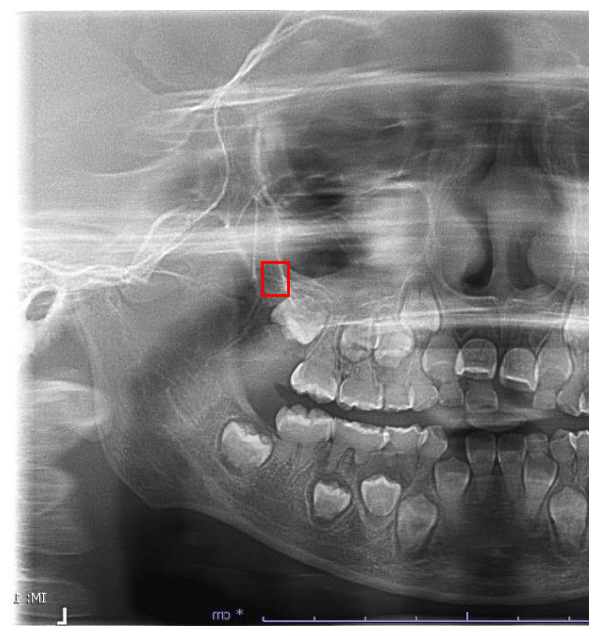

In [ ]:
image_path_column = "Path_Name"  # ชื่อคอลัมน์ที่เก็บ path ของภาพ
bounding_box_columns = ["left", "top", "width", "height"]

# เลือกภาพตัวอย่างจากตาราง (สามารถเปลี่ยน index ได้)
sample_index = 0  # เปลี่ยนเป็น index ที่ต้องการ
sample_row = df.iloc[sample_index]

image_path = sample_row[image_path_column]
bounding_box = {
    "left": sample_row["left"],
    "top": sample_row["top"],
    "width": sample_row["width"],
    "height": sample_row["height"]
}

# โหลดภาพ
image = Image.open(image_path)

# แสดงภาพและกรอบ
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# วาดกรอบภาพ
rect = patches.Rectangle(
    (bounding_box["left"], bounding_box["top"]),
    bounding_box["width"],
    bounding_box["height"],
    linewidth=2,
    edgecolor="r",
    facecolor="none"
)
ax.add_patch(rect)

# ซ่อนแกน
plt.axis("off")
plt.show()

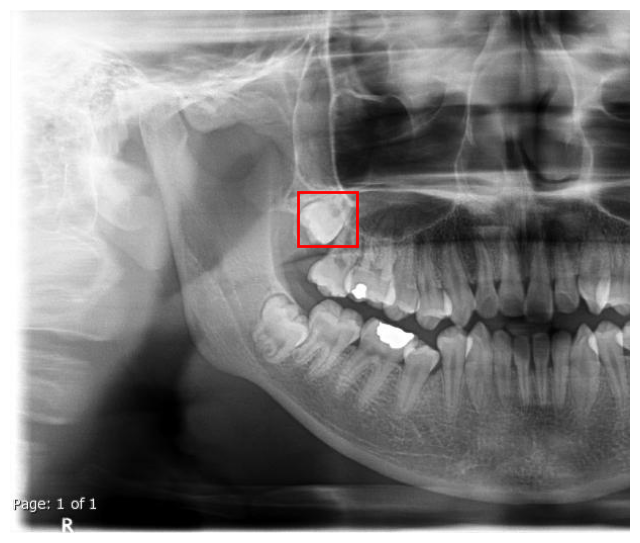

In [ ]:
image_path_column = "Path_Name"  # ชื่อคอลัมน์ที่เก็บ path ของภาพ
bounding_box_columns = ["left", "top", "width", "height"]

# เลือกภาพตัวอย่างจากตาราง (สามารถเปลี่ยน index ได้)
sample_index = 475  # เปลี่ยนเป็น index ที่ต้องการ
sample_row = df.iloc[sample_index]

image_path = sample_row[image_path_column]
bounding_box = {
    "left": sample_row["left"],
    "top": sample_row["top"],
    "width": sample_row["width"],
    "height": sample_row["height"]
}

# โหลดภาพ
image = Image.open(image_path)

# แสดงภาพและกรอบ
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# วาดกรอบภาพ
rect = patches.Rectangle(
    (bounding_box["left"], bounding_box["top"]),
    bounding_box["width"],
    bounding_box["height"],
    linewidth=2,
    edgecolor="r",
    facecolor="none"
)
ax.add_patch(rect)

# ซ่อนแกน
plt.axis("off")
plt.show()

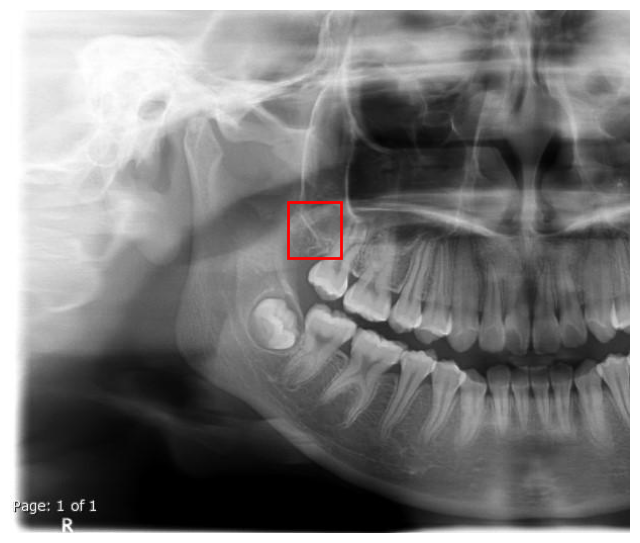

In [ ]:
image_path_column = "Path_Name"  # ชื่อคอลัมน์ที่เก็บ path ของภาพ
bounding_box_columns = ["left", "top", "width", "height"]

# เลือกภาพตัวอย่างจากตาราง (สามารถเปลี่ยน index ได้)
sample_index = 839  # เปลี่ยนเป็น index ที่ต้องการ
sample_row = df.iloc[sample_index]

image_path = sample_row[image_path_column]
bounding_box = {
    "left": sample_row["left"],
    "top": sample_row["top"],
    "width": sample_row["width"],
    "height": sample_row["height"]
}

# โหลดภาพ
image = Image.open(image_path)

# แสดงภาพและกรอบ
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# วาดกรอบภาพ
rect = patches.Rectangle(
    (bounding_box["left"], bounding_box["top"]),
    bounding_box["width"],
    bounding_box["height"],
    linewidth=2,
    edgecolor="r",
    facecolor="none"
)
ax.add_patch(rect)

# ซ่อนแกน
plt.axis("off")
plt.show()

# data prepairation

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv')  #data ทำใหม่
print(df.shape)
df.head()

(840, 25)


tagName     Filename   left     top  width  height     Rleft  \
0  Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1  Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2  Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3  Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4  Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   

       Rtop    Rwidth   Rheight  ...  Folder_type  Folder_name  \
0  0.408410  0.044463  0.053976  ...       Normal         Both   
1  0.393147  0.047720  0.048745  ...       Normal         Both   
2  0.393050  0.079365  0.088803  ...       Normal         Both   
3  0.429923  0.060098  0.057915  ...       Normal         Both   
4  0.434556  0.057655  0.056197  ...       Normal         Both   

                                           Path_Name  Gender_Class  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

  Gender_Predict Age_predict Age_predict_int Gender_predict  \
0         Female    7.280498             7.0       0.003620   
1         Female    7.415316             7.0       0.046188   
2         Female    7.492433             7.0       0.000020   
3         Female    8.004609             8.0       0.000006   
4         Female    7.775298             8.0       0.000450   

   Gender_predict_str Gender_predict_int  
0              Female                0.0  
1              Female                0.0  
2              Female                0.0  
3              Female                0.0  
4              Female                0.0  

[5 rows x 25 columns]

In [ ]:
# df['real_ratio_wh'] = df['width']/df['height']
# df

tagName     Filename   left     top  width  height     Rleft  \
0    Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1    Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2    Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3    Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4    Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
..                 ...          ...    ...     ...    ...     ...       ...   
835  Upper Third Molar      Q49.jpg  274.4  166.70  44.50   75.20  0.446906   
836  Upper Third Molar     T220.jpg  254.4  213.04  48.67   53.62  0.414332   
837  Upper Third Molar     T235.jpg  281.5  172.10  50.90   50.40  0.458469   
838  Upper Third Molar     U136.jpg  251.9  206.22  46.60   66.88  0.410261   
839  Upper Third Molar     Y100.jpg  274.8  189.90  52.30   55.58  0.447557   

         Rtop    Rwidth   Rheight  ...  Folder_name  \
0    0.408410  0.044463  0.053976  ...         Both   
1    0.393147  0.047720  0.048745  ...         Both   
2    0.393050  0.079365  0.088803  ...         Both   
3    0.429923  0.060098  0.057915  ...         Both   
4    0.434556  0.057655  0.056197  ...         Both   
..        ...       ...       ...  ...          ...   
835  0.321815  0.072476  0.145174  ...           Rt   
836  0.411274  0.079267  0.103514  ...         Both   
837  0.332239  0.082899  0.097297  ...         Both   
838  0.398108  0.075896  0.129112  ...           Rt   
839  0.366602  0.085179  0.107297  ...           Rt   

                                             Path_Name  Gender_Class  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
..                                                 ...           ...   
835  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
836  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
837  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
838  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
839  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

     Gender_Predict Age_predict Age_predict_int Gender_predict  \
0            Female    7.280498             7.0       0.003620   
1            Female    7.415316             7.0       0.046188   
2            Female    7.492433             7.0       0.000020   
3            Female    8.004609             8.0       0.000006   
4            Female    7.775298             8.0       0.000450   
..              ...         ...             ...            ...   
835          Female   20.701864            21.0       0.000186   
836            Male   13.949539            14.0       0.997985   
837            Male   13.943061            14.0       0.998969   
838          Female   20.846346            21.0       0.001581   
839          Female   14.041607            14.0       0.000008   

    Gender_predict_str  Gender_predict_int real_ratio_wh  
0               Female                 0.0      0.773371  
1               Female                 0.0      1.160396  
2               Female                 0.0      1.059348  
3               Female                 0.0      1.230000  
4               Female                 0.0      1.216077  
..                 ...                 ...           ...  
835             Female                 0.0      0.591755  
836               Male                 1.0      0.907684  
837               Male                 1.0      1.009921  
838             Female                 0.0      0.696770  
839             Female                 0.0      0.940986  

[840 rows x 26 columns]

In [ ]:
# df.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv', index=False)

# data adjusting X all prediction


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv')  #data ทำใหม่
print(df.shape)
df.head()

(840, 26)


tagName     Filename   left     top  width  height     Rleft  \
0  Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1  Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2  Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3  Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4  Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   

       Rtop    Rwidth   Rheight  ...  Folder_name  \
0  0.408410  0.044463  0.053976  ...         Both   
1  0.393147  0.047720  0.048745  ...         Both   
2  0.393050  0.079365  0.088803  ...         Both   
3  0.429923  0.060098  0.057915  ...         Both   
4  0.434556  0.057655  0.056197  ...         Both   

                                           Path_Name  Gender_Class  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

   Gender_Predict Age_predict Age_predict_int Gender_predict  \
0          Female    7.280498             7.0       0.003620   
1          Female    7.415316             7.0       0.046188   
2          Female    7.492433             7.0       0.000020   
3          Female    8.004609             8.0       0.000006   
4          Female    7.775298             8.0       0.000450   

  Gender_predict_str  Gender_predict_int real_ratio_wh  
0             Female                 0.0      0.773371  
1             Female                 0.0      1.160396  
2             Female                 0.0      1.059348  
3             Female                 0.0      1.230000  
4             Female                 0.0      1.216077  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['tagName', 'Filename', 'left', 'top', 'width', 'height', 'Rleft',
       'Rtop', 'Rwidth', 'Rheight', 'x_center', 'y_center', 'Unnamed: 0',
       'Age(year)', 'Gender', 'Folder_type', 'Folder_name', 'Path_Name',
       'Gender_Class', 'Gender_Predict', 'Age_predict', 'Age_predict_int',
       'Gender_predict', 'Gender_predict_str', 'Gender_predict_int',
       'real_ratio_wh'],
      dtype='object')

## def

In [ ]:
from PIL import Image

def enlarge_tooth_region(image, x_center, y_center, width, height, scale_x=1.0, scale_y=1.0):
    """
    ขยายความกว้างและสูงของบริเวณฟันกรามซี่ที่ 3 บนในภาพถ่ายรังสีพาโนรามา

    Parameters:
    image (PIL Image): ภาพถ่ายรังสีพาโนรามา
    x_center, y_center (float): พิกัดศูนย์กลางของบริเวณที่ต้องการขยาย (0-1)
    width, height (float): ความกว้างและความสูงของบริเวณที่ต้องการขยาย (0-1)
    scale_x, scale_y (float): ค่าการขยายความกว้างและความสูง

    Returns:
    result_image (PIL Image): ภาพที่ถูกปรับขนาดเรียบร้อยแล้ว
    """
    # ขนาดภาพ
    img_width, img_height = image.size

    # คำนวณพิกัดจริง   --> ความจริงควรหา code ที่คำนวณพิกัดจริง ๆ มาเลย
    w = int(width * img_width)
    h = int(height * img_height)
    x = int((x_center * img_width) - (w / 2))
    y = int((y_center * img_height) - (h / 2))

    # ตรวจสอบว่าพิกัดอยู่ภายในขอบเขตของภาพ
    x = max(0, x)
    y = max(0, y)
    x2 = min(img_width, x + w)
    y2 = min(img_height, y + h)

    # แยกบริเวณที่ต้องการขยาย
    roi = image.crop((x, y, x2, y2))

    # คำนวณขนาดใหม่หลังจากการขยาย
    new_width = int(w * scale_x)
    new_height = int(h * scale_y)

    # ขยายขนาดบริเวณที่ต้องการ
    resized_roi = roi.resize((new_width, new_height), Image.LANCZOS)

    # คำนวณพิกัดใหม่หลังจากการขยาย
    new_x = x - (new_width - w) // 2
    new_y = y - (new_height - h) // 2

    # ตรวจสอบว่าพิกัดใหม่อยู่ภายในขอบเขตของภาพ
    new_x_ = max(0, new_x)
    new_y_ = max(0, new_y)
    new_width_ = min(img_width, new_x + new_width) #width
    new_height_ = min(img_height, new_y + new_height)

    # สร้างสำเนาของภาพเดิมเพื่อไม่ให้แก้ไขภาพต้นฉบับ
    result_image = image.copy()

    # รวมบริเวณที่ขยายกลับเข้ากับภาพเดิม
    result_image.paste(resized_roi, (new_x, new_y))

    return result_image,new_x,new_y,new_width,new_height

In [ ]:
def generate_numbers(start_neg, stop_neg, start_pos, stop_pos, step):
    negative_numbers = [round(x, 2) for x in np.arange(start_neg, stop_neg, -step)]
    positive_numbers = [1.0] + [round(x, 2) for x in np.arange(start_pos, stop_pos, -step)]
    return negative_numbers + positive_numbers

In [ ]:
numbers = generate_numbers(start_neg=0.95, stop_neg=0.74, start_pos=1.25, stop_pos=1.04, step=0.01)

# Print the generated numbers
print(numbers)
print(len(numbers))

[0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 1.0, 1.25, 1.24, 1.23, 1.22, 1.21, 1.2, 1.19, 1.18, 1.17, 1.16, 1.15, 1.14, 1.13, 1.12, 1.11, 1.1, 1.09, 1.08, 1.07, 1.06, 1.05]
43


## model

In [ ]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorbo

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
/content/efficientnet_keras_transfer_learning


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# prompt: check keras version

import tensorflow as tf
keras.__version__

'2.15.0'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

ValueError: bad marshal data (unknown type code)

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path,model, height, width):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])

    return result

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
# !mkdir adjusted_images

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/adjusted_images/')
# !mkdir adjusting_x
# !mkdir adjusting_y

In [ ]:
df

tagName     Filename   left     top  width  height     Rleft  \
0    Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1    Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2    Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3    Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4    Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   
..                 ...          ...    ...     ...    ...     ...       ...   
835  Upper Third Molar      Q49.jpg  274.4  166.70  44.50   75.20  0.446906   
836  Upper Third Molar     T220.jpg  254.4  213.04  48.67   53.62  0.414332   
837  Upper Third Molar     T235.jpg  281.5  172.10  50.90   50.40  0.458469   
838  Upper Third Molar     U136.jpg  251.9  206.22  46.60   66.88  0.410261   
839  Upper Third Molar     Y100.jpg  274.8  189.90  52.30   55.58  0.447557   

         Rtop    Rwidth   Rheight  ...  Folder_name  \
0    0.408410  0.044463  0.053976  ...         Both   
1    0.393147  0.047720  0.048745  ...         Both   
2    0.393050  0.079365  0.088803  ...         Both   
3    0.429923  0.060098  0.057915  ...         Both   
4    0.434556  0.057655  0.056197  ...         Both   
..        ...       ...       ...  ...          ...   
835  0.321815  0.072476  0.145174  ...           Rt   
836  0.411274  0.079267  0.103514  ...         Both   
837  0.332239  0.082899  0.097297  ...         Both   
838  0.398108  0.075896  0.129112  ...           Rt   
839  0.366602  0.085179  0.107297  ...           Rt   

                                             Path_Name  Gender_Class  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
..                                                 ...           ...   
835  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
836  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
837  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             1   
838  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
839  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

     Gender_Predict Age_predict Age_predict_int Gender_predict  \
0            Female    7.280498             7.0       0.003620   
1            Female    7.415316             7.0       0.046188   
2            Female    7.492433             7.0       0.000020   
3            Female    8.004609             8.0       0.000006   
4            Female    7.775298             8.0       0.000450   
..              ...         ...             ...            ...   
835          Female   20.701864            21.0       0.000186   
836            Male   13.949539            14.0       0.997985   
837            Male   13.943061            14.0       0.998969   
838          Female   20.846346            21.0       0.001581   
839          Female   14.041607            14.0       0.000008   

    Gender_predict_str  Gender_predict_int real_ratio_wh  
0               Female                 0.0      0.773371  
1               Female                 0.0      1.160396  
2               Female                 0.0      1.059348  
3               Female                 0.0      1.230000  
4               Female                 0.0      1.216077  
..                 ...                 ...           ...  
835             Female                 0.0      0.591755  
836               Male                 1.0      0.907684  
837               Male                 1.0      1.009921  
838             Female                 0.0      0.696770  
839             Female                 0.0      0.940986  

[840 rows x 26 columns]

In [ ]:
# ตัวอย่างการเรียกใช้ฟังก์ชัน
scale_x = numbers

dataframe = []
# list_df = [] #keep


for i in range(len(df)):
    image_array = cv2.imread(df['Path_Name'][i]) # data type = array
    image = Image.fromarray(image_array.astype('uint8')) # change array  to PIL.Image.Image type

    # ข้อมูลพิกัดจาก Custom Vision (สมมติ)
    width = df['Rwidth'][i]
    height = df['Rheight'][i]
    x_center = df['x_center'][i]
    y_center = df['y_center'][i]

    for number in scale_x:
        result_image = enlarge_tooth_region(image, x_center, y_center, width, height, scale_x= number)
        path_name = df['Path_Name'][i]
        filename = df['Path_Name'][i].split("/")[-1]
        gender = df['Path_Name'][i].split("/")[-3]
        age =  df['Path_Name'][i].split("/")[-4].split("Y")[0]
        number = number
        image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/adjusted_images/adjusting_x/adjust_x_{number}_{filename}"
        # print(image_path)
        # Save image
        result_image[0].save(image_path)

        # Prepare DataFrame for storing results
        df_aff = pd.DataFrame({
            'FileName': [filename],
            'age(year)': [age],
            'gender': [gender],
            'path_name_ori': [df['Path_Name'][i]],
            'x_ori': [df['left'][i]],
            'y_ori': [df['top'][i]],
            'width_ori': [df['width'][i]],
            'height_ori': [df['height'][i]],
            'scale_x':[number],
            'scale_y':[1.00],
            'filename_adj': [image_path.split("/")[-1]],
            'path_name_adj': [image_path],
            'x_adj': [result_image[1]],
            'y_adj': [result_image[2]],
            'width_adj': [result_image[3]],
            'height_adj': [result_image[4]]
        })

        dataframe.append(df_aff)  # Append to the list

# Combine all individual DataFrames into one
result_x = pd.concat(dataframe, ignore_index=True)

result_x

FileName age(year) gender  \
0      FlipV67.jpg         7      F   
1      FlipV67.jpg         7      F   
2      FlipV67.jpg         7      F   
3      FlipV67.jpg         7      F   
4      FlipV67.jpg         7      F   
...            ...       ...    ...   
36115     Y100.jpg        14      F   
36116     Y100.jpg        14      F   
36117     Y100.jpg        14      F   
36118     Y100.jpg        14      F   
36119     Y100.jpg        14      F   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y               filename_adj  \
0           27.3       35.30     0.95      1.0  adjust_x_0.95_FlipV67.jpg   
1           27.3       35.30     0.94      1.0  adjust_x_0.94_FlipV67.jpg   
2           27.3       35.30     0.93      1.0  adjust_x_0.93_FlipV67.jpg   
3           27.3       35.30     0.92      1.0  adjust_x_0.92_FlipV67.jpg   
4           27.3       35.30     0.91      1.0  adjust_x_0.91_FlipV67.jpg   
...          ...         ...      ...      ...                        ...   
36115       52.3       55.58     1.09      1.0     adjust_x_1.09_Y100.jpg   
36116       52.3       55.58     1.08      1.0     adjust_x_1.08_Y100.jpg   
36117       52.3       55.58     1.07      1.0     adjust_x_1.07_Y100.jpg   
36118       52.3       55.58     1.06      1.0     adjust_x_1.06_Y100.jpg   
36119       52.3       55.58     1.05      1.0     adjust_x_1.05_Y100.jpg   

                                           path_name_adj  x_adj  y_adj  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/DentDiscovering/UpperT...    272    190   
36116  /content/gdrive/MyDrive/DentDiscovering/UpperT...    272    190   
36117  /content/gdrive/MyDrive/DentDiscovering/UpperT...    273    190   
36118  /content/gdrive/MyDrive/DentDiscovering/UpperT...    273    190   
36119  /content/gdrive/MyDrive/DentDiscovering/UpperT...    273    190   

       width_adj  height_adj  
0             25          35  
1             25          35  
2             25          35  
3             24          35  
4             24          35  
...          ...         ...  
36115         56          55  
36116         56          55  
36117         55          55  
36118         55          55  
36119         54          55  

[36120 rows x 16 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
result_x.to_csv('data_scale_x.csv')

## predict

In [ ]:
result_x = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/data_scale_x.csv')  #data ทำใหม่
print(result_x.shape)
result_x.head()

(36120, 17)


Unnamed: 0     FileName  age(year) gender  \
0           0  FlipV67.jpg          7      F   
1           1  FlipV67.jpg          7      F   
2           2  FlipV67.jpg          7      F   
3           3  FlipV67.jpg          7      F   
4           4  FlipV67.jpg          7      F   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  scale_y               filename_adj  \
0        35.3     0.95      1.0  adjust_x_0.95_FlipV67.jpg   
1        35.3     0.94      1.0  adjust_x_0.94_FlipV67.jpg   
2        35.3     0.93      1.0  adjust_x_0.93_FlipV67.jpg   
3        35.3     0.92      1.0  adjust_x_0.92_FlipV67.jpg   
4        35.3     0.91      1.0  adjust_x_0.91_FlipV67.jpg   

                                       path_name_adj  x_adj  y_adj  width_adj  \
0  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
1  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
2  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
3  /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267         24   
4  /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267         24   

   height_adj  
0          35  
1          35  
2          35  
3          35  
4          35

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
# Predict for each image in the test dataset
from keras.preprocessing import image
from keras.preprocessing import image
import keras.utils as image

pred_list_regression = []  # Store regression results
pred_list_classification = []  # Store binary classification results

img_path = result_x['path_name_adj'].tolist()

for i in range(len(img_path)):
    predictions = predict_image(img_path[i], model, height, width)

    # Access the regression result (output 0)
    regression_result = predictions[0]

    # Access the classification result (output 1)
    classification_result = predictions[1] # Use a threshold to determine the class

    pred_list_regression.append(regression_result)
    pred_list_classification.append(classification_result)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 26ms/step


## Age Estination

In [ ]:
list_Regression_predict = []
for i in pred_list_regression:
  i = i[0][0]
  list_Regression_predict.append(i)

In [ ]:
age_predict = np.around(list_Regression_predict).astype(int) # array+int
age_predict

array([ 8,  8,  8, ..., 14, 14, 14])

## Gender Prediction

In [ ]:
list_Classification_predict = []
for i in pred_list_classification:
  i = i[0][0]
  list_Classification_predict.append(i)

In [ ]:
gender_predict_str = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_str = np.append(gender_predict_str, 'Male')
    else:
        gender_predict_str = np.append(gender_predict_str, 'Female')

# แสดงผลลัพธ์
print(gender_predict_str)

['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']


In [ ]:
gender_predict_int = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_int = np.append(gender_predict_int, 1).astype(int)
    else:
        gender_predict_int = np.append(gender_predict_int, 0).astype(int)

# แสดงผลลัพธ์
print(gender_predict_int)

[0 0 0 ... 0 0 0]


In [ ]:
len(gender_predict_int)

32766

In [ ]:
result_x.columns

Index(['Unnamed: 0', 'FileName', 'age(year)', 'gender', 'path_name_ori',
       'x_ori', 'y_ori', 'width_ori', 'height_ori', 'scale_x', 'scale_y',
       'filename_adj', 'path_name_adj', 'x_adj', 'y_adj', 'width_adj',
       'height_adj'],
      dtype='object')

In [ ]:
result_x['gender'] = result_x['gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

gender_predict_str
act_gender_str = np.array(result_x['gender'].tolist())

cmat = confusion_matrix(act_gender_str, gender_predict_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_gender_str, gender_predict_str))#performance

classifier accuracy = 88.17275747508306%
              precision    recall  f1-score   support

      Female       0.88      0.88      0.88     17974
        Male       0.88      0.88      0.88     18146

    accuracy                           0.88     36120
   macro avg       0.88      0.88      0.88     36120
weighted avg       0.88      0.88      0.88     36120



Text(0.5, 76.24999999999999, 'Predicted label')

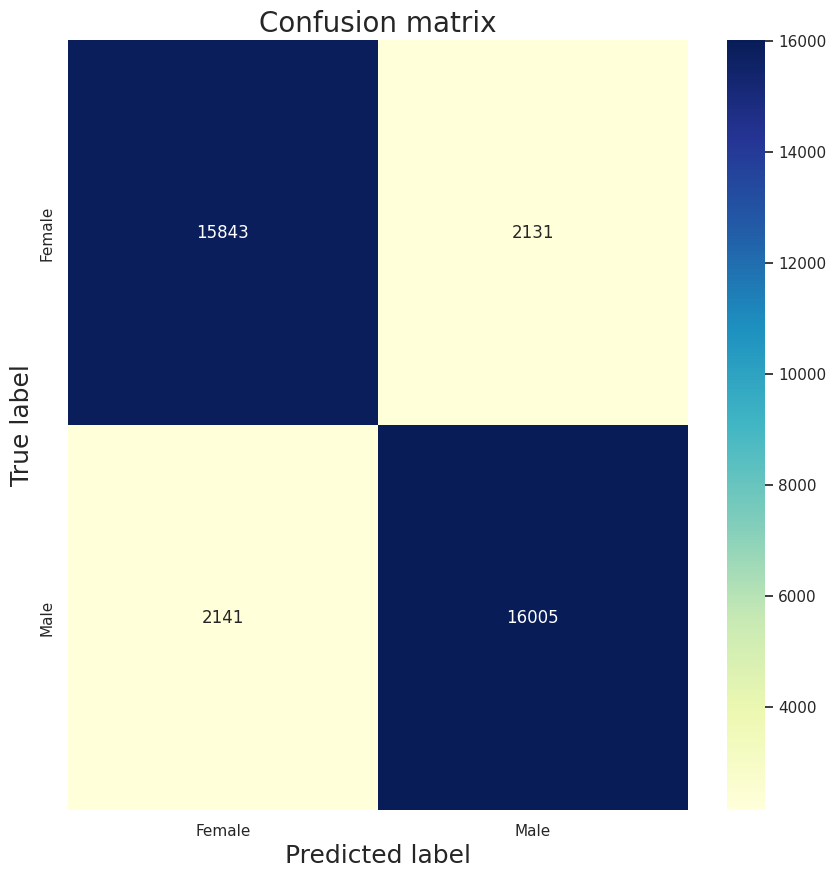

In [ ]:
#create CF
data = {'Actual': act_gender_str,'Predicted' : gender_predict_str}
df_1 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df_1['Actual'],df_1['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_gender_str, gender_predict_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## รวมตาราง

In [ ]:
result_x.head()

Unnamed: 0     FileName  age(year)  gender  \
0           0  FlipV67.jpg          7  Female   
1           1  FlipV67.jpg          7  Female   
2           2  FlipV67.jpg          7  Female   
3           3  FlipV67.jpg          7  Female   
4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  scale_y               filename_adj  \
0        35.3     0.95      1.0  adjust_x_0.95_FlipV67.jpg   
1        35.3     0.94      1.0  adjust_x_0.94_FlipV67.jpg   
2        35.3     0.93      1.0  adjust_x_0.93_FlipV67.jpg   
3        35.3     0.92      1.0  adjust_x_0.92_FlipV67.jpg   
4        35.3     0.91      1.0  adjust_x_0.91_FlipV67.jpg   

                                       path_name_adj  x_adj  y_adj  width_adj  \
0  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
1  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
2  /content/gdrive/MyDrive/DentDiscovering/UpperT...    268    267         25   
3  /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267         24   
4  /content/gdrive/MyDrive/DentDiscovering/UpperT...    269    267         24   

   height_adj  
0          35  
1          35  
2          35  
3          35  
4          35

In [ ]:
#Regression
result_x['Age_predict'] = list_Regression_predict # ผลที่ทำนาย
result_x['Age_predict_int'] = age_predict

In [ ]:
result_x['Gender_predict'] = list_Classification_predict #'.format # ผลที่ทำนาย
# df['Gender_predict'] = df['Gender_predict'].apply(lambda x: f'{x:.8f}') #'.format # ผลที่ทำนาย
result_x['Gender_predict_str'] = gender_predict_str
result_x['Gender_predict_int'] = gender_predict_int

In [ ]:
result_x['prob'] = result_x['Gender_predict']

In [ ]:
result_x['adj_ratio_wh'] = result_x['width_adj']/result_x['height_adj']

In [ ]:
print(result_x.shape)
result_x.head()

(36120, 24)


Unnamed: 0     FileName  age(year)  gender  \
0           0  FlipV67.jpg          7  Female   
1           1  FlipV67.jpg          7  Female   
2           2  FlipV67.jpg          7  Female   
3           3  FlipV67.jpg          7  Female   
4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  ...  y_adj width_adj height_adj  Age_predict  \
0        35.3     0.95  ...    267        25         35     7.727825   
1        35.3     0.94  ...    267        25         35     7.727825   
2        35.3     0.93  ...    267        25         35     7.727825   
3        35.3     0.92  ...    267        24         35     7.735183   
4        35.3     0.91  ...    267        24         35     7.735183   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.054891              Female                   0   
1                8        0.054891              Female                   0   
2                8        0.054891              Female                   0   
3                8        0.043857              Female                   0   
4                8        0.043857              Female                   0   

       prob  adj_ratio_w้  
0  0.054891      0.714286  
1  0.054891      0.714286  
2  0.054891      0.714286  
3  0.043857      0.685714  
4  0.043857      0.685714  

[5 rows x 24 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
result_x.to_csv('predict_data_scale_x.csv')

In [ ]:
# result_x = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/predict_data_scale_x.csv')  #data ทำใหม่
# print(result_x.shape)
# result_x.head()

(36120, 24)


Unnamed: 0     FileName  age(year)  gender  \
0           0  FlipV67.jpg          7  Female   
1           1  FlipV67.jpg          7  Female   
2           2  FlipV67.jpg          7  Female   
3           3  FlipV67.jpg          7  Female   
4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  ...  y_adj width_adj height_adj  Age_predict  \
0        35.3     0.95  ...    267        25         35     7.727825   
1        35.3     0.94  ...    267        25         35     7.727825   
2        35.3     0.93  ...    267        25         35     7.727825   
3        35.3     0.92  ...    267        24         35     7.735183   
4        35.3     0.91  ...    267        24         35     7.735183   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.054891              Female                   0   
1                8        0.054891              Female                   0   
2                8        0.054891              Female                   0   
3                8        0.043857              Female                   0   
4                8        0.043857              Female                   0   

       prob  adj_ratio_w้  
0  0.054891      0.714286  
1  0.054891      0.714286  
2  0.054891      0.714286  
3  0.043857      0.685714  
4  0.043857      0.685714  

[5 rows x 24 columns]

In [ ]:
# result_x.columns

Index(['Unnamed: 0', 'FileName', 'age(year)', 'gender', 'path_name_ori',
       'x_ori', 'y_ori', 'width_ori', 'height_ori', 'scale_x', 'scale_y',
       'filename_adj', 'path_name_adj', 'x_adj', 'y_adj', 'width_adj',
       'height_adj', 'Age_predict', 'Age_predict_int', 'Gender_predict',
       'Gender_predict_str', 'Gender_predict_int', 'prob', 'adj_ratio_w้'],
      dtype='object')

In [ ]:
# result_x = result_x.rename(columns={'adj_ratio_w้': 'adj_ratio_wh'})
# result_x

FileName  age(year)  gender  \
0      FlipV67.jpg          7  Female   
1      FlipV67.jpg          7  Female   
2      FlipV67.jpg          7  Female   
3      FlipV67.jpg          7  Female   
4      FlipV67.jpg          7  Female   
...            ...        ...     ...   
36115     Y100.jpg         14  Female   
36116     Y100.jpg         14  Female   
36117     Y100.jpg         14  Female   
36118     Y100.jpg         14  Female   
36119     Y100.jpg         14  Female   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y  ... y_adj width_adj  \
0           27.3       35.30     0.95      1.0  ...   267        25   
1           27.3       35.30     0.94      1.0  ...   267        25   
2           27.3       35.30     0.93      1.0  ...   267        25   
3           27.3       35.30     0.92      1.0  ...   267        24   
4           27.3       35.30     0.91      1.0  ...   267        24   
...          ...         ...      ...      ...  ...   ...       ...   
36115       52.3       55.58     1.09      1.0  ...   190        56   
36116       52.3       55.58     1.08      1.0  ...   190        56   
36117       52.3       55.58     1.07      1.0  ...   190        55   
36118       52.3       55.58     1.06      1.0  ...   190        55   
36119       52.3       55.58     1.05      1.0  ...   190        54   

       height_adj  Age_predict  Age_predict_int  Gender_predict  \
0              35     7.727825                8        0.054891   
1              35     7.727825                8        0.054891   
2              35     7.727825                8        0.054891   
3              35     7.735183                8        0.043857   
4              35     7.735183                8        0.043857   
...           ...          ...              ...             ...   
36115          55    14.053738               14        0.000007   
36116          55    14.053738               14        0.000007   
36117          55    14.008840               14        0.000007   
36118          55    14.008840               14        0.000007   
36119          55    14.043581               14        0.000007   

       Gender_predict_str  Gender_predict_int      prob adj_ratio_wh  
0                  Female                   0  0.054891     0.714286  
1                  Female                   0  0.054891     0.714286  
2                  Female                   0  0.054891     0.714286  
3                  Female                   0  0.043857     0.685714  
4                  Female                   0  0.043857     0.685714  
...                   ...                 ...       ...          ...  
36115              Female                   0  0.000007     1.018182  
36116              Female                   0  0.000007     1.018182  
36117              Female                   0  0.000007     1.000000  
36118              Female                   0  0.000007     1.000000  
36119              Female                   0  0.000007     0.981818  

[36120 rows x 23 columns]

In [ ]:
# result_x = result_x.drop(columns=['Unnamed: 0'])

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
# result_x.to_csv('predict_data_scale_x.csv')

# data adjusting Y all prediction


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/Label_test_U3M.csv')  #data ทำใหม่
print(df.shape)
df.head()

(840, 26)


tagName     Filename   left     top  width  height     Rleft  \
0  Upper Third Molar  FlipV67.jpg  267.1  267.10  27.30   35.30  0.435016   
1  Upper Third Molar  FlipV69.jpg  296.0  203.65  29.30   25.25  0.482085   
2  Upper Third Molar  FlipV70.jpg  289.3  203.60  48.73   46.00  0.471173   
3  Upper Third Molar  FlipV81.jpg  254.3  222.70  36.90   30.00  0.414169   
4  Upper Third Molar  FlipV84.jpg  281.3  225.10  35.40   29.11  0.458143   

       Rtop    Rwidth   Rheight  ...  Folder_name  \
0  0.408410  0.044463  0.053976  ...         Both   
1  0.393147  0.047720  0.048745  ...         Both   
2  0.393050  0.079365  0.088803  ...         Both   
3  0.429923  0.060098  0.057915  ...         Both   
4  0.434556  0.057655  0.056197  ...         Both   

                                           Path_Name  Gender_Class  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...             0   

   Gender_Predict Age_predict Age_predict_int Gender_predict  \
0          Female    7.280498             7.0       0.003620   
1          Female    7.415316             7.0       0.046188   
2          Female    7.492433             7.0       0.000020   
3          Female    8.004609             8.0       0.000006   
4          Female    7.775298             8.0       0.000450   

  Gender_predict_str  Gender_predict_int real_ratio_wh  
0             Female                 0.0      0.773371  
1             Female                 0.0      1.160396  
2             Female                 0.0      1.059348  
3             Female                 0.0      1.230000  
4             Female                 0.0      1.216077  

[5 rows x 26 columns]

## def

In [ ]:
from PIL import Image

def enlarge_tooth_region(image, x_center, y_center, width, height, scale_x=1.0, scale_y=1.0):
    """
    ขยายความกว้างและสูงของบริเวณฟันกรามซี่ที่ 3 บนในภาพถ่ายรังสีพาโนรามา

    Parameters:
    image (PIL Image): ภาพถ่ายรังสีพาโนรามา
    x_center, y_center (float): พิกัดศูนย์กลางของบริเวณที่ต้องการขยาย (0-1)
    width, height (float): ความกว้างและความสูงของบริเวณที่ต้องการขยาย (0-1)
    scale_x, scale_y (float): ค่าการขยายความกว้างและความสูง

    Returns:
    result_image (PIL Image): ภาพที่ถูกปรับขนาดเรียบร้อยแล้ว
    """
    # ขนาดภาพ
    img_width, img_height = image.size

    # คำนวณพิกัดจริง   --> ความจริงควรหา code ที่คำนวณพิกัดจริง ๆ มาเลย
    w = int(width * img_width)
    h = int(height * img_height)
    x = int((x_center * img_width) - (w / 2))
    y = int((y_center * img_height) - (h / 2))

    # ตรวจสอบว่าพิกัดอยู่ภายในขอบเขตของภาพ
    x = max(0, x)
    y = max(0, y)
    x2 = min(img_width, x + w)
    y2 = min(img_height, y + h)

    # แยกบริเวณที่ต้องการขยาย
    roi = image.crop((x, y, x2, y2))

    # คำนวณขนาดใหม่หลังจากการขยาย
    new_width = int(w * scale_x)
    new_height = int(h * scale_y)

    # ขยายขนาดบริเวณที่ต้องการ
    resized_roi = roi.resize((new_width, new_height), Image.LANCZOS)

    # คำนวณพิกัดใหม่หลังจากการขยาย
    new_x = x - (new_width - w) // 2
    new_y = y - (new_height - h) // 2

    # ตรวจสอบว่าพิกัดใหม่อยู่ภายในขอบเขตของภาพ
    new_x_ = max(0, new_x)
    new_y_ = max(0, new_y)
    new_width_ = min(img_width, new_x + new_width) #width
    new_height_ = min(img_height, new_y + new_height)

    # สร้างสำเนาของภาพเดิมเพื่อไม่ให้แก้ไขภาพต้นฉบับ
    result_image = image.copy()

    # รวมบริเวณที่ขยายกลับเข้ากับภาพเดิม
    result_image.paste(resized_roi, (new_x, new_y))

    return result_image,new_x,new_y,new_width,new_height

In [ ]:
def generate_numbers(start_neg, stop_neg, start_pos, stop_pos, step):
    negative_numbers = [round(x, 2) for x in np.arange(start_neg, stop_neg, -step)]
    positive_numbers = [1.0] + [round(x, 2) for x in np.arange(start_pos, stop_pos, -step)]
    return negative_numbers + positive_numbers

In [ ]:
numbers = generate_numbers(start_neg=0.95, stop_neg=0.74, start_pos=1.25, stop_pos=1.04, step=0.01)

# Print the generated numbers
print(numbers)
print(len(numbers))

[0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 1.0, 1.25, 1.24, 1.23, 1.22, 1.21, 1.2, 1.19, 1.18, 1.17, 1.16, 1.15, 1.14, 1.13, 1.12, 1.11, 1.1, 1.09, 1.08, 1.07, 1.06, 1.05]
43


In [ ]:
# ตัวอย่างการเรียกใช้ฟังก์ชัน
scale_y = numbers

dataframe = []
# list_df = [] #keep


for i in range(len(df)):
    image_array = cv2.imread(df['Path_Name'][i]) # data type = array
    image = Image.fromarray(image_array.astype('uint8')) # change array  to PIL.Image.Image type

    # ข้อมูลพิกัดจาก Custom Vision (สมมติ)
    width = df['Rwidth'][i]
    height = df['Rheight'][i]
    x_center = df['x_center'][i]
    y_center = df['y_center'][i]

    for number in scale_y:
        result_image = enlarge_tooth_region(image, x_center, y_center, width, height, scale_y= number)
        path_name = df['Path_Name'][i]
        filename = df['Path_Name'][i].split("/")[-1]
        gender = df['Path_Name'][i].split("/")[-3]
        age =  df['Path_Name'][i].split("/")[-4].split("Y")[0]
        number = number
        image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/adjusted_images/adjusting_y/adjust_y_{number}_{filename}"
        # print(image_path)
        # Save image
        result_image[0].save(image_path)

        # Prepare DataFrame for storing results
        df_aff = pd.DataFrame({
            'FileName': [filename],
            'age(year)': [age],
            'gender': [gender],
            'path_name_ori': [df['Path_Name'][i]],
            'x_ori': [df['left'][i]],
            'y_ori': [df['top'][i]],
            'width_ori': [df['width'][i]],
            'height_ori': [df['height'][i]],
            'scale_x':[1.00],
            'scale_y':[number],
            'filename_adj': [image_path.split("/")[-1]],
            'path_name_adj': [image_path],
            'x_adj': [result_image[1]],
            'y_adj': [result_image[2]],
            'width_adj': [result_image[3]],
            'height_adj': [result_image[4]]
        })

        dataframe.append(df_aff)  # Append to the list

# Combine all individual DataFrames into one
result_y = pd.concat(dataframe, ignore_index=True)

result_y

FileName age(year) gender  \
0      FlipV67.jpg         7      F   
1      FlipV67.jpg         7      F   
2      FlipV67.jpg         7      F   
3      FlipV67.jpg         7      F   
4      FlipV67.jpg         7      F   
...            ...       ...    ...   
36115     Y100.jpg        14      F   
36116     Y100.jpg        14      F   
36117     Y100.jpg        14      F   
36118     Y100.jpg        14      F   
36119     Y100.jpg        14      F   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y               filename_adj  \
0           27.3       35.30      1.0     0.95  adjust_y_0.95_FlipV67.jpg   
1           27.3       35.30      1.0     0.94  adjust_y_0.94_FlipV67.jpg   
2           27.3       35.30      1.0     0.93  adjust_y_0.93_FlipV67.jpg   
3           27.3       35.30      1.0     0.92  adjust_y_0.92_FlipV67.jpg   
4           27.3       35.30      1.0     0.91  adjust_y_0.91_FlipV67.jpg   
...          ...         ...      ...      ...                        ...   
36115       52.3       55.58      1.0     1.09     adjust_y_1.09_Y100.jpg   
36116       52.3       55.58      1.0     1.08     adjust_y_1.08_Y100.jpg   
36117       52.3       55.58      1.0     1.07     adjust_y_1.07_Y100.jpg   
36118       52.3       55.58      1.0     1.06     adjust_y_1.06_Y100.jpg   
36119       52.3       55.58      1.0     1.05     adjust_y_1.05_Y100.jpg   

                                           path_name_adj  x_adj  y_adj  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    268   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36116  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36117  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36118  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36119  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   

       width_adj  height_adj  
0             27          33  
1             27          32  
2             27          32  
3             27          32  
4             27          31  
...          ...         ...  
36115         52          59  
36116         52          59  
36117         52          58  
36118         52          58  
36119         52          57  

[36120 rows x 16 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
result_y.to_csv('data_scale_y.csv')

## predict

In [ ]:
result_y = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/data_scale_y.csv')  #data ทำใหม่
print(result_y.shape)
result_y.head()

(36120, 17)


Unnamed: 0     FileName  age(year) gender  \
0           0  FlipV67.jpg          7      F   
1           1  FlipV67.jpg          7      F   
2           2  FlipV67.jpg          7      F   
3           3  FlipV67.jpg          7      F   
4           4  FlipV67.jpg          7      F   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  scale_y               filename_adj  \
0        35.3      1.0     0.95  adjust_y_0.95_FlipV67.jpg   
1        35.3      1.0     0.94  adjust_y_0.94_FlipV67.jpg   
2        35.3      1.0     0.93  adjust_y_0.93_FlipV67.jpg   
3        35.3      1.0     0.92  adjust_y_0.92_FlipV67.jpg   
4        35.3      1.0     0.91  adjust_y_0.91_FlipV67.jpg   

                                       path_name_adj  x_adj  y_adj  width_adj  \
0  /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    268         27   
1  /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269         27   
2  /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269         27   
3  /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269         27   
4  /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269         27   

   height_adj  
0          33  
1          32  
2          32  
3          32  
4          31

In [ ]:
result_y['path_name_ori'][0]

'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV67.jpg'

In [ ]:
ages = []
genders = []

# Loop through each path in the column
for path in result_y['path_name_ori']:
    age = path.split('/')[-4].split("Y")[0]  # Change -2 if age is in another position
    gender = path.split('/')[-3]
    ages.append(age)
    genders.append(gender)

# Add the extracted ages to the dataframe as a new column
result_y['age(year)'] = ages
result_y['gender'] = genders

In [ ]:
result_y

Unnamed: 0     FileName age(year) gender  \
0               0  FlipV67.jpg         7      F   
1               1  FlipV67.jpg         7      F   
2               2  FlipV67.jpg         7      F   
3               3  FlipV67.jpg         7      F   
4               4  FlipV67.jpg         7      F   
...           ...          ...       ...    ...   
36115       36115     Y100.jpg        14      F   
36116       36116     Y100.jpg        14      F   
36117       36117     Y100.jpg        14      F   
36118       36118     Y100.jpg        14      F   
36119       36119     Y100.jpg        14      F   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y               filename_adj  \
0           27.3       35.30      1.0     0.95  adjust_y_0.95_FlipV67.jpg   
1           27.3       35.30      1.0     0.94  adjust_y_0.94_FlipV67.jpg   
2           27.3       35.30      1.0     0.93  adjust_y_0.93_FlipV67.jpg   
3           27.3       35.30      1.0     0.92  adjust_y_0.92_FlipV67.jpg   
4           27.3       35.30      1.0     0.91  adjust_y_0.91_FlipV67.jpg   
...          ...         ...      ...      ...                        ...   
36115       52.3       55.58      1.0     1.09     adjust_y_1.09_Y100.jpg   
36116       52.3       55.58      1.0     1.08     adjust_y_1.08_Y100.jpg   
36117       52.3       55.58      1.0     1.07     adjust_y_1.07_Y100.jpg   
36118       52.3       55.58      1.0     1.06     adjust_y_1.06_Y100.jpg   
36119       52.3       55.58      1.0     1.05     adjust_y_1.05_Y100.jpg   

                                           path_name_adj  x_adj  y_adj  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    268   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36116  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36117  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36118  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36119  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   

       width_adj  height_adj  
0             27          33  
1             27          32  
2             27          32  
3             27          32  
4             27          31  
...          ...         ...  
36115         52          59  
36116         52          59  
36117         52          58  
36118         52          58  
36119         52          57  

[36120 rows x 17 columns]

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
# Predict for each image in the test dataset
from keras.preprocessing import image
from keras.preprocessing import image
import keras.utils as image

pred_list_regression = []  # Store regression results
pred_list_classification = []  # Store binary classification results

img_path = result_y['path_name_adj'].tolist()

for i in range(len(img_path)):
    predictions = predict_image(img_path[i], model, height, width)

    # Access the regression result (output 0)
    regression_result = predictions[0]

    # Access the classification result (output 1)
    classification_result = predictions[1] # Use a threshold to determine the class

    pred_list_regression.append(regression_result)
    pred_list_classification.append(classification_result)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 30ms/step


## Age Estination

In [ ]:
list_Regression_predict = []
for i in pred_list_regression:
  i = i[0][0]
  list_Regression_predict.append(i)

In [ ]:
age_predict = np.around(list_Regression_predict).astype(int) # array+int
age_predict

array([ 8,  8,  8, ..., 14, 14, 14])

## Gender Prediction

In [ ]:
list_Classification_predict = []
for i in pred_list_classification:
  i = i[0][0]
  list_Classification_predict.append(i)

In [ ]:
gender_predict_str = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_str = np.append(gender_predict_str, 'Male')
    else:
        gender_predict_str = np.append(gender_predict_str, 'Female')

# แสดงผลลัพธ์
print(gender_predict_str)

['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']


In [ ]:
gender_predict_int = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_int = np.append(gender_predict_int, 1).astype(int)
    else:
        gender_predict_int = np.append(gender_predict_int, 0).astype(int)

# แสดงผลลัพธ์
print(gender_predict_int)

[0 0 0 ... 0 0 0]


In [ ]:
len(gender_predict_int)

36120

In [ ]:
result_y

Unnamed: 0     FileName age(year) gender  \
0               0  FlipV67.jpg         7      F   
1               1  FlipV67.jpg         7      F   
2               2  FlipV67.jpg         7      F   
3               3  FlipV67.jpg         7      F   
4               4  FlipV67.jpg         7      F   
...           ...          ...       ...    ...   
36115       36115     Y100.jpg        14      F   
36116       36116     Y100.jpg        14      F   
36117       36117     Y100.jpg        14      F   
36118       36118     Y100.jpg        14      F   
36119       36119     Y100.jpg        14      F   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y               filename_adj  \
0           27.3       35.30      1.0     0.95  adjust_y_0.95_FlipV67.jpg   
1           27.3       35.30      1.0     0.94  adjust_y_0.94_FlipV67.jpg   
2           27.3       35.30      1.0     0.93  adjust_y_0.93_FlipV67.jpg   
3           27.3       35.30      1.0     0.92  adjust_y_0.92_FlipV67.jpg   
4           27.3       35.30      1.0     0.91  adjust_y_0.91_FlipV67.jpg   
...          ...         ...      ...      ...                        ...   
36115       52.3       55.58      1.0     1.09     adjust_y_1.09_Y100.jpg   
36116       52.3       55.58      1.0     1.08     adjust_y_1.08_Y100.jpg   
36117       52.3       55.58      1.0     1.07     adjust_y_1.07_Y100.jpg   
36118       52.3       55.58      1.0     1.06     adjust_y_1.06_Y100.jpg   
36119       52.3       55.58      1.0     1.05     adjust_y_1.05_Y100.jpg   

                                           path_name_adj  x_adj  y_adj  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    268   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36116  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36117  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36118  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36119  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   

       width_adj  height_adj  
0             27          33  
1             27          32  
2             27          32  
3             27          32  
4             27          31  
...          ...         ...  
36115         52          59  
36116         52          59  
36117         52          58  
36118         52          58  
36119         52          57  

[36120 rows x 17 columns]

In [ ]:
result_y['gender'] = result_y['gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

gender_predict_str
act_gender_str = np.array(result_y['gender'].tolist())

cmat = confusion_matrix(act_gender_str, gender_predict_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_gender_str, gender_predict_str))#performance

classifier accuracy = 88.3499446290144%
              precision    recall  f1-score   support

      Female       0.88      0.88      0.88     17974
        Male       0.88      0.88      0.88     18146

    accuracy                           0.88     36120
   macro avg       0.88      0.88      0.88     36120
weighted avg       0.88      0.88      0.88     36120



Text(0.5, 76.24999999999999, 'Predicted label')

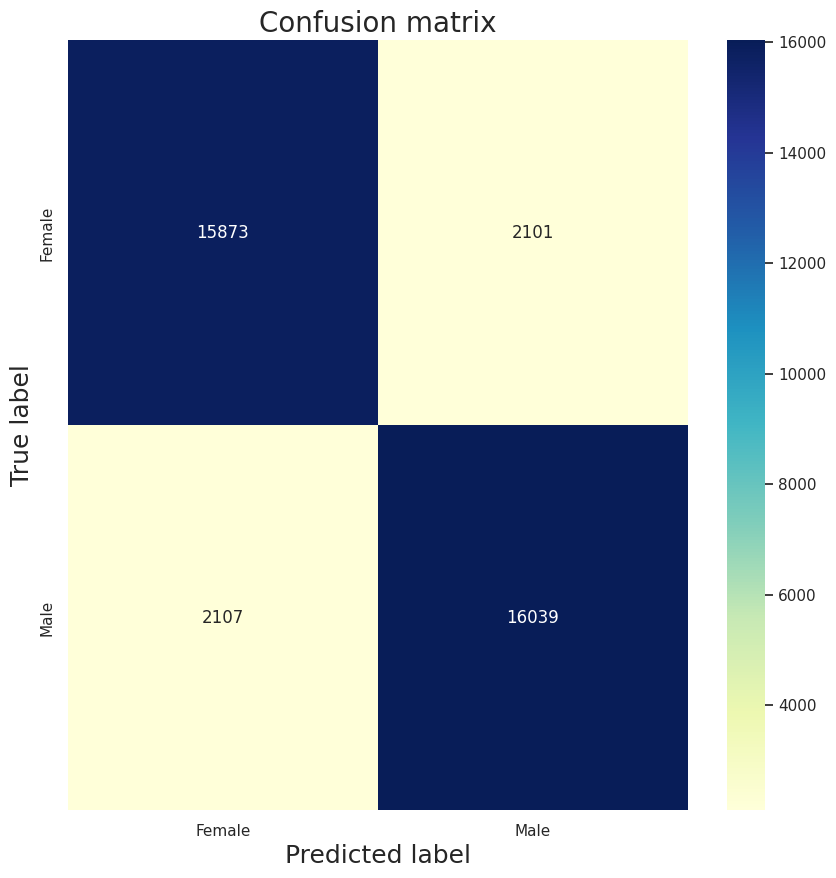

In [ ]:
#create CF
data = {'Actual': act_gender_str,'Predicted' : gender_predict_str}
df_1 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df_1['Actual'],df_1['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_gender_str, gender_predict_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## รวมตาราง

In [ ]:
result_y

Unnamed: 0     FileName age(year)  gender  \
0               0  FlipV67.jpg         7  Female   
1               1  FlipV67.jpg         7  Female   
2               2  FlipV67.jpg         7  Female   
3               3  FlipV67.jpg         7  Female   
4               4  FlipV67.jpg         7  Female   
...           ...          ...       ...     ...   
36115       36115     Y100.jpg        14  Female   
36116       36116     Y100.jpg        14  Female   
36117       36117     Y100.jpg        14  Female   
36118       36118     Y100.jpg        14  Female   
36119       36119     Y100.jpg        14  Female   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36116  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36117  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36118  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   
36119  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  274.8  189.9   

       width_ori  height_ori  scale_x  scale_y               filename_adj  \
0           27.3       35.30      1.0     0.95  adjust_y_0.95_FlipV67.jpg   
1           27.3       35.30      1.0     0.94  adjust_y_0.94_FlipV67.jpg   
2           27.3       35.30      1.0     0.93  adjust_y_0.93_FlipV67.jpg   
3           27.3       35.30      1.0     0.92  adjust_y_0.92_FlipV67.jpg   
4           27.3       35.30      1.0     0.91  adjust_y_0.91_FlipV67.jpg   
...          ...         ...      ...      ...                        ...   
36115       52.3       55.58      1.0     1.09     adjust_y_1.09_Y100.jpg   
36116       52.3       55.58      1.0     1.08     adjust_y_1.08_Y100.jpg   
36117       52.3       55.58      1.0     1.07     adjust_y_1.07_Y100.jpg   
36118       52.3       55.58      1.0     1.06     adjust_y_1.06_Y100.jpg   
36119       52.3       55.58      1.0     1.05     adjust_y_1.05_Y100.jpg   

                                           path_name_adj  x_adj  y_adj  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    268   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...    267    269   
...                                                  ...    ...    ...   
36115  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36116  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    188   
36117  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36118  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   
36119  /content/gdrive/MyDrive/DentDiscovering/UpperT...    274    189   

       width_adj  height_adj  
0             27          33  
1             27          32  
2             27          32  
3             27          32  
4             27          31  
...          ...         ...  
36115         52          59  
36116         52          59  
36117         52          58  
36118         52          58  
36119         52          57  

[36120 rows x 17 columns]

In [ ]:
#Regression
result_y['Age_predict'] = list_Regression_predict # ผลที่ทำนาย
result_y['Age_predict_int'] = age_predict

In [ ]:
result_y['Gender_predict'] = list_Classification_predict #'.format # ผลที่ทำนาย
# df['Gender_predict'] = df['Gender_predict'].apply(lambda x: f'{x:.8f}') #'.format # ผลที่ทำนาย
result_y['Gender_predict_str'] = gender_predict_str
result_y['Gender_predict_int'] = gender_predict_int

In [ ]:
result_y['prob'] = result_y['Gender_predict']

In [ ]:
result_y['adj_ratio_wh'] = result_y['width_adj']/result_y['height_adj']

In [ ]:
print(result_y.shape)
result_y.head()

(36120, 24)


Unnamed: 0     FileName age(year)  gender  \
0           0  FlipV67.jpg         7  Female   
1           1  FlipV67.jpg         7  Female   
2           2  FlipV67.jpg         7  Female   
3           3  FlipV67.jpg         7  Female   
4           4  FlipV67.jpg         7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  ...  y_adj width_adj height_adj  Age_predict  \
0        35.3      1.0  ...    268        27         33     7.720729   
1        35.3      1.0  ...    269        27         32     7.732365   
2        35.3      1.0  ...    269        27         32     7.732365   
3        35.3      1.0  ...    269        27         32     7.732365   
4        35.3      1.0  ...    269        27         31     7.723375   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.065412              Female                   0   
1                8        0.057024              Female                   0   
2                8        0.057024              Female                   0   
3                8        0.057024              Female                   0   
4                8        0.064732              Female                   0   

       prob  adj_ratio_wh  
0  0.065412      0.818182  
1  0.057024      0.843750  
2  0.057024      0.843750  
3  0.057024      0.843750  
4  0.064732      0.870968  

[5 rows x 24 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
result_y.to_csv('predict_data_scale_y.csv')

# เลือก data ที่สนใจมาทำ

In [ ]:
original= pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')

In [ ]:
pos_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_positive_bboxes.csv')
print(pos_final.shape)
pos_final.head(5)

(5729, 21)


Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
0           0  290.441006  318.575717  347.501520  375.691668    0.949560   
1           1  442.243241  190.380302  481.506713  277.754403    0.903445   
2           2  203.511023  295.167587  268.920413  389.243537    0.901955   
3           3  484.279613  233.741117  517.716436  341.186340    0.900648   
4           4  463.243440  229.484183  503.849152  327.621257    0.876810   

   class                   name filename  \
0   13.0     Lower Second Molar  V69.jpg   
1   19.0           Upper Canine  V69.jpg   
2    3.0       Mandibular angle  V69.jpg   
3   17.0  Upper Central Incisor  V69.jpg   
4    1.0  Upper Lateral Incisor  V69.jpg   

                                       path_name_ori  ... Age(year)  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   

   Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
0     7.423399              7.0       F            0        0.005142   
1     7.423399              7.0       F            0        0.005142   
2     7.423399              7.0       F            0        0.005142   
3     7.423399              7.0       F            0        0.005142   
4     7.423399              7.0       F            0        0.005142   

   Gender_Predict Gender_predict_str Gender_predict_int      prob  
0          Female             Female                0.0  0.994858  
1          Female             Female                0.0  0.994858  
2          Female             Female                0.0  0.994858  
3          Female             Female                0.0  0.994858  
4          Female             Female                0.0  0.994858  

[5 rows x 21 columns]

In [ ]:
neg_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_negative_bboxes.csv')
print(neg_final.shape)
neg_final.head(5)

(5593, 21)


Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
0           0  290.441006  318.575717  347.501520  375.691668    0.949560   
1           1  442.243241  190.380302  481.506713  277.754403    0.903445   
2           2  203.511023  295.167587  268.920413  389.243537    0.901955   
3           3  484.279613  233.741117  517.716436  341.186340    0.900648   
4           4  197.709316  221.778334  218.693832  295.307760    0.808702   

   class                       name filename  \
0   13.0         Lower Second Molar  V69.jpg   
1   19.0               Upper Canine  V69.jpg   
2    3.0           Mandibular angle  V69.jpg   
3   17.0      Upper Central Incisor  V69.jpg   
4   16.0  Posterior border of Ramus  V69.jpg   

                                       path_name_ori  ... Age(year)  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   

   Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
0     7.423399              7.0       F            0        0.005142   
1     7.423399              7.0       F            0        0.005142   
2     7.423399              7.0       F            0        0.005142   
3     7.423399              7.0       F            0        0.005142   
4     7.423399              7.0       F            0        0.005142   

   Gender_Predict Gender_predict_str Gender_predict_int      prob  
0          Female             Female                0.0  0.994858  
1          Female             Female                0.0  0.994858  
2          Female             Female                0.0  0.994858  
3          Female             Female                0.0  0.994858  
4          Female             Female                0.0  0.994858  

[5 rows x 21 columns]

In [ ]:
neg_U3M =  neg_final[neg_final['name']=='Upper Third Molar']
neg_U3M

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
195          195  286.681096  196.228560  334.928058  239.715254    0.822393   
199          199  292.736880  183.533787  340.777580  224.871952    0.681116   
294          294  316.418047  188.053624  353.024777  226.266029    0.834962   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
...          ...         ...         ...         ...         ...         ...   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5537        5537  234.633271  197.003729  297.967780  258.840329    0.891083   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
195    15.0  Upper Third Molar      VV94.jpg   
199    15.0  Upper Third Molar  FlipVV94.jpg   
294    15.0  Upper Third Molar       P72.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
...     ...                ...           ...   
5501   15.0  Upper Third Molar       D86.jpg   
5537   15.0  Upper Third Molar  FlipT220.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
195   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
199   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
294   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
...                                                 ...  ...       ...   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5537  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        16   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
195      7.382953              7.0       M            1        0.585802   
199      7.624788              8.0       M            1        0.552454   
294      7.828675              8.0       F            0        0.285624   
318      8.405476              8.0       F            0        0.008040   
...           ...              ...     ...          ...             ...   
5501    11.259871             11.0       F            0        0.000003   
5537    14.183917             14.0       M            1        0.996388   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.999550  
195             Male               Male                1.0  0.585802  
199             Male               Male                1.0  0.552454  
294           Female             Female                0.0  0.714376  
318           Female             Female                0.0  0.991960  
...              ...                ...                ...       ...  
5501          Female             Female                0.0  0.999997  
5537            Male               Male                1.0  0.996388  
5543          Female             Female

In [ ]:
neg_U3M_F = neg_U3M[neg_U3M['Gender_predict_str']=='Female']
neg_U3M_F

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
294          294  316.418047  188.053624  353.024777  226.266029    0.834962   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
337          337  280.352937  152.349829  326.070718  191.997360    0.823212   
384          384  283.159855  226.745967  331.658826  271.353791    0.851541   
...          ...         ...         ...         ...         ...         ...   
5326        5326  264.883370  156.284735  325.660024  214.267677    0.895957   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
294    15.0  Upper Third Molar       P72.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
337    15.0  Upper Third Molar   FlipP75.jpg   
384    15.0  Upper Third Molar       P80.jpg   
...     ...                ...           ...   
5326   15.0  Upper Third Molar  FlipJ180.jpg   
5501   15.0  Upper Third Molar       D86.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
294   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
337   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
384   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
...                                                 ...  ...       ...   
5326  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
294      7.828675              8.0       F            0        0.285624   
318      8.405476              8.0       F            0        0.008040   
337      8.392198              8.0       F            0        0.009854   
384      9.136309              9.0       F            0        0.000016   
...           ...              ...     ...          ...             ...   
5326    18.128885             18.0       F            0        0.000033   
5501    11.259871             11.0       F            0        0.000003   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.999550  
294           Female             Female                0.0  0.714376  
318           Female             Female                0.0  0.991960  
337           Female             Female                0.0  0.990146  
384           Female             Female                0.0  0.999984  
...              ...                ...                ...       ...  
5326          Female             Female                0.0  0.999967  
5501          Female             Female                0.0  0.999997  
5543          Female             Female

## Female correct prediction

In [ ]:
neg_U3M_cor = neg_U3M_F[neg_U3M_F['Gender']=='F']
neg_U3M_cor

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
294          294  316.418047  188.053624  353.024777  226.266029    0.834962   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
337          337  280.352937  152.349829  326.070718  191.997360    0.823212   
384          384  283.159855  226.745967  331.658826  271.353791    0.851541   
...          ...         ...         ...         ...         ...         ...   
5326        5326  264.883370  156.284735  325.660024  214.267677    0.895957   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
294    15.0  Upper Third Molar       P72.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
337    15.0  Upper Third Molar   FlipP75.jpg   
384    15.0  Upper Third Molar       P80.jpg   
...     ...                ...           ...   
5326   15.0  Upper Third Molar  FlipJ180.jpg   
5501   15.0  Upper Third Molar       D86.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
294   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
337   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
384   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
...                                                 ...  ...       ...   
5326  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
294      7.828675              8.0       F            0        0.285624   
318      8.405476              8.0       F            0        0.008040   
337      8.392198              8.0       F            0        0.009854   
384      9.136309              9.0       F            0        0.000016   
...           ...              ...     ...          ...             ...   
5326    18.128885             18.0       F            0        0.000033   
5501    11.259871             11.0       F            0        0.000003   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.999550  
294           Female             Female                0.0  0.714376  
318           Female             Female                0.0  0.991960  
337           Female             Female                0.0  0.990146  
384           Female             Female                0.0  0.999984  
...              ...                ...                ...       ...  
5326          Female             Female                0.0  0.999967  
5501          Female             Female                0.0  0.999997  
5543          Female             Female

In [ ]:
neg_U3M_cor['prob'] = neg_U3M_cor['Gender_predict']
neg_U3M_cor

<ipython-input-10-1665ff503994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_U3M_cor['prob'] = neg_U3M_cor['Gender_predict']


Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
294          294  316.418047  188.053624  353.024777  226.266029    0.834962   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
337          337  280.352937  152.349829  326.070718  191.997360    0.823212   
384          384  283.159855  226.745967  331.658826  271.353791    0.851541   
...          ...         ...         ...         ...         ...         ...   
5326        5326  264.883370  156.284735  325.660024  214.267677    0.895957   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
294    15.0  Upper Third Molar       P72.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
337    15.0  Upper Third Molar   FlipP75.jpg   
384    15.0  Upper Third Molar       P80.jpg   
...     ...                ...           ...   
5326   15.0  Upper Third Molar  FlipJ180.jpg   
5501   15.0  Upper Third Molar       D86.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
294   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
337   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
384   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
...                                                 ...  ...       ...   
5326  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
294      7.828675              8.0       F            0        0.285624   
318      8.405476              8.0       F            0        0.008040   
337      8.392198              8.0       F            0        0.009854   
384      9.136309              9.0       F            0        0.000016   
...           ...              ...     ...          ...             ...   
5326    18.128885             18.0       F            0        0.000033   
5501    11.259871             11.0       F            0        0.000003   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.000450  
294           Female             Female                0.0  0.285624  
318           Female             Female                0.0  0.008040  
337           Female             Female                0.0  0.009854  
384           Female             Female                0.0  0.000016  
...              ...                ...                ...       ...  
5326          Female             Female                0.0  0.000033  
5501          Female             Female                0.0  0.000003  
5543          Female             Female

In [ ]:
Fe_U3M_cor_95 = neg_U3M_cor[neg_U3M_cor['prob']<= 0.05]
Fe_U3M_cor_95

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
337          337  280.352937  152.349829  326.070718  191.997360    0.823212   
384          384  283.159855  226.745967  331.658826  271.353791    0.851541   
618          618  276.299096  196.579797  330.542097  243.550587    0.799935   
...          ...         ...         ...         ...         ...         ...   
5326        5326  264.883370  156.284735  325.660024  214.267677    0.895957   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
337    15.0  Upper Third Molar   FlipP75.jpg   
384    15.0  Upper Third Molar       P80.jpg   
618    15.0  Upper Third Molar       W85.jpg   
...     ...                ...           ...   
5326   15.0  Upper Third Molar  FlipJ180.jpg   
5501   15.0  Upper Third Molar       D86.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
337   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
384   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
618   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         9   
...                                                 ...  ...       ...   
5326  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
318      8.405476              8.0       F            0        0.008040   
337      8.392198              8.0       F            0        0.009854   
384      9.136309              9.0       F            0        0.000016   
618     10.127798             10.0       F            0        0.001775   
...           ...              ...     ...          ...             ...   
5326    18.128885             18.0       F            0        0.000033   
5501    11.259871             11.0       F            0        0.000003   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.000450  
318           Female             Female                0.0  0.008040  
337           Female             Female                0.0  0.009854  
384           Female             Female                0.0  0.000016  
618           Female             Female                0.0  0.001775  
...              ...                ...                ...       ...  
5326          Female             Female                0.0  0.000033  
5501          Female             Female                0.0  0.000003  
5543          Female             Female

### X

In [ ]:
x_data = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/predict_data_scale_x.csv')  #data ทำใหม่
print(x_data.shape)
x_data.head()

(36120, 24)


Unnamed: 0     FileName  age(year)  gender  \
0           0  FlipV67.jpg          7  Female   
1           1  FlipV67.jpg          7  Female   
2           2  FlipV67.jpg          7  Female   
3           3  FlipV67.jpg          7  Female   
4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  ...  y_adj width_adj height_adj  Age_predict  \
0        35.3     0.95  ...    267        25         35     7.727825   
1        35.3     0.94  ...    267        25         35     7.727825   
2        35.3     0.93  ...    267        25         35     7.727825   
3        35.3     0.92  ...    267        24         35     7.735183   
4        35.3     0.91  ...    267        24         35     7.735183   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.054891              Female                   0   
1                8        0.054891              Female                   0   
2                8        0.054891              Female                   0   
3                8        0.043857              Female                   0   
4                8        0.043857              Female                   0   

       prob  adj_ratio_wh  
0  0.054891      0.714286  
1  0.054891      0.714286  
2  0.054891      0.714286  
3  0.043857      0.685714  
4  0.043857      0.685714  

[5 rows x 24 columns]

In [ ]:
x_data.columns

Index(['Unnamed: 0', 'FileName', 'age(year)', 'gender', 'path_name_ori',
       'x_ori', 'y_ori', 'width_ori', 'height_ori', 'scale_x', 'scale_y',
       'filename_adj', 'path_name_adj', 'x_adj', 'y_adj', 'width_adj',
       'height_adj', 'Age_predict', 'Age_predict_int', 'Gender_predict',
       'Gender_predict_str', 'Gender_predict_int', 'prob', 'adj_ratio_wh'],
      dtype='object')

In [ ]:
Fe_U3M_cor_95

In [ ]:
Fe_U3M_cor_95[Fe_U3M_cor_95['filename'].isin(x_data['FileName'])]

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
80            80  276.354523  216.352865  322.525213  258.909999    0.872788   
318          318  292.508568  189.956494  346.883246  234.171410    0.832097   
337          337  280.352937  152.349829  326.070718  191.997360    0.823212   
384          384  283.159855  226.745967  331.658826  271.353791    0.851541   
618          618  276.299096  196.579797  330.542097  243.550587    0.799935   
...          ...         ...         ...         ...         ...         ...   
5326        5326  264.883370  156.284735  325.660024  214.267677    0.895957   
5501        5501  290.715577  170.299022  339.012019  218.237442    0.883611   
5543        5543  270.677941  165.951098  326.188195  244.199522    0.910855   
5550        5550  247.926857  194.989693  306.537026  277.636583    0.909871   
5590        5590  221.766519  199.069218  286.633940  291.172984    0.894681   

      class               name      filename  \
80     15.0  Upper Third Molar   FlipV84.jpg   
318    15.0  Upper Third Molar   FlipP74.jpg   
337    15.0  Upper Third Molar   FlipP75.jpg   
384    15.0  Upper Third Molar       P80.jpg   
618    15.0  Upper Third Molar       W85.jpg   
...     ...                ...           ...   
5326   15.0  Upper Third Molar  FlipJ180.jpg   
5501   15.0  Upper Third Molar       D86.jpg   
5543   15.0  Upper Third Molar       Q49.jpg   
5550   15.0  Upper Third Molar      U136.jpg   
5590   15.0  Upper Third Molar      J177.jpg   

                                          path_name_ori  ... Age(year)  \
80    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         7   
318   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
337   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
384   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         8   
618   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...         9   
...                                                 ...  ...       ...   
5326  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   
5501  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
5543  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        20   
5550  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        22   
5590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        25   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
80       7.775298              8.0       F            0        0.000450   
318      8.405476              8.0       F            0        0.008040   
337      8.392198              8.0       F            0        0.009854   
384      9.136309              9.0       F            0        0.000016   
618     10.127798             10.0       F            0        0.001775   
...           ...              ...     ...          ...             ...   
5326    18.128885             18.0       F            0        0.000033   
5501    11.259871             11.0       F            0        0.000003   
5543    20.701864             21.0       F            0        0.000186   
5550    20.846346             21.0       F            0        0.001581   
5590    19.068132             19.0       F            0        0.000009   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
80            Female             Female                0.0  0.000450  
318           Female             Female                0.0  0.008040  
337           Female             Female                0.0  0.009854  
384           Female             Female                0.0  0.000016  
618           Female             Female                0.0  0.001775  
...              ...                ...                ...       ...  
5326          Female             Female                0.0  0.000033  
5501          Female             Female                0.0  0.000003  
5543          Female             Female

In [ ]:
Fe_U3M_cor_95_Xad = x_data[x_data['FileName'].isin(Fe_U3M_cor_95['filename'])]
Fe_U3M_cor_95_Xad

Unnamed: 0     FileName  age(year)  gender  \
172           172  FlipV84.jpg          7  Female   
173           173  FlipV84.jpg          7  Female   
174           174  FlipV84.jpg          7  Female   
175           175  FlipV84.jpg          7  Female   
176           176  FlipV84.jpg          7  Female   
...           ...          ...        ...     ...   
36072       36072     U136.jpg         22  Female   
36073       36073     U136.jpg         22  Female   
36074       36074     U136.jpg         22  Female   
36075       36075     U136.jpg         22  Female   
36076       36076     U136.jpg         22  Female   

                                           path_name_ori  x_ori   y_ori  \
172    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
173    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
174    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
175    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
176    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
...                                                  ...    ...     ...   
36072  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36073  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36074  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36075  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36076  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   

       width_ori  height_ori  scale_x  ...  y_adj width_adj height_adj  \
172         35.4       29.11     0.95  ...    225        33         29   
173         35.4       29.11     0.94  ...    225        32         29   
174         35.4       29.11     0.93  ...    225        32         29   
175         35.4       29.11     0.92  ...    225        32         29   
176         35.4       29.11     0.91  ...    225        31         29   
...          ...         ...      ...  ...    ...       ...        ...   
36072       46.6       66.88     1.09  ...    206        50         66   
36073       46.6       66.88     1.08  ...    206        49         66   
36074       46.6       66.88     1.07  ...    206        49         66   
36075       46.6       66.88     1.06  ...    206        48         66   
36076       46.6       66.88     1.05  ...    206        48         66   

       Age_predict  Age_predict_int  Gender_predict  Gender_predict_str  \
172       8.293491                8        0.000407              Female   
173       8.286852                8        0.000425              Female   
174       8.286852                8        0.000425              Female   
175       8.286852                8        0.000425              Female   
176       8.282593                8        0.000325              Female   
...            ...              ...             ...                 ...   
36072    20.945688               21        0.002195              Female   
36073    20.851881               21        0.002793              Female   
36074    20.851881               21        0.002793              Female   
36075    20.794426               21        0.001960              Female   
36076    20.794426               21        0.001960              Female   

       Gender_predict_int      prob  adj_ratio_wh  
172                     0  0.000407      1.137931  
173                     0  0.000425      1.103448  
174                     0  0.000425      1.103448  
175                     0  0.000425      1.103448  
176                     0  0.000325      1.068966  
...                   ...       ...           ...  
36072                   0  0.002195      0.757576  
36073                   0  0.002793      0.742424  
36074                   0  0.002793      0.742424  
36075                   0  0.001960      0.727273  
36076                   0  0.001960      0.727273  

[8170 rows x 24 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
Fe_U3M_cor_95_Xad.to_csv('dataXad95_ori_focusU3M.csv')

### Y

In [ ]:
y_data = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/predict_data_scale_y.csv')  #data ทำใหม่
print(y_data.shape)
y_data.head()

(36120, 25)


Unnamed: 0.1  Unnamed: 0     FileName  age(year)  gender  \
0             0           0  FlipV67.jpg          7  Female   
1             1           1  FlipV67.jpg          7  Female   
2             2           2  FlipV67.jpg          7  Female   
3             3           3  FlipV67.jpg          7  Female   
4             4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  ...  y_adj  width_adj height_adj Age_predict  Age_predict_int  \
0        35.3  ...    268         27         33    7.720729                8   
1        35.3  ...    269         27         32    7.732365                8   
2        35.3  ...    269         27         32    7.732365                8   
3        35.3  ...    269         27         32    7.732365                8   
4        35.3  ...    269         27         31    7.723375                8   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.065412              Female                   0  0.065412   
1        0.057024              Female                   0  0.057024   
2        0.057024              Female                   0  0.057024   
3        0.057024              Female                   0  0.057024   
4        0.064732              Female                   0  0.064732   

   adj_ratio_wh  
0      0.818182  
1      0.843750  
2      0.843750  
3      0.843750  
4      0.870968  

[5 rows x 25 columns]

In [ ]:
Fe_U3M_cor_95_Yad = y_data[y_data['FileName'].isin(Fe_U3M_cor_95['filename'])]
Fe_U3M_cor_95_Yad

Unnamed: 0.1  Unnamed: 0     FileName  age(year)  gender  \
172             172         172  FlipV84.jpg          7  Female   
173             173         173  FlipV84.jpg          7  Female   
174             174         174  FlipV84.jpg          7  Female   
175             175         175  FlipV84.jpg          7  Female   
176             176         176  FlipV84.jpg          7  Female   
...             ...         ...          ...        ...     ...   
36072         36072       36072     U136.jpg         22  Female   
36073         36073       36073     U136.jpg         22  Female   
36074         36074       36074     U136.jpg         22  Female   
36075         36075       36075     U136.jpg         22  Female   
36076         36076       36076     U136.jpg         22  Female   

                                           path_name_ori  x_ori   y_ori  \
172    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
173    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
174    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
175    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
176    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.10   
...                                                  ...    ...     ...   
36072  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36073  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36074  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36075  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   
36076  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  251.9  206.22   

       width_ori  height_ori  ...  y_adj  width_adj height_adj Age_predict  \
172         35.4       29.11  ...    226         35         27    8.292046   
173         35.4       29.11  ...    226         35         27    8.292046   
174         35.4       29.11  ...    227         35         26    8.276253   
175         35.4       29.11  ...    227         35         26    8.276253   
176         35.4       29.11  ...    227         35         26    8.276253   
...          ...         ...  ...    ...        ...        ...         ...   
36072       46.6       66.88  ...    204         46         71   20.940594   
36073       46.6       66.88  ...    204         46         71   20.940594   
36074       46.6       66.88  ...    204         46         70   20.969780   
36075       46.6       66.88  ...    205         46         69   20.992233   
36076       46.6       66.88  ...    205         46         69   20.992233   

       Age_predict_int  Gender_predict  Gender_predict_str  \
172                  8        0.000399              Female   
173                  8        0.000399              Female   
174                  8        0.000374              Female   
175                  8        0.000374              Female   
176                  8        0.000374              Female   
...                ...             ...                 ...   
36072               21        0.001719              Female   
36073               21        0.001719              Female   
36074               21        0.001914              Female   
36075               21        0.002290              Female   
36076               21        0.002290              Female   

       Gender_predict_int      prob  adj_ratio_wh  
172                     0  0.000399      1.296296  
173                     0  0.000399      1.296296  
174                     0  0.000374      1.346154  
175                     0  0.000374      1.346154  
176                     0  0.000374      1.346154  
...                   ...       ...           ...  
36072                   0  0.001719      0.647887  
36073                   0  0.001719      0.647887  
36074                   0  0.001914      0.657143  
36075                   0  0.002290      0.666667  
36076                   0  0.002290      0.6666

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
Fe_U3M_cor_95_Yad.to_csv('dataYad95_ori_focusU3M.csv')

## Female incorrect prediction

In [ ]:
neg_U3M_incor = neg_U3M_F[neg_U3M_F['Gender']=='M']
neg_U3M_incor

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
1131        1131  255.887070  188.668689  308.029773  238.782653    0.891865   
1218        1218  299.688638  150.309750  348.705862  194.746782    0.827301   
1451        1451  279.132016  175.109549  339.213304  233.203024    0.887661   
1502        1502  265.142003  166.055040  322.632040  219.733361    0.898396   
1575        1575  269.974176  161.863345  320.098120  218.165610    0.875113   
1764        1764  257.165650  161.472156  316.235390  215.719183    0.885025   
1796        1796  300.401918  179.052282  357.851113  227.530168    0.840258   
1804        1804  277.968937  185.964175  332.449180  236.231172    0.842773   
1881        1881  272.645226  163.169551  333.462265  214.345915    0.880816   
2156        2156  243.380088  181.540005  298.602998  232.583838    0.878801   
2161        2161  268.774957  170.466319  318.400922  224.838653    0.864207   
2166        2166  264.299370  165.445316  316.028762  216.052542    0.893372   
2172        2172  290.713875  181.128408  345.434251  230.099063    0.879452   
2216        2216  265.609716  177.555699  316.164903  233.366354    0.901177   
2396        2396  262.264983  196.135997  312.394545  251.107495    0.901502   
2428        2428  266.276573  177.995069  324.214030  235.036548    0.700526   
2468        2468  279.483460  177.503458  351.078169  239.452243    0.899246   
2477        2477  272.236051  179.363689  333.583512  237.284727    0.899734   
2481        2481  308.952134  210.404711  362.421158  265.448349    0.884556   
2512        2512  275.948915  169.819885  333.040299  220.619803    0.863185   
2766        2766  251.864191  171.294377  318.920640  233.837896    0.888883   
2792        2792  262.391756  173.472221  336.065977  235.679278    0.884046   
2808        2808  259.977655  162.150499  326.374109  221.968062    0.884235   
3078        3078  302.511658  151.339279  366.052118  208.946747    0.877241   
3093        3093  289.954501  171.015228  335.601118  222.695938    0.851228   
3357        3357  282.073246  177.993062  331.781463  237.991120    0.899803   
3554        3554  273.109719  153.411319  340.932423  213.742320    0.883487   
3598        3598  254.870600  174.651500  316.120950  237.406159    0.880331   
3911        3911  290.136993  198.514221  351.530072  263.669288    0.885819   
3927        3927  252.391795  199.060944  313.248944  287.542028    0.865859   
4431        4431  254.201840  177.019257  311.300104  239.330856    0.891482   

      class               name       filename  \
1131   15.0  Upper Third Molar       HH87.jpg   
1218   15.0  Upper Third Molar       HH95.jpg   
1451   15.0  Upper Third Molar      DD108.jpg   
1502   15.0  Upper Third Molar  FlipDD115.jpg   
1575   15.0  Upper Third Molar       DD99.jpg   
1764   15.0  Upper Third Molar       OO97.jpg   
1796   15.0  Upper Third Molar      OO106.jpg   
1804   15.0  Upper Third Molar  FlipOO106.jpg   
1881   15.0  Upper Third Molar       OO99.jpg   
2156   15.0  Upper Third Molar  FlipGG125.jpg   
2161   15.0  Upper Third Molar      GG129.jpg   
2166   15.0  Upper Third Molar  FlipGG129.jpg   
2172   15.0  Upper Third Molar      GG132.jpg   
2216   15.0  Upper Third Molar      GG139.jpg   
2396   15.0  Upper Third Molar       Y247.jpg   
2428   15.0  Upper Third Molar       Y270.jpg   
2468   15.0  Upper Third Molar       Y279.jpg   
2477   15.0  Upper Third Molar   FlipY279.jpg   
2481   15.0  Upper Third Molar       Y243.jpg   
2512   15.0  Upper Third Molar   FlipY248.jpg   
2766   15.0  Upper Third Molar   FlipB284.jpg   
2792   15.0  Upper Third Molar   FlipB310.jpg   
2808   15.0  Upper Third Molar        B99.jpg   
3078   15.0  Upper Third Molar       T232.jpg   
3093   15.0  Upper Third Molar       T230.jpg   
3357   15.0  Upper Third Molar   FlipK327.jpg   
3554   15.0  Upper Third Molar   FlipS343.jpg   
3598   15.0  Upper Third Molar   FlipS348.jpg   
3911   15.0  Upper Third

In [ ]:
neg_U3M_incor['prob'] = neg_U3M_incor['Gender_predict']
neg_U3M_incor

<ipython-input-30-96df44ebe8bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_U3M_incor['prob'] = neg_U3M_incor['Gender_predict']


Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
1131        1131  255.887070  188.668689  308.029773  238.782653    0.891865   
1218        1218  299.688638  150.309750  348.705862  194.746782    0.827301   
1451        1451  279.132016  175.109549  339.213304  233.203024    0.887661   
1502        1502  265.142003  166.055040  322.632040  219.733361    0.898396   
1575        1575  269.974176  161.863345  320.098120  218.165610    0.875113   
1764        1764  257.165650  161.472156  316.235390  215.719183    0.885025   
1796        1796  300.401918  179.052282  357.851113  227.530168    0.840258   
1804        1804  277.968937  185.964175  332.449180  236.231172    0.842773   
1881        1881  272.645226  163.169551  333.462265  214.345915    0.880816   
2156        2156  243.380088  181.540005  298.602998  232.583838    0.878801   
2161        2161  268.774957  170.466319  318.400922  224.838653    0.864207   
2166        2166  264.299370  165.445316  316.028762  216.052542    0.893372   
2172        2172  290.713875  181.128408  345.434251  230.099063    0.879452   
2216        2216  265.609716  177.555699  316.164903  233.366354    0.901177   
2396        2396  262.264983  196.135997  312.394545  251.107495    0.901502   
2428        2428  266.276573  177.995069  324.214030  235.036548    0.700526   
2468        2468  279.483460  177.503458  351.078169  239.452243    0.899246   
2477        2477  272.236051  179.363689  333.583512  237.284727    0.899734   
2481        2481  308.952134  210.404711  362.421158  265.448349    0.884556   
2512        2512  275.948915  169.819885  333.040299  220.619803    0.863185   
2766        2766  251.864191  171.294377  318.920640  233.837896    0.888883   
2792        2792  262.391756  173.472221  336.065977  235.679278    0.884046   
2808        2808  259.977655  162.150499  326.374109  221.968062    0.884235   
3078        3078  302.511658  151.339279  366.052118  208.946747    0.877241   
3093        3093  289.954501  171.015228  335.601118  222.695938    0.851228   
3357        3357  282.073246  177.993062  331.781463  237.991120    0.899803   
3554        3554  273.109719  153.411319  340.932423  213.742320    0.883487   
3598        3598  254.870600  174.651500  316.120950  237.406159    0.880331   
3911        3911  290.136993  198.514221  351.530072  263.669288    0.885819   
3927        3927  252.391795  199.060944  313.248944  287.542028    0.865859   
4431        4431  254.201840  177.019257  311.300104  239.330856    0.891482   

      class               name       filename  \
1131   15.0  Upper Third Molar       HH87.jpg   
1218   15.0  Upper Third Molar       HH95.jpg   
1451   15.0  Upper Third Molar      DD108.jpg   
1502   15.0  Upper Third Molar  FlipDD115.jpg   
1575   15.0  Upper Third Molar       DD99.jpg   
1764   15.0  Upper Third Molar       OO97.jpg   
1796   15.0  Upper Third Molar      OO106.jpg   
1804   15.0  Upper Third Molar  FlipOO106.jpg   
1881   15.0  Upper Third Molar       OO99.jpg   
2156   15.0  Upper Third Molar  FlipGG125.jpg   
2161   15.0  Upper Third Molar      GG129.jpg   
2166   15.0  Upper Third Molar  FlipGG129.jpg   
2172   15.0  Upper Third Molar      GG132.jpg   
2216   15.0  Upper Third Molar      GG139.jpg   
2396   15.0  Upper Third Molar       Y247.jpg   
2428   15.0  Upper Third Molar       Y270.jpg   
2468   15.0  Upper Third Molar       Y279.jpg   
2477   15.0  Upper Third Molar   FlipY279.jpg   
2481   15.0  Upper Third Molar       Y243.jpg   
2512   15.0  Upper Third Molar   FlipY248.jpg   
2766   15.0  Upper Third Molar   FlipB284.jpg   
2792   15.0  Upper Third Molar   FlipB310.jpg   
2808   15.0  Upper Third Molar        B99.jpg   
3078   15.0  Upper Third Molar       T232.jpg   
3093   15.0  Upper Third Molar       T230.jpg   
3357   15.0  Upper Third Molar   FlipK327.jpg   
3554   15.0  Upper Third Molar   FlipS343.jpg   
3598   15.0  Upper Third Molar   FlipS348.jpg   
3911   15.0  Upper Third

In [ ]:
Fe_U3M_incor_5 = neg_U3M_incor[(neg_U3M_incor['prob']>=0.45)&(neg_U3M_incor['prob']<0.5)]
Fe_U3M_incor_5

Unnamed: 0        xmin        ymin        xmax        ymax  confidence  \
1502        1502  265.142003  166.055040  322.632040  219.733361    0.898396   
1764        1764  257.165650  161.472156  316.235390  215.719183    0.885025   
2481        2481  308.952134  210.404711  362.421158  265.448349    0.884556   

      class               name       filename  \
1502   15.0  Upper Third Molar  FlipDD115.jpg   
1764   15.0  Upper Third Molar       OO97.jpg   
2481   15.0  Upper Third Molar       Y243.jpg   

                                          path_name_ori  ... Age(year)  \
1502  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        11   
1764  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        12   
2481  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...        14   

      Age_predict  Age_predict_int  Gender Gender_Class  Gender_predict  \
1502    11.063769             11.0       M            1        0.493018   
1764    11.715975             12.0       M            1        0.457828   
2481    10.611144             11.0       M            1        0.497346   

      Gender_Predict Gender_predict_str Gender_predict_int      prob  
1502            Male             Female                0.0  0.493018  
1764            Male             Female                0.0  0.457828  
2481            Male             Female                0.0  0.497346  

[3 rows x 21 columns]

### X

In [ ]:
x_data = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/predict_data_scale_x.csv')  #data ทำใหม่
print(x_data.shape)
x_data.head()

(36120, 24)


Unnamed: 0     FileName  age(year)  gender  \
0           0  FlipV67.jpg          7  Female   
1           1  FlipV67.jpg          7  Female   
2           2  FlipV67.jpg          7  Female   
3           3  FlipV67.jpg          7  Female   
4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  scale_x  ...  y_adj width_adj height_adj  Age_predict  \
0        35.3     0.95  ...    267        25         35     7.727825   
1        35.3     0.94  ...    267        25         35     7.727825   
2        35.3     0.93  ...    267        25         35     7.727825   
3        35.3     0.92  ...    267        24         35     7.735183   
4        35.3     0.91  ...    267        24         35     7.735183   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.054891              Female                   0   
1                8        0.054891              Female                   0   
2                8        0.054891              Female                   0   
3                8        0.043857              Female                   0   
4                8        0.043857              Female                   0   

       prob  adj_ratio_wh  
0  0.054891      0.714286  
1  0.054891      0.714286  
2  0.054891      0.714286  
3  0.043857      0.685714  
4  0.043857      0.685714  

[5 rows x 24 columns]

In [ ]:
Fe_U3M_incor_5_Xad = x_data[x_data['FileName'].isin(Fe_U3M_incor_5['filename'])]
Fe_U3M_incor_5_Xad

Unnamed: 0       FileName  age(year) gender  \
6278         6278  FlipDD115.jpg         11   Male   
6279         6279  FlipDD115.jpg         11   Male   
6280         6280  FlipDD115.jpg         11   Male   
6281         6281  FlipDD115.jpg         11   Male   
6282         6282  FlipDD115.jpg         11   Male   
...           ...            ...        ...    ...   
11949       11949       Y243.jpg         14   Male   
11950       11950       Y243.jpg         14   Male   
11951       11951       Y243.jpg         14   Male   
11952       11952       Y243.jpg         14   Male   
11953       11953       Y243.jpg         14   Male   

                                           path_name_ori  x_ori  y_ori  \
6278   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6279   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6280   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6281   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6282   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
...                                                  ...    ...    ...   
11949  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11950  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11951  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11952  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11953  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   

       width_ori  height_ori  scale_x  ...  y_adj width_adj height_adj  \
6278        49.6        46.4     0.95  ...    170        46         46   
6279        49.6        46.4     0.94  ...    170        46         46   
6280        49.6        46.4     0.93  ...    170        45         46   
6281        49.6        46.4     0.92  ...    170        45         46   
6282        49.6        46.4     0.91  ...    170        44         46   
...          ...         ...      ...  ...    ...       ...        ...   
11949       45.5        47.0     1.09  ...    213        49         46   
11950       45.5        47.0     1.08  ...    213        48         46   
11951       45.5        47.0     1.07  ...    213        48         46   
11952       45.5        47.0     1.06  ...    213        47         46   
11953       45.5        47.0     1.05  ...    213        47         46   

       Age_predict  Age_predict_int  Gender_predict  Gender_predict_str  \
6278     11.057992               11        0.488195              Female   
6279     11.057992               11        0.488195              Female   
6280     11.053885               11        0.526015                Male   
6281     11.053885               11        0.526015                Male   
6282     11.065682               11        0.530138                Male   
...            ...              ...             ...                 ...   
11949    10.642120               11        0.464401              Female   
11950    10.629797               11        0.461749              Female   
11951    10.629797               11        0.461749              Female   
11952    10.627445               11        0.483848              Female   
11953    10.627445               11        0.483848              Female   

       Gender_predict_int      prob  adj_ratio_wh  
6278                    0  0.488195      1.000000  
6279                    0  0.488195      1.000000  
6280                    1  0.526015      0.978261  
6281                    1  0.526015      0.978261  
6282                    1  0.530138      0.956522  
...                   ...       ...           ...  
11949                   0  0.464401      1.065217  
11950                   0  0.461749      1.043478  
11951                   0  0.461749      1.043478  
11952                   0  0.483848      1.021739  
11953                   0  0.483848      1.021739  

[129 rows x 24 columns]

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
Fe_U3M_incor_5_Xad.to_csv('dataXad5_ori_focusU3M.csv')

### Y

In [ ]:
y_data = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/predict_data_scale_y.csv')  #data ทำใหม่
print(y_data.shape)
y_data.head()

(36120, 25)


Unnamed: 0.1  Unnamed: 0     FileName  age(year)  gender  \
0             0           0  FlipV67.jpg          7  Female   
1             1           1  FlipV67.jpg          7  Female   
2             2           2  FlipV67.jpg          7  Female   
3             3           3  FlipV67.jpg          7  Female   
4             4           4  FlipV67.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  267.1  267.1       27.3   

   height_ori  ...  y_adj  width_adj height_adj Age_predict  Age_predict_int  \
0        35.3  ...    268         27         33    7.720729                8   
1        35.3  ...    269         27         32    7.732365                8   
2        35.3  ...    269         27         32    7.732365                8   
3        35.3  ...    269         27         32    7.732365                8   
4        35.3  ...    269         27         31    7.723375                8   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.065412              Female                   0  0.065412   
1        0.057024              Female                   0  0.057024   
2        0.057024              Female                   0  0.057024   
3        0.057024              Female                   0  0.057024   
4        0.064732              Female                   0  0.064732   

   adj_ratio_wh  
0      0.818182  
1      0.843750  
2      0.843750  
3      0.843750  
4      0.870968  

[5 rows x 25 columns]

In [ ]:
Fe_U3M_incor_5_Yad = y_data[y_data['FileName'].isin(Fe_U3M_incor_5['filename'])]
Fe_U3M_incor_5_Yad

Unnamed: 0.1  Unnamed: 0       FileName  age(year) gender  \
6278           6278        6278  FlipDD115.jpg         11   Male   
6279           6279        6279  FlipDD115.jpg         11   Male   
6280           6280        6280  FlipDD115.jpg         11   Male   
6281           6281        6281  FlipDD115.jpg         11   Male   
6282           6282        6282  FlipDD115.jpg         11   Male   
...             ...         ...            ...        ...    ...   
11949         11949       11949       Y243.jpg         14   Male   
11950         11950       11950       Y243.jpg         14   Male   
11951         11951       11951       Y243.jpg         14   Male   
11952         11952       11952       Y243.jpg         14   Male   
11953         11953       11953       Y243.jpg         14   Male   

                                           path_name_ori  x_ori  y_ori  \
6278   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6279   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6280   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6281   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
6282   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  268.6  170.3   
...                                                  ...    ...    ...   
11949  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11950  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11951  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11952  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   
11953  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  314.7  213.0   

       width_ori  height_ori  ...  y_adj  width_adj height_adj Age_predict  \
6278        49.6        46.4  ...    172         49         43   11.065659   
6279        49.6        46.4  ...    172         49         43   11.065659   
6280        49.6        46.4  ...    172         49         42   11.061256   
6281        49.6        46.4  ...    172         49         42   11.061256   
6282        49.6        46.4  ...    173         49         41   11.065465   
...          ...         ...  ...    ...        ...        ...         ...   
11949       45.5        47.0  ...    211         45         50   10.657833   
11950       45.5        47.0  ...    212         45         49   10.655636   
11951       45.5        47.0  ...    212         45         49   10.655636   
11952       45.5        47.0  ...    212         45         48   10.645865   
11953       45.5        47.0  ...    212         45         48   10.645865   

       Age_predict_int  Gender_predict  Gender_predict_str  \
6278                11        0.501128                Male   
6279                11        0.501128                Male   
6280                11        0.557025                Male   
6281                11        0.557025                Male   
6282                11        0.516289                Male   
...                ...             ...                 ...   
11949               11        0.450025              Female   
11950               11        0.477572              Female   
11951               11        0.477572              Female   
11952               11        0.493853              Female   
11953               11        0.493853              Female   

       Gender_predict_int      prob  adj_ratio_wh  
6278                    1  0.501128      1.139535  
6279                    1  0.501128      1.139535  
6280                    1  0.557025      1.166667  
6281                    1  0.557025      1.166667  
6282                    1  0.516289      1.195122  
...                   ...       ...           ...  
11949                   0  0.450025      0.900000  
11950                   0  0.477572      0.918367  
11951                   0  0.477572      0.918367  
11952                   0  0.493853      0.937500  
11953                   0  0.493853      0.9375

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/')
Fe_U3M_incor_5_Yad.to_csv('dataYad5_ori_focusU3M.csv')

# SHAP_YOLO

## X cor 95

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Place a computation on the GPU
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
print(c)

Num GPUs Available:  1
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


### เลือกข้อมูล ทำ Background data ของ data train

In [ ]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
dt_train

In [ ]:
df = dt_train.drop(dt_train.columns[[0,1]], axis=1)
df

In [ ]:
df.columns

In [ ]:
# นับรูป
# Get unique age values
unique_ages = dt_train['age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['age(year)'] == age) & (dt_train['gender'] == 'Male')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['age(year)'] == age) & (dt_train['gender'] == 'Female')].shape
    print(f"Age {age}: {shape}")

In [ ]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'age(year)': dt_train['age(year)'],
    'gender': dt_train['gender'],
    'path_name_ori': dt_train['path_name_ori'],
    'path_name_adj': dt_train['path_name_adj'],
    'FileName': dt_train['FileName'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['gender'] == 'Male'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['gender'] == 'Female'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_df = pd.concat(selected_rows)


In [ ]:
selected_df

In [ ]:
# Get unique age values
unique_ages = selected_df['age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_df[(selected_df['age(year)'] == age) & (selected_df['gender'] == 'Male')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_df['age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_df[(selected_df['age(year)'] == age) & (selected_df['gender'] == 'Female')].shape
    print(f"Age {age}: {shape}")

In [ ]:
train_bg = selected_df

### เลือกข้อมูล ทำ Background data ของ test data

In [ ]:
test_bg = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_bg = test_bg.iloc[:,2:]
print(test_bg.shape)
test_bg.head(5)

(8170, 23)


FileName  age(year)  gender  \
0  FlipV84.jpg          7  Female   
1  FlipV84.jpg          7  Female   
2  FlipV84.jpg          7  Female   
3  FlipV84.jpg          7  Female   
4  FlipV84.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   

   height_ori  scale_x  scale_y  ... y_adj width_adj  height_adj  Age_predict  \
0       29.11     0.95      1.0  ...   225        33          29     8.293491   
1       29.11     0.94      1.0  ...   225        32          29     8.286852   
2       29.11     0.93      1.0  ...   225        32          29     8.286852   
3       29.11     0.92      1.0  ...   225        32          29     8.286852   
4       29.11     0.91      1.0  ...   225        31          29     8.282593   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.000407              Female                   0   
1                8        0.000425              Female                   0   
2                8        0.000425              Female                   0   
3                8        0.000425              Female                   0   
4                8        0.000325              Female                   0   

       prob adj_ratio_wh  
0  0.000407     1.137931  
1  0.000425     1.103448  
2  0.000425     1.103448  
3  0.000425     1.103448  
4  0.000325     1.068966  

[5 rows x 23 columns]

In [ ]:
test_bg = test_bg.iloc[:2000,:]
test_bg

FileName  age(year)  gender  \
0     FlipV84.jpg          7  Female   
1     FlipV84.jpg          7  Female   
2     FlipV84.jpg          7  Female   
3     FlipV84.jpg          7  Female   
4     FlipV84.jpg          7  Female   
...           ...        ...     ...   
1995     Y202.jpg         14  Female   
1996     Y202.jpg         14  Female   
1997     Y202.jpg         14  Female   
1998     Y202.jpg         14  Female   
1999     Y202.jpg         14  Female   

                                          path_name_ori  x_ori  y_ori  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1   
...                                                 ...    ...    ...   
1995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.0   
1996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.0   
1997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.0   
1998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.0   
1999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.0   

      width_ori  height_ori  scale_x  scale_y  ... y_adj width_adj  \
0          35.4       29.11     0.95      1.0  ...   225        33   
1          35.4       29.11     0.94      1.0  ...   225        32   
2          35.4       29.11     0.93      1.0  ...   225        32   
3          35.4       29.11     0.92      1.0  ...   225        32   
4          35.4       29.11     0.91      1.0  ...   225        31   
...         ...         ...      ...      ...  ...   ...       ...   
1995       49.9       57.10     0.78      1.0  ...   190        38   
1996       49.9       57.10     0.77      1.0  ...   190        37   
1997       49.9       57.10     0.76      1.0  ...   190        37   
1998       49.9       57.10     0.75      1.0  ...   190        36   
1999       49.9       57.10     1.00      1.0  ...   190        49   

      height_adj  Age_predict  Age_predict_int  Gender_predict  \
0             29     8.293491                8        0.000407   
1             29     8.286852                8        0.000425   
2             29     8.286852                8        0.000425   
3             29     8.286852                8        0.000425   
4             29     8.282593                8        0.000325   
...          ...          ...              ...             ...   
1995          57    14.964794               15        0.003987   
1996          57    14.967453               15        0.004344   
1997          57    14.967453               15        0.004344   
1998          57    14.969353               15        0.002168   
1999          57    14.970126               15        0.012245   

      Gender_predict_str  Gender_predict_int      prob adj_ratio_wh  
0                 Female                   0  0.000407     1.137931  
1                 Female                   0  0.000425     1.103448  
2                 Female                   0  0.000425     1.103448  
3                 Female                   0  0.000425     1.103448  
4                 Female                   0  0.000325     1.068966  
...                  ...                 ...       ...          ...  
1995              Female                   0  0.003987     0.666667  
1996              Female                   0  0.004344     0.649123  
1997              Female                   0  0.004344     0.649123  
1998              Female                   0  0.002168     0.631579  
1999              Female                   0  0.012245     0.859649  

[2000 rows x 23 columns]

### create bg

#### train

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
def process_input_train(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_name' column exists in the DataFrame
    if 'path_name_ori' not in dt_train.columns:
        raise ValueError("The 'path_name_ori' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        # print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['path_name_ori'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)
    print('done')

    return background_data

In [ ]:
background_train = process_input_train(train_bg)

done


#### test

In [ ]:
def process_input_test(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_name' column exists in the DataFrame
    if 'path_name_adj' not in dt_train.columns:
        raise ValueError("The 'path_name_adj' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        # print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['path_name_adj'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)
    print('done')

    return background_data

In [ ]:
background_test = process_input_test(test_bg)

done


### **แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [ ]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [ ]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

1303
(1303, 224, 224, 3)
(2000, 224, 224, 3)


### คำนวณ SHAP Values

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


## SHAP & YOLO

### SHAP

In [ ]:
!pip install shap==0.44.1

In [ ]:
import shap

เลือกเฉพาะ Output layer ไปทำการหาความสำคัญ

In [ ]:
import shap
import tensorflow as tf

model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)


In [ ]:
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

### yolo

In [ ]:
# load YOLO ที่Train มา
# Replace with code to load your trained YOLO model
import torch
weights_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/papers/gpt/Yolo_v5/best.pt'

# Load YOLOv5 model from Google Drive
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-16 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


#### ทํา non maximum suppression

In [ ]:
# กำหนด confidence
import pandas as pd

def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxB[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.5, confidence_threshold=0.6):
    # Initialize an empty DataFrame to store NMS results
    df_nms = pd.DataFrame()

    # Get unique class IDs
    class_ids = df['class'].unique()

    for class_id in class_ids:
        # Filter detections by class
        df_class = df[df['class'] == class_id].copy()

        # Filter out detections with low confidence
        df_class = df_class[df_class['confidence'] > confidence_threshold]

        # Apply NMS
        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        suppressed_indices = set()

        for i in range(len(df_class_sorted)):
            if i in suppressed_indices:
                continue

            for j in range(i+1, len(df_class_sorted)):
                if j in suppressed_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]

                if compute_iou(boxA, boxB) > iou_threshold:
                    suppressed_indices.add(j)

        # Filter out suppressed detections
        df_nms_class = df_class_sorted.drop(index=list(suppressed_indices)).reset_index(drop=True)

        # Append results for this class to the main DataFrame
        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms

#### def map box ที่ detectกับ SHAP value

##### pos img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_pos(image_path, df, grayscale_image, output_path):
    selected_bboxes = []  #สร้าง list ว่าง มาเก็บกล่องที่มีค่า SHAP เกิน IoU ที่ 0.1
    # value_than_IoU = []

    # Load the original image
    img = Image.open(image_path) #  เปิดภาพจาก path
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()  #plot ภาพ + กล่อง

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency // plot จากสีเทา ให้เป้นน สีแดง ทับลงไป
    ax.imshow(grayscale_image, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():  #df ที่ตัวแบบทนายมาทั้งหมด  จะทำการ loop เก็บค่าตห.จากตาราง
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name = row['confidence'], row['class'],row['name']     #,IoU,row['iou']

        # Convert coordinates to absolute values // เปลี่ยนจากตห.ของกล่อง ให้ตามขนาดภาพที่ใส่เข้าไป (ม้้ง)
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image //คำนวณบริเวณที่สินใจ
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1]) # แปลงพิกัดกรอบสีเหลี่ยมให้เข้ากับขนาดรูปภาพ โดย *พิกัด กับขนาดของ grayscale_image
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax] # เลือก roi บริเวณที่สนใจ  จากgrayscale_image โดยตัด roi ออกมาเป็น nparray

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1]) #Calculate the percentage ของ pixels ที่ไม่เป็น 0 แล้วหารด้วย pixels ทั้งหมด

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name}) #, 'iou':IoU
            # value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch //สร้างกล่อง
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin), #abs แปลงเป็นพิกัดในหน่วย  pixel ให้ตรงกับขนาดภาพจริง
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='r', # เปลี่ยนสีกล่อง
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}' # ข้อความที่จะ Plot บนกล่อง
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5)) # ตห + สีของตัวอักษร ขนาด front
    # Save the figure
    plt.savefig(output_path, bbox_inches='tight')

    # Show the plot
    plt.show()

    return selected_bboxes#, value_than_IoU

##### neg img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_neg(image_path, df, grayscale_image, output_path):
    selected_bboxes = []
    # value_than_IoU = []

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name = row['confidence'], row['class'],row['name'] #,IoU,row['iou']

        # Convert coordinates to absolute values
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1])
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax]

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1])

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box#เลือกกล่องที่มีค่า shap ในกล่องมากกว่า 10% ของทั้งหมด
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name}) #, 'iou':IoU
            # value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin),
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='b',
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}'
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
   # Save the figure
    plt.savefig(output_path, bbox_inches='tight')

    # Show the plot
    plt.show()

    return selected_bboxes#, value_than_IoU

### plot box

#### R1

In [ ]:
test_gender = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_gender = test_gender.iloc[:,2:]
print(test_gender.shape)
test_gender.head(5)

(8170, 23)


FileName  age(year)  gender  \
0  FlipV84.jpg          7  Female   
1  FlipV84.jpg          7  Female   
2  FlipV84.jpg          7  Female   
3  FlipV84.jpg          7  Female   
4  FlipV84.jpg          7  Female   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.000407              Female                   0  0.000407   
1        0.000425              Female                   0  0.000425   
2        0.000425              Female                   0  0.000425   
3        0.000425              Female                   0  0.000425   
4        0.000325              Female                   0  0.000325   

   adj_ratio_wh  
0      1.137931  
1      1.103448  
2      1.103448  
3      1.103448  
4      1.068966  

[5 rows x 23 columns]

In [ ]:
test_gender = test_gender.iloc[:2000,:]
test_gender

FileName  age(year)  gender  \
0     FlipV84.jpg          7  Female   
1     FlipV84.jpg          7  Female   
2     FlipV84.jpg          7  Female   
3     FlipV84.jpg          7  Female   
4     FlipV84.jpg          7  Female   
...           ...        ...     ...   
1995     Y202.jpg         14  Female   
1996     Y202.jpg         14  Female   
1997     Y202.jpg         14  Female   
1998     Y202.jpg         14  Female   
1999     Y202.jpg         14  Female   

                                          path_name_ori  x_ori  ...  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
...                                                 ...    ...  ...   
1995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
1996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
1997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
1998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
1999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0           0.000407              Female                   0  0.000407   
1           0.000425              Female                   0  0.000425   
2           0.000425              Female                   0  0.000425   
3           0.000425              Female                   0  0.000425   
4           0.000325              Female                   0  0.000325   
...              ...                 ...                 ...       ...   
1995        0.003987              Female                   0  0.003987   
1996        0.004344              Female                   0  0.004344   
1997        0.004344              Female                   0  0.004344   
1998        0.002168              Female                   0  0.002168   
1999        0.012245              Female                   0  0.012245   

      adj_ratio_wh  
0         1.137931  
1         1.103448  
2         1.103448  
3         1.103448  
4         1.068966  
...            ...  
1995      0.666667  
1996      0.649123  
1997      0.649123  
1998      0.631579  
1999      0.859649  

[2000 rows x 23 columns]

In [ ]:
list_test_gender = test_gender['path_name_adj'].tolist()
file_paths_test_gender = pd.Series(list_test_gender)

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/')
# !mkdir adjusting_x
# !mkdir adjusting_y

In [ ]:
# Initialize lists to keep track of data
dataframe_neg = []
dataframe_pos = []
list_neg = []
list_pos = []

# Iterate over each file path in the Series
for index, file_path in file_paths_test_gender.items():
    filename = file_path.split("/")[-1]


    try:
        # Load the image
        image = Image.open(file_path)

        # Perform your existing image processing steps
        # with torch.amp.autocast(device_type='cuda'):
        results = yolo_model(image)  # Assuming yolo_model is defined
        df = results.pandas().xyxyn[0]  # Assuming results has a pandas method
        df_filtered_nms = nms_per_class(df, iou_threshold=0.5, confidence_threshold=0.6)  # Assuming nms_per_class is defined
        shap_values = explainer_layer2.shap_values(background_test_array[[index]])  # Assuming explainer_layer1 and background_test_array are defined

        # Processing for SHAP values
        data = [np.array(shap_values)]
        image_array = data[0]
        positive = np.where(image_array >= 0, image_array, 0)
        negative = np.where(image_array < 0, image_array, 0)
        negative_aps = np.abs(negative)

        flattened_array_pos = positive.flatten()
        flattened_array_neg = negative_aps.flatten()

        normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
        normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

        normalized_positive = normalized_array_pos.reshape(positive.shape)
        normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

        grayscale_image_pos = normalized_positive / 3.0
        grayscale_image_neg = normalized_neg / 3.0

        grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
        grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

        grayscale_image_positive = grayscale_image_positive.squeeze()
        grayscale_image_negative = grayscale_image_negative.squeeze()

        percentile_95_pos = np.percentile(grayscale_image_positive, 95)
        percentile_95_neg = np.percentile(grayscale_image_negative, 95)

        grayscale_pos_thresholded = grayscale_image_positive
        grayscale_neg_thresholded = grayscale_image_negative

        grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
        grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

        # Example: Display or save processed results
        # %matplotlib inline
        # shap.image_plot(shap_values, background_test_array[[index]])

        # Assuming plot_bboxes_on_image_pos and plot_bboxes_on_image_neg are defined
        pos_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/pos_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_pos = plot_bboxes_on_image_pos(file_path, df_filtered_nms, grayscale_pos_thresholded, pos_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for positive bboxes
        df_pos = pd.DataFrame(selected_bboxes_pos)
        df_pos['filename'] = filename
        df_pos['path_name'] = file_path
        df_pos['path_pos_img'] = pos_image_path
        dataframe_pos.append(df_pos)  # Add DataFrame to the list
        list_pos.append(selected_bboxes_pos)  # Add list to the list

        neg_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/neg_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_neg = plot_bboxes_on_image_neg(file_path, df_filtered_nms, grayscale_neg_thresholded, neg_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for negative bboxes
        df_neg = pd.DataFrame(selected_bboxes_neg)
        df_neg['filename'] = filename
        df_neg['path_name'] = file_path
        df_neg['path_neg_img'] = neg_image_path
        dataframe_neg.append(df_neg)  # Add DataFrame to the list
        list_neg.append(selected_bboxes_neg)  # Add list to the list

    except Exception as e:
        print(f"Error processing image {index}: {file_path}")
        print(e)

# Concatenate all the DataFrames into a single DataFrame
final_df_pos = pd.concat(dataframe_pos, ignore_index=True)
final_df_neg = pd.concat(dataframe_neg, ignore_index=True)

# Save the final DataFrames to CSV files if needed
final_df_pos.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R1.csv', index=False)
final_df_neg.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R1.csv', index=False)
print(f"Processing image {index}: {file_path}")
print('done')

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args.

Processing image 1999: /content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/adjusted_images/adjusting_x/adjust_x_1.0_Y202.jpg
done


In [ ]:
final_df_neg

xmin        ymin        xmax        ymax  confidence  class  \
0      257.671424  346.343426  327.030152  412.329638    0.933288   13.0   
1      425.930016  212.453991  474.000763  305.124254    0.886530   19.0   
2      242.326654  310.927496  291.769779  364.115164    0.848623   11.0   
3      395.824787  230.240811  447.735976  317.598115    0.828406   14.0   
4      257.656310  346.352750  327.037252  412.343903    0.933073   13.0   
...           ...         ...         ...         ...         ...    ...   
14606  269.685387  189.378402  324.991941  250.699988    0.884098   15.0   
14607  368.895944  231.460860  410.774289  315.002066    0.871614   18.0   
14608  455.978922  232.570808  490.846514  324.521664    0.865335    1.0   
14609  101.801816  258.894561  191.426263  383.457801    0.861441    3.0   
14610  425.926430  229.530125  462.655176  321.602197    0.824398   19.0   

                        name                   filename  \
0         Lower Second Molar  adjust_x_0.95_FlipV84.jpg   
1               Upper Canine  adjust_x_0.95_FlipV84.jpg   
2          Lower Third Molar  adjust_x_0.95_FlipV84.jpg   
3       Upper First Premolar  adjust_x_0.95_FlipV84.jpg   
4         Lower Second Molar  adjust_x_0.94_FlipV84.jpg   
...                      ...                        ...   
14606      Upper Third Molar      adjust_x_1.0_Y202.jpg   
14607  Upper Second Premolar      adjust_x_1.0_Y202.jpg   
14608  Upper Lateral Incisor      adjust_x_1.0_Y202.jpg   
14609       Mandibular angle      adjust_x_1.0_Y202.jpg   
14610           Upper Canine      adjust_x_1.0_Y202.jpg   

                                               path_name  \
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...   
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...   
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...   
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...   
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...   
...                                                  ...   
14606  /content/gdrive/MyDrive/DentDiscovering/UpperT...   
14607  /content/gdrive/MyDrive/DentDiscovering/UpperT...   
14608  /content/gdrive/MyDrive/DentDiscovering/UpperT...   
14609  /content/gdrive/MyDrive/DentDiscovering/UpperT...   
14610  /content/gdrive/MyDrive/DentDiscovering/UpperT...   

                                            path_neg_img  
0      /content/gdrive/MyDrive/DentDiscovering/UpperT...  
1      /content/gdrive/MyDrive/DentDiscovering/UpperT...  
2      /content/gdrive/MyDrive/DentDiscovering/UpperT...  
3      /content/gdrive/MyDrive/DentDiscovering/UpperT...  
4      /content/gdrive/MyDrive/DentDiscovering/UpperT...  
...                                                  ...  
14606  /content/gdrive/MyDrive/DentDiscovering/UpperT...  
14607  /content/gdrive/MyDrive/DentDiscovering/UpperT...  
14608  /content/gdrive/MyDrive/DentDiscovering/UpperT...  
14609  /content/gdrive/MyDrive/DentDiscovering/UpperT...  
14610  /content/gdrive/MyDrive/DentDiscovering/UpperT...  

[14611 rows x 10 columns]

#### R2


##### เลือกข้อมูล ทำ Background data ของ test data

In [ ]:
test_bg = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_bg = test_bg.iloc[:,2:]
print(test_bg.shape)
test_bg.head(5)

(8170, 23)


FileName  age(year)  gender  \
0  FlipV84.jpg          7  Female   
1  FlipV84.jpg          7  Female   
2  FlipV84.jpg          7  Female   
3  FlipV84.jpg          7  Female   
4  FlipV84.jpg          7  Female   

                                       path_name_ori  x_ori  y_ori  width_ori  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  225.1       35.4   

   height_ori  scale_x  scale_y  ... y_adj width_adj  height_adj  Age_predict  \
0       29.11     0.95      1.0  ...   225        33          29     8.293491   
1       29.11     0.94      1.0  ...   225        32          29     8.286852   
2       29.11     0.93      1.0  ...   225        32          29     8.286852   
3       29.11     0.92      1.0  ...   225        32          29     8.286852   
4       29.11     0.91      1.0  ...   225        31          29     8.282593   

   Age_predict_int  Gender_predict  Gender_predict_str  Gender_predict_int  \
0                8        0.000407              Female                   0   
1                8        0.000425              Female                   0   
2                8        0.000425              Female                   0   
3                8        0.000425              Female                   0   
4                8        0.000325              Female                   0   

       prob adj_ratio_wh  
0  0.000407     1.137931  
1  0.000425     1.103448  
2  0.000425     1.103448  
3  0.000425     1.103448  
4  0.000325     1.068966  

[5 rows x 23 columns]

In [ ]:
test_bg = test_bg.iloc[2000:4000,:]
test_bg

FileName  age(year)  gender  \
2000  Y202.jpg         14  Female   
2001  Y202.jpg         14  Female   
2002  Y202.jpg         14  Female   
2003  Y202.jpg         14  Female   
2004  Y202.jpg         14  Female   
...        ...        ...     ...   
3995  K155.jpg         17  Female   
3996  K155.jpg         17  Female   
3997  K155.jpg         17  Female   
3998  K155.jpg         17  Female   
3999  K157.jpg         17  Female   

                                          path_name_ori  x_ori   y_ori  \
2000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.00   
2001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.00   
2002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.00   
2003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.00   
2004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  190.00   
...                                                 ...    ...     ...   
3995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  210.59   
3996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  210.59   
3997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  210.59   
3998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  210.59   
3999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  266.3  171.10   

      width_ori  height_ori  scale_x  scale_y  ... y_adj width_adj  \
2000      49.90       57.10     1.25      1.0  ...   190        61   
2001      49.90       57.10     1.24      1.0  ...   190        60   
2002      49.90       57.10     1.23      1.0  ...   190        60   
2003      49.90       57.10     1.22      1.0  ...   190        59   
2004      49.90       57.10     1.21      1.0  ...   190        59   
...         ...         ...      ...      ...  ...   ...       ...   
3995      42.88       60.41     1.08      1.0  ...   210        45   
3996      42.88       60.41     1.07      1.0  ...   210        44   
3997      42.88       60.41     1.06      1.0  ...   210        44   
3998      42.88       60.41     1.05      1.0  ...   210        44   
3999      49.70       64.40     0.95      1.0  ...   171        46   

      height_adj  Age_predict  Age_predict_int  Gender_predict  \
2000          57    15.015816               15        0.022732   
2001          57    15.018726               15        0.016616   
2002          57    15.018726               15        0.016616   
2003          57    15.012823               15        0.021400   
2004          57    15.012823               15        0.021400   
...          ...          ...              ...             ...   
3995          60    18.470747               18        0.000094   
3996          60    18.585127               19        0.000095   
3997          60    18.585127               19        0.000095   
3998          60    18.585127               19        0.000095   
3999          64    16.524601               17        0.016596   

      Gender_predict_str  Gender_predict_int      prob adj_ratio_wh  
2000              Female                   0  0.022732     1.070175  
2001              Female                   0  0.016616     1.052632  
2002              Female                   0  0.016616     1.052632  
2003              Female                   0  0.021400     1.035088  
2004              Female                   0  0.021400     1.035088  
...                  ...                 ...       ...          ...  
3995              Female                   0  0.000094     0.750000  
3996              Female                   0  0.000095     0.733333  
3997              Female                   0  0.000095     0.733333  
3998              Female                   0  0.000095     0.733333  
3999              Female                   0  0.016596     0.718750  

[2000 rows x 23 columns]

##### create bg

###### test

In [ ]:
def process_input_test(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_name' column exists in the DataFrame
    if 'path_name_adj' not in dt_train.columns:
        raise ValueError("The 'path_name_adj' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        # print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['path_name_adj'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)
    print('done')

    return background_data

In [ ]:
background_test = process_input_test(test_bg)

done


##### **แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [ ]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [ ]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

1303
(1303, 224, 224, 3)
(2000, 224, 224, 3)


##### plot box

In [ ]:
test_gender = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_gender = test_gender.iloc[:,2:]
print(test_gender.shape)
test_gender.head(5)

(8170, 23)


FileName  age(year)  gender  \
0  FlipV84.jpg          7  Female   
1  FlipV84.jpg          7  Female   
2  FlipV84.jpg          7  Female   
3  FlipV84.jpg          7  Female   
4  FlipV84.jpg          7  Female   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  281.3  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.000407              Female                   0  0.000407   
1        0.000425              Female                   0  0.000425   
2        0.000425              Female                   0  0.000425   
3        0.000425              Female                   0  0.000425   
4        0.000325              Female                   0  0.000325   

   adj_ratio_wh  
0      1.137931  
1      1.103448  
2      1.103448  
3      1.103448  
4      1.068966  

[5 rows x 23 columns]

In [ ]:
test_gender = test_gender.iloc[2000:4000,:]
test_gender

FileName  age(year)  gender  \
2000  Y202.jpg         14  Female   
2001  Y202.jpg         14  Female   
2002  Y202.jpg         14  Female   
2003  Y202.jpg         14  Female   
2004  Y202.jpg         14  Female   
...        ...        ...     ...   
3995  K155.jpg         17  Female   
3996  K155.jpg         17  Female   
3997  K155.jpg         17  Female   
3998  K155.jpg         17  Female   
3999  K157.jpg         17  Female   

                                          path_name_ori  x_ori  ...  \
2000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
2001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
2002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
2003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
2004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  272.0  ...   
...                                                 ...    ...  ...   
3995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  ...   
3996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  ...   
3997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  ...   
3998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  263.3  ...   
3999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  266.3  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
2000        0.022732              Female                   0  0.022732   
2001        0.016616              Female                   0  0.016616   
2002        0.016616              Female                   0  0.016616   
2003        0.021400              Female                   0  0.021400   
2004        0.021400              Female                   0  0.021400   
...              ...                 ...                 ...       ...   
3995        0.000094              Female                   0  0.000094   
3996        0.000095              Female                   0  0.000095   
3997        0.000095              Female                   0  0.000095   
3998        0.000095              Female                   0  0.000095   
3999        0.016596              Female                   0  0.016596   

      adj_ratio_wh  
2000      1.070175  
2001      1.052632  
2002      1.052632  
2003      1.035088  
2004      1.035088  
...            ...  
3995      0.750000  
3996      0.733333  
3997      0.733333  
3998      0.733333  
3999      0.718750  

[2000 rows x 23 columns]

In [ ]:
list_test_gender = test_gender['path_name_adj'].tolist()
file_paths_test_gender = pd.Series(list_test_gender)

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/')
# !mkdir SHAP_YOLO_images

In [ ]:
# Initialize lists to keep track of data
dataframe_neg = []
dataframe_pos = []
list_neg = []
list_pos = []

# Iterate over each file path in the Series
for index, file_path in file_paths_test_gender.items():
    filename = file_path.split("/")[-1]


    try:
        # Load the image
        image = Image.open(file_path)

        # Perform your existing image processing steps
        # with torch.amp.autocast(device_type='cuda'):
        results = yolo_model(image)  # Assuming yolo_model is defined
        df = results.pandas().xyxyn[0]  # Assuming results has a pandas method
        df_filtered_nms = nms_per_class(df, iou_threshold=0.5, confidence_threshold=0.6)  # Assuming nms_per_class is defined
        shap_values = explainer_layer2.shap_values(background_test_array[[index]])  # Assuming explainer_layer1 and background_test_array are defined

        # Processing for SHAP values
        data = [np.array(shap_values)]
        image_array = data[0]
        positive = np.where(image_array >= 0, image_array, 0)
        negative = np.where(image_array < 0, image_array, 0)
        negative_aps = np.abs(negative)

        flattened_array_pos = positive.flatten()
        flattened_array_neg = negative_aps.flatten()

        normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
        normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

        normalized_positive = normalized_array_pos.reshape(positive.shape)
        normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

        grayscale_image_pos = normalized_positive / 3.0
        grayscale_image_neg = normalized_neg / 3.0

        grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
        grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

        grayscale_image_positive = grayscale_image_positive.squeeze()
        grayscale_image_negative = grayscale_image_negative.squeeze()

        percentile_95_pos = np.percentile(grayscale_image_positive, 95)
        percentile_95_neg = np.percentile(grayscale_image_negative, 95)

        grayscale_pos_thresholded = grayscale_image_positive
        grayscale_neg_thresholded = grayscale_image_negative

        grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
        grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

        # Example: Display or save processed results
        # %matplotlib inline
        # shap.image_plot(shap_values, background_test_array[[index]])

        # Assuming plot_bboxes_on_image_pos and plot_bboxes_on_image_neg are defined
        pos_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/pos_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_pos = plot_bboxes_on_image_pos(file_path, df_filtered_nms, grayscale_pos_thresholded, pos_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for positive bboxes
        df_pos = pd.DataFrame(selected_bboxes_pos)
        df_pos['filename'] = filename
        df_pos['path_name'] = file_path
        df_pos['path_pos_img'] = pos_image_path
        dataframe_pos.append(df_pos)  # Add DataFrame to the list
        list_pos.append(selected_bboxes_pos)  # Add list to the list

        neg_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/neg_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_neg = plot_bboxes_on_image_neg(file_path, df_filtered_nms, grayscale_neg_thresholded, neg_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for negative bboxes
        df_neg = pd.DataFrame(selected_bboxes_neg)
        df_neg['filename'] = filename
        df_neg['path_name'] = file_path
        df_neg['path_neg_img'] = neg_image_path
        dataframe_neg.append(df_neg)  # Add DataFrame to the list
        list_neg.append(selected_bboxes_neg)  # Add list to the list

    except Exception as e:
        print(f"Error processing image {index}: {file_path}")
        print(e)

# Concatenate all the DataFrames into a single DataFrame
final_df_pos = pd.concat(dataframe_pos, ignore_index=True)
final_df_neg = pd.concat(dataframe_neg, ignore_index=True)

# Save the final DataFrames to CSV files if needed
final_df_pos.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R2.csv', index=False)
final_df_neg.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R2.csv', index=False)
print(f"Processing image {index}: {file_path}")
print('done')

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args.

In [ ]:
final_df_neg

#### R3


##### เลือกข้อมูล ทำ Background data ของ test data

In [ ]:
test_bg = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_bg = test_bg.iloc[:,2:]
print(test_bg.shape)
test_bg.head(5)

(32766, 23)


FileName  age(year) gender  \
0  J465.jpg         25   Male   
1  J465.jpg         25   Male   
2  J465.jpg         25   Male   
3  J465.jpg         25   Male   
4  J465.jpg         25   Male   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.999808                Male                   1  0.999808   
1        0.999848                Male                   1  0.999848   
2        0.999848                Male                   1  0.999848   
3        0.999848                Male                   1  0.999848   
4        0.999690                Male                   1  0.999690   

   adj_ratio_hw  
0      3.531250  
1      3.645161  
2      3.645161  
3      3.645161  
4      3.766667  

[5 rows x 23 columns]

In [ ]:
test_bg = test_bg.iloc[4000:6000,:]
test_bg

FileName  age(year) gender  \
4000  FlipN416.jpg         21   Male   
4001  FlipN416.jpg         21   Male   
4002  FlipN416.jpg         21   Male   
4003  FlipN416.jpg         21   Male   
4004  FlipN416.jpg         21   Male   
...            ...        ...    ...   
5995  FlipK327.jpg         17   Male   
5996  FlipK327.jpg         17   Male   
5997  FlipK327.jpg         17   Male   
5998  FlipK327.jpg         17   Male   
5999  FlipK327.jpg         17   Male   

                                          path_name_ori  x_ori  ...  \
4000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
...                                                 ...    ...  ...   
5995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
4000        0.999995                Male                   1  0.999995   
4001        0.999995                Male                   1  0.999995   
4002        0.999995                Male                   1  0.999995   
4003        0.999995                Male                   1  0.999995   
4004        0.999995                Male                   1  0.999995   
...              ...                 ...                 ...       ...   
5995        0.018175              Female                   0  0.018175   
5996        0.018175              Female                   0  0.018175   
5997        0.019322              Female                   0  0.019322   
5998        0.022983              Female                   0  0.022983   
5999        0.026256              Female                   0  0.026256   

      adj_ratio_hw  
4000      2.486486  
4001      2.486486  
4002      2.555556  
4003      2.555556  
4004      2.555556  
...            ...  
5995      4.760000  
5996      4.760000  
5997      4.958333  
5998      3.606061  
5999      2.902439  

[2000 rows x 23 columns]

##### create bg

###### test

In [ ]:
def process_input_test(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_name' column exists in the DataFrame
    if 'path_name_adj' not in dt_train.columns:
        raise ValueError("The 'path_name_adj' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        # print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['path_name_adj'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)
    print('done')

    return background_data

In [ ]:
background_test = process_input_test(test_bg)

done


##### **แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [ ]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [ ]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

2660
(2660, 224, 224, 3)
(2000, 224, 224, 3)


##### plot box

In [ ]:
test_gender = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_gender = test_gender.iloc[:,2:]
print(test_gender.shape)
test_gender.head(5)

(32766, 23)


FileName  age(year) gender  \
0  J465.jpg         25   Male   
1  J465.jpg         25   Male   
2  J465.jpg         25   Male   
3  J465.jpg         25   Male   
4  J465.jpg         25   Male   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.999808                Male                   1  0.999808   
1        0.999848                Male                   1  0.999848   
2        0.999848                Male                   1  0.999848   
3        0.999848                Male                   1  0.999848   
4        0.999690                Male                   1  0.999690   

   adj_ratio_hw  
0      3.531250  
1      3.645161  
2      3.645161  
3      3.645161  
4      3.766667  

[5 rows x 23 columns]

In [ ]:
test_gender = test_gender.iloc[4000:6000,:]
test_gender

FileName  age(year) gender  \
4000  FlipN416.jpg         21   Male   
4001  FlipN416.jpg         21   Male   
4002  FlipN416.jpg         21   Male   
4003  FlipN416.jpg         21   Male   
4004  FlipN416.jpg         21   Male   
...            ...        ...    ...   
5995  FlipK327.jpg         17   Male   
5996  FlipK327.jpg         17   Male   
5997  FlipK327.jpg         17   Male   
5998  FlipK327.jpg         17   Male   
5999  FlipK327.jpg         17   Male   

                                          path_name_ori  x_ori  ...  \
4000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
4004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    407  ...   
...                                                 ...    ...  ...   
5995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
5999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
4000        0.999995                Male                   1  0.999995   
4001        0.999995                Male                   1  0.999995   
4002        0.999995                Male                   1  0.999995   
4003        0.999995                Male                   1  0.999995   
4004        0.999995                Male                   1  0.999995   
...              ...                 ...                 ...       ...   
5995        0.018175              Female                   0  0.018175   
5996        0.018175              Female                   0  0.018175   
5997        0.019322              Female                   0  0.019322   
5998        0.022983              Female                   0  0.022983   
5999        0.026256              Female                   0  0.026256   

      adj_ratio_hw  
4000      2.486486  
4001      2.486486  
4002      2.555556  
4003      2.555556  
4004      2.555556  
...            ...  
5995      4.760000  
5996      4.760000  
5997      4.958333  
5998      3.606061  
5999      2.902439  

[2000 rows x 23 columns]

In [ ]:
list_test_gender = test_gender['path_name_adj'].tolist()
file_paths_test_gender = pd.Series(list_test_gender)

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/')
# !mkdir SHAP_YOLO_images

In [ ]:
# Initialize lists to keep track of data
dataframe_neg = []
dataframe_pos = []
list_neg = []
list_pos = []

# Iterate over each file path in the Series
for index, file_path in file_paths_test_gender.items():
    filename = file_path.split("/")[-1]


    try:
        # Load the image
        image = Image.open(file_path)

        # Perform your existing image processing steps
        # with torch.amp.autocast(device_type='cuda'):
        results = yolo_model(image)  # Assuming yolo_model is defined
        df = results.pandas().xyxyn[0]  # Assuming results has a pandas method
        df_filtered_nms = nms_per_class(df, iou_threshold=0.5, confidence_threshold=0.6)  # Assuming nms_per_class is defined
        shap_values = explainer_layer2.shap_values(background_test_array[[index]])  # Assuming explainer_layer1 and background_test_array are defined

        # Processing for SHAP values
        data = [np.array(shap_values)]
        image_array = data[0]
        positive = np.where(image_array >= 0, image_array, 0)
        negative = np.where(image_array < 0, image_array, 0)
        negative_aps = np.abs(negative)

        flattened_array_pos = positive.flatten()
        flattened_array_neg = negative_aps.flatten()

        normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
        normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

        normalized_positive = normalized_array_pos.reshape(positive.shape)
        normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

        grayscale_image_pos = normalized_positive / 3.0
        grayscale_image_neg = normalized_neg / 3.0

        grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
        grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

        grayscale_image_positive = grayscale_image_positive.squeeze()
        grayscale_image_negative = grayscale_image_negative.squeeze()

        percentile_95_pos = np.percentile(grayscale_image_positive, 95)
        percentile_95_neg = np.percentile(grayscale_image_negative, 95)

        grayscale_pos_thresholded = grayscale_image_positive
        grayscale_neg_thresholded = grayscale_image_negative

        grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
        grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

        # Example: Display or save processed results
        # %matplotlib inline
        # shap.image_plot(shap_values, background_test_array[[index]])

        # Assuming plot_bboxes_on_image_pos and plot_bboxes_on_image_neg are defined
        pos_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/pos_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_pos = plot_bboxes_on_image_pos(file_path, df_filtered_nms, grayscale_pos_thresholded, pos_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for positive bboxes
        df_pos = pd.DataFrame(selected_bboxes_pos)
        df_pos['filename'] = filename
        df_pos['path_name'] = file_path
        df_pos['path_pos_img'] = pos_image_path
        dataframe_pos.append(df_pos)  # Add DataFrame to the list
        list_pos.append(selected_bboxes_pos)  # Add list to the list

        neg_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/neg_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_neg = plot_bboxes_on_image_neg(file_path, df_filtered_nms, grayscale_neg_thresholded, neg_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for negative bboxes
        df_neg = pd.DataFrame(selected_bboxes_neg)
        df_neg['filename'] = filename
        df_neg['path_name'] = file_path
        df_neg['path_neg_img'] = neg_image_path
        dataframe_neg.append(df_neg)  # Add DataFrame to the list
        list_neg.append(selected_bboxes_neg)  # Add list to the list

    except Exception as e:
        print(f"Error processing image {index}: {file_path}")
        print(e)

# Concatenate all the DataFrames into a single DataFrame
final_df_pos = pd.concat(dataframe_pos, ignore_index=True)
final_df_neg = pd.concat(dataframe_neg, ignore_index=True)

# Save the final DataFrames to CSV files if needed
final_df_pos.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R3.csv', index=False)
final_df_neg.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R3.csv', index=False)
print(f"Processing image {index}: {file_path}")
print('done')

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

Processing image 1999: /content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/image_adjusted/adjust_x_1.25_FlipK327.jpg
done


In [ ]:
final_df_pos

xmin        ymin        xmax        ymax  confidence  class  \
0      331.172814  162.855087  378.166321  255.764772    0.930875   10.0   
1      472.723446  181.777389  513.781390  291.998247    0.886024   17.0   
2      485.079776  299.151631  511.349210  388.311322    0.853965    4.0   
3      427.391162  297.264693  467.636720  394.156801    0.848276    9.0   
4      462.538687  297.332031  491.235470  388.995022    0.783533    2.0   
...           ...         ...         ...         ...         ...    ...   
12795  374.224248  220.242107  418.999375  314.450697    0.888850   18.0   
12796  176.621631  101.775277  223.323494  160.187979    0.882281    0.0   
12797  151.646624  245.772290  230.990125  367.662910    0.875878    3.0   
12798  412.365904  331.154893  458.730669  421.661391    0.868641   12.0   
12799  168.755015  160.979866  198.267625  247.248789    0.742634   16.0   

                            name                    filename  \
0              Upper First Molar  adjust_x_0.94_FlipN416.jpg   
1          Upper Central Incisor  adjust_x_0.94_FlipN416.jpg   
2          Lower Central Incisor  adjust_x_0.94_FlipN416.jpg   
3                   Lower Canine  adjust_x_0.94_FlipN416.jpg   
4          Lower Lateral Incisor  adjust_x_0.94_FlipN416.jpg   
...                          ...                         ...   
12795      Upper Second Premolar  adjust_x_1.25_FlipK327.jpg   
12796                    Condyle  adjust_x_1.25_FlipK327.jpg   
12797           Mandibular angle  adjust_x_1.25_FlipK327.jpg   
12798       Lower First Premolar  adjust_x_1.25_FlipK327.jpg   
12799  Posterior border of Ramus  adjust_x_1.25_FlipK327.jpg   

                                               path_name  \
0      /content/gdrive/MyDrive/DentDiscovering/Canine...   
1      /content/gdrive/MyDrive/DentDiscovering/Canine...   
2      /content/gdrive/MyDrive/DentDiscovering/Canine...   
3      /content/gdrive/MyDrive/DentDiscovering/Canine...   
4      /content/gdrive/MyDrive/DentDiscovering/Canine...   
...                                                  ...   
12795  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12796  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12797  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12798  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12799  /content/gdrive/MyDrive/DentDiscovering/Canine...   

                                            path_pos_img  
0      /content/gdrive/MyDrive/DentDiscovering/Canine...  
1      /content/gdrive/MyDrive/DentDiscovering/Canine...  
2      /content/gdrive/MyDrive/DentDiscovering/Canine...  
3      /content/gdrive/MyDrive/DentDiscovering/Canine...  
4      /content/gdrive/MyDrive/DentDiscovering/Canine...  
...                                                  ...  
12795  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12796  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12797  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12798  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12799  /content/gdrive/MyDrive/DentDiscovering/Canine...  

[12800 rows x 10 columns]

#### R4


##### เลือกข้อมูล ทำ Background data ของ test data

In [ ]:
test_bg = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_bg = test_bg.iloc[:,2:]
print(test_bg.shape)
test_bg.head(5)

(32766, 23)


FileName  age(year) gender  \
0  J465.jpg         25   Male   
1  J465.jpg         25   Male   
2  J465.jpg         25   Male   
3  J465.jpg         25   Male   
4  J465.jpg         25   Male   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.999808                Male                   1  0.999808   
1        0.999848                Male                   1  0.999848   
2        0.999848                Male                   1  0.999848   
3        0.999848                Male                   1  0.999848   
4        0.999690                Male                   1  0.999690   

   adj_ratio_hw  
0      3.531250  
1      3.645161  
2      3.645161  
3      3.645161  
4      3.766667  

[5 rows x 23 columns]

In [ ]:
test_bg = test_bg.iloc[6000:8000,:]
test_bg

FileName  age(year) gender  \
6000  FlipK327.jpg         17   Male   
6001  FlipK327.jpg         17   Male   
6002  FlipK327.jpg         17   Male   
6003  FlipK327.jpg         17   Male   
6004  FlipK327.jpg         17   Male   
...            ...        ...    ...   
7995  FlipB285.jpg         15   Male   
7996  FlipB285.jpg         15   Male   
7997  FlipB285.jpg         15   Male   
7998  FlipB284.jpg         15   Male   
7999  FlipB284.jpg         15   Male   

                                          path_name_ori  x_ori  ...  \
6000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
...                                                 ...    ...  ...   
7995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    406  ...   
7999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    406  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
6000        0.027789              Female                   0  0.027789   
6001        0.027789              Female                   0  0.027789   
6002        0.027789              Female                   0  0.027789   
6003        0.024103              Female                   0  0.024103   
6004        0.024103              Female                   0  0.024103   
...              ...                 ...                 ...       ...   
7995        0.889905                Male                   1  0.889905   
7996        0.889905                Male                   1  0.889905   
7997        0.906211                Male                   1  0.906211   
7998        0.007670              Female                   0  0.007670   
7999        0.008879              Female                   0  0.008879   

      adj_ratio_hw  
6000      2.975000  
6001      2.975000  
6002      2.975000  
6003      3.051282  
6004      3.051282  
...            ...  
7995      3.794872  
7996      3.794872  
7997      3.894737  
7998      4.406250  
7999      4.548387  

[2000 rows x 23 columns]

##### create bg

###### test

In [ ]:
def process_input_test(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_name' column exists in the DataFrame
    if 'path_name_adj' not in dt_train.columns:
        raise ValueError("The 'path_name_adj' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        # print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['path_name_adj'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)
    print('done')

    return background_data

In [ ]:
background_test = process_input_test(test_bg)

done


##### **แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [ ]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [ ]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

2660
(2660, 224, 224, 3)
(2000, 224, 224, 3)


##### plot box

In [ ]:
test_gender = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/dataXad95_ori_focusU3M.csv')
test_gender = test_gender.iloc[:,2:]
print(test_gender.shape)
test_gender.head(5)

(32766, 23)


FileName  age(year) gender  \
0  J465.jpg         25   Male   
1  J465.jpg         25   Male   
2  J465.jpg         25   Male   
3  J465.jpg         25   Male   
4  J465.jpg         25   Male   

                                       path_name_ori  x_ori  ...  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445  ...   

   Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
0        0.999808                Male                   1  0.999808   
1        0.999848                Male                   1  0.999848   
2        0.999848                Male                   1  0.999848   
3        0.999848                Male                   1  0.999848   
4        0.999690                Male                   1  0.999690   

   adj_ratio_hw  
0      3.531250  
1      3.645161  
2      3.645161  
3      3.645161  
4      3.766667  

[5 rows x 23 columns]

In [ ]:
test_gender = test_gender.iloc[6000:,:]
test_gender

FileName  age(year) gender  \
6000  FlipK327.jpg         17   Male   
6001  FlipK327.jpg         17   Male   
6002  FlipK327.jpg         17   Male   
6003  FlipK327.jpg         17   Male   
6004  FlipK327.jpg         17   Male   
...            ...        ...    ...   
7995  FlipB285.jpg         15   Male   
7996  FlipB285.jpg         15   Male   
7997  FlipB285.jpg         15   Male   
7998  FlipB284.jpg         15   Male   
7999  FlipB284.jpg         15   Male   

                                          path_name_ori  x_ori  ...  \
6000  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6001  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6002  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
6004  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    428  ...   
...                                                 ...    ...  ...   
7995  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7996  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7997  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    420  ...   
7998  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    406  ...   
7999  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    406  ...   

      Gender_predict  Gender_predict_str  Gender_predict_int      prob  \
6000        0.027789              Female                   0  0.027789   
6001        0.027789              Female                   0  0.027789   
6002        0.027789              Female                   0  0.027789   
6003        0.024103              Female                   0  0.024103   
6004        0.024103              Female                   0  0.024103   
...              ...                 ...                 ...       ...   
7995        0.889905                Male                   1  0.889905   
7996        0.889905                Male                   1  0.889905   
7997        0.906211                Male                   1  0.906211   
7998        0.007670              Female                   0  0.007670   
7999        0.008879              Female                   0  0.008879   

      adj_ratio_hw  
6000      2.975000  
6001      2.975000  
6002      2.975000  
6003      3.051282  
6004      3.051282  
...            ...  
7995      3.794872  
7996      3.794872  
7997      3.894737  
7998      4.406250  
7999      4.548387  

[2000 rows x 23 columns]

In [ ]:
list_test_gender = test_gender['path_name_adj'].tolist()
file_paths_test_gender = pd.Series(list_test_gender)

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/')
# !mkdir SHAP_YOLO_images

In [ ]:
# Initialize lists to keep track of data
dataframe_neg = []
dataframe_pos = []
list_neg = []
list_pos = []

# Iterate over each file path in the Series
for index, file_path in file_paths_test_gender.items():
    filename = file_path.split("/")[-1]


    try:
        # Load the image
        image = Image.open(file_path)

        # Perform your existing image processing steps
        # with torch.amp.autocast(device_type='cuda'):
        results = yolo_model(image)  # Assuming yolo_model is defined
        df = results.pandas().xyxyn[0]  # Assuming results has a pandas method
        df_filtered_nms = nms_per_class(df, iou_threshold=0.5, confidence_threshold=0.6)  # Assuming nms_per_class is defined
        shap_values = explainer_layer2.shap_values(background_test_array[[index]])  # Assuming explainer_layer1 and background_test_array are defined

        # Processing for SHAP values
        data = [np.array(shap_values)]
        image_array = data[0]
        positive = np.where(image_array >= 0, image_array, 0)
        negative = np.where(image_array < 0, image_array, 0)
        negative_aps = np.abs(negative)

        flattened_array_pos = positive.flatten()
        flattened_array_neg = negative_aps.flatten()

        normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
        normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

        normalized_positive = normalized_array_pos.reshape(positive.shape)
        normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

        grayscale_image_pos = normalized_positive / 3.0
        grayscale_image_neg = normalized_neg / 3.0

        grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
        grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

        grayscale_image_positive = grayscale_image_positive.squeeze()
        grayscale_image_negative = grayscale_image_negative.squeeze()

        percentile_95_pos = np.percentile(grayscale_image_positive, 95)
        percentile_95_neg = np.percentile(grayscale_image_negative, 95)

        grayscale_pos_thresholded = grayscale_image_positive
        grayscale_neg_thresholded = grayscale_image_negative

        grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
        grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

        # Example: Display or save processed results
        # %matplotlib inline
        # shap.image_plot(shap_values, background_test_array[[index]])

        # Assuming plot_bboxes_on_image_pos and plot_bboxes_on_image_neg are defined
        pos_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/pos_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_pos = plot_bboxes_on_image_pos(file_path, df_filtered_nms, grayscale_pos_thresholded, pos_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for positive bboxes
        df_pos = pd.DataFrame(selected_bboxes_pos)
        df_pos['filename'] = filename
        df_pos['path_name'] = file_path
        df_pos['path_pos_img'] = pos_image_path
        dataframe_pos.append(df_pos)  # Add DataFrame to the list
        list_pos.append(selected_bboxes_pos)  # Add list to the list

        neg_image_path = f"/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/adjusting_x/neg_image_{filename}"
        os.makedirs(os.path.dirname(pos_image_path), exist_ok=True)
        selected_bboxes_neg = plot_bboxes_on_image_neg(file_path, df_filtered_nms, grayscale_neg_thresholded, neg_image_path)
        plt.close()

        # Add the filename and path to the DataFrame for negative bboxes
        df_neg = pd.DataFrame(selected_bboxes_neg)
        df_neg['filename'] = filename
        df_neg['path_name'] = file_path
        df_neg['path_neg_img'] = neg_image_path
        dataframe_neg.append(df_neg)  # Add DataFrame to the list
        list_neg.append(selected_bboxes_neg)  # Add list to the list

    except Exception as e:
        print(f"Error processing image {index}: {file_path}")
        print(e)

# Concatenate all the DataFrames into a single DataFrame
final_df_pos = pd.concat(dataframe_pos, ignore_index=True)
final_df_neg = pd.concat(dataframe_neg, ignore_index=True)

# Save the final DataFrames to CSV files if needed
final_df_pos.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R4.csv', index=False)
final_df_neg.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R4.csv', index=False)
print(f"Processing image {index}: {file_path}")
print('done')

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args.

Processing image 1999: /content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/image_adjusted/adjust_x_0.94_FlipB284.jpg
done


In [ ]:
final_df_pos

xmin        ymin        xmax        ymax  confidence  class  \
0      238.347691  260.593655  307.553277  329.945851    0.923629     11   
1      296.902525  205.334353  355.791090  286.414991    0.912621      8   
2      281.992165  177.605840  331.882289  238.058336    0.900021     15   
3      168.749087  160.999827  198.269638  247.249144    0.742721     16   
4      238.347691  260.593655  307.553277  329.945851    0.923629     11   
...           ...         ...         ...         ...         ...    ...   
12524  227.832733  270.698122  320.202276  358.722994    0.917391     13   
12525  267.957393  196.779868  333.054352  280.014653    0.913754      8   
12526  205.687462  258.401886  266.518682  321.468538    0.892874     11   
12527  251.860238  171.272363  318.929753  233.841107    0.888986     15   
12528  127.550618  210.815304  197.455495  330.661785    0.810476      3   

                            name                    filename  \
0              Lower Third Molar  adjust_x_1.24_FlipK327.jpg   
1             Upper Second Molar  adjust_x_1.24_FlipK327.jpg   
2              Upper Third Molar  adjust_x_1.24_FlipK327.jpg   
3      Posterior border of Ramus  adjust_x_1.24_FlipK327.jpg   
4              Lower Third Molar  adjust_x_1.23_FlipK327.jpg   
...                          ...                         ...   
12524         Lower Second Molar  adjust_x_0.94_FlipB284.jpg   
12525         Upper Second Molar  adjust_x_0.94_FlipB284.jpg   
12526          Lower Third Molar  adjust_x_0.94_FlipB284.jpg   
12527          Upper Third Molar  adjust_x_0.94_FlipB284.jpg   
12528           Mandibular angle  adjust_x_0.94_FlipB284.jpg   

                                               path_name  \
0      /content/gdrive/MyDrive/DentDiscovering/Canine...   
1      /content/gdrive/MyDrive/DentDiscovering/Canine...   
2      /content/gdrive/MyDrive/DentDiscovering/Canine...   
3      /content/gdrive/MyDrive/DentDiscovering/Canine...   
4      /content/gdrive/MyDrive/DentDiscovering/Canine...   
...                                                  ...   
12524  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12525  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12526  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12527  /content/gdrive/MyDrive/DentDiscovering/Canine...   
12528  /content/gdrive/MyDrive/DentDiscovering/Canine...   

                                            path_pos_img  
0      /content/gdrive/MyDrive/DentDiscovering/Canine...  
1      /content/gdrive/MyDrive/DentDiscovering/Canine...  
2      /content/gdrive/MyDrive/DentDiscovering/Canine...  
3      /content/gdrive/MyDrive/DentDiscovering/Canine...  
4      /content/gdrive/MyDrive/DentDiscovering/Canine...  
...                                                  ...  
12524  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12525  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12526  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12527  /content/gdrive/MyDrive/DentDiscovering/Canine...  
12528  /content/gdrive/MyDrive/DentDiscovering/Canine...  

[12529 rows x 10 columns]

# รวมตาราง SHAP_YOLO  
adjusting x /content/gdrive/MyDrive/DentDiscovering/Canine/predict_data_scale_x.csv  

In [ ]:
df = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/Canine/predict_data_scale_x.csv')
df  = df.iloc[:,2:]
df

FileName  age(year)  gender  \
0      J465.jpg         25    Male   
1      J465.jpg         25    Male   
2      J465.jpg         25    Male   
3      J465.jpg         25    Male   
4      J465.jpg         25    Male   
...         ...        ...     ...   
32761  B154.jpg         15  Female   
32762  B154.jpg         15  Female   
32763  B154.jpg         15  Female   
32764  B154.jpg         15  Female   
32765  B154.jpg         15  Female   

                                           path_name_ori  x_ori  y_ori  \
0      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445    192   
1      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445    192   
2      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445    192   
3      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445    192   
4      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    445    192   
...                                                  ...    ...    ...   
32761  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    416    226   
32762  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    416    226   
32763  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    416    226   
32764  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    416    226   
32765  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    416    226   

       width_ori  height_ori  scale_x  scale_y  ... y_adj width_adj  \
0             34         113     0.95      1.0  ...   192        32   
1             34         113     0.94      1.0  ...   192        31   
2             34         113     0.93      1.0  ...   192        31   
3             34         113     0.92      1.0  ...   192        31   
4             34         113     0.91      1.0  ...   192        30   
...          ...         ...      ...      ...  ...   ...       ...   
32761         34          93     1.09      1.0  ...   226        37   
32762         34          93     1.08      1.0  ...   226        36   
32763         34          93     1.07      1.0  ...   226        36   
32764         34          93     1.06      1.0  ...   226        36   
32765         34          93     1.05      1.0  ...   226        35   

       height_adj  Age_predict  Age_predict_int  Gender_predict  \
0             113    21.549318               22        0.999808   
1             113    21.541183               22        0.999848   
2             113    21.541183               22        0.999848   
3             113    21.541183               22        0.999848   
4             113    21.571314               22        0.999690   
...           ...          ...              ...             ...   
32761          93    16.712297               17        0.037014   
32762          93    16.753714               17        0.022731   
32763          93    16.753714               17        0.022731   
32764          93    16.753714               17        0.022731   
32765          93    16.748362               17        0.027185   

       Gender_predict_str  Gender_predict_int      prob adj_ratio_hw  
0                    Male                   1  0.999808     3.531250  
1                    Male                   1  0.999848     3.645161  
2                    Male                   1  0.999848     3.645161  
3                    Male                   1  0.999848     3.645161  
4                    Male                   1  0.999690     3.766667  
...                   ...                 ...       ...          ...  
32761              Female                   0  0.037014     2.513514  
32762              Female                   0  0.022731     2.583333  
32763              Female                   0  0.022731     2.583333  
32764              Female                   0  0.022731     2.583333  
32765              Female                   0  0.027185     2.657143  

[32766 rows x 23 columns]

## Positive

In [ ]:
R1 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R1.csv')
R2 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R2.csv')
R3 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R3.csv')
R4 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_R4.csv')

In [ ]:
positive = pd.concat([R1,R2,R3,R4])
positive.reset_index(drop=True, inplace=True)
positive

xmin        ymin        xmax        ymax  confidence  class  \
0       123.880444   81.825957  195.573500  178.833701    0.926233    0.0   
1       218.499226  294.095661  295.224907  363.352330    0.914509   11.0   
2        99.317778  258.946987  204.056944  419.457674    0.854250    3.0   
3       494.052324  201.056871  527.630815  319.214710    0.841991   17.0   
4       445.729569  187.490522  479.951586  307.226454    0.831403   19.0   
...            ...         ...         ...         ...         ...    ...   
213804  289.161676  193.826685  346.055709  257.828224    0.880062   15.0   
213805  154.259686  267.573427  239.361508  401.984283    0.874542    3.0   
213806  165.172785  159.195619  203.652801  275.616449    0.638075   16.0   
213807  289.166836  193.822486  346.035654  257.820135    0.879986   15.0   
213808  154.264352  267.559255  239.348333  401.978324    0.874586    3.0   

                             name                filename  \
0                         Condyle  adjust_x_0.95_J465.jpg   
1               Lower Third Molar  adjust_x_0.95_J465.jpg   
2                Mandibular angle  adjust_x_0.95_J465.jpg   
3           Upper Central Incisor  adjust_x_0.95_J465.jpg   
4                    Upper Canine  adjust_x_0.95_J465.jpg   
...                           ...                     ...   
213804          Upper Third Molar  adjust_x_1.06_B154.jpg   
213805           Mandibular angle  adjust_x_1.06_B154.jpg   
213806  Posterior border of Ramus  adjust_x_1.06_B154.jpg   
213807          Upper Third Molar  adjust_x_1.05_B154.jpg   
213808           Mandibular angle  adjust_x_1.05_B154.jpg   

                                                path_name  \
0       /content/gdrive/MyDrive/DentDiscovering/Canine...   
1       /content/gdrive/MyDrive/DentDiscovering/Canine...   
2       /content/gdrive/MyDrive/DentDiscovering/Canine...   
3       /content/gdrive/MyDrive/DentDiscovering/Canine...   
4       /content/gdrive/MyDrive/DentDiscovering/Canine...   
...                                                   ...   
213804  /content/gdrive/MyDrive/DentDiscovering/Canine...   
213805  /content/gdrive/MyDrive/DentDiscovering/Canine...   
213806  /content/gdrive/MyDrive/DentDiscovering/Canine...   
213807  /content/gdrive/MyDrive/DentDiscovering/Canine...   
213808  /content/gdrive/MyDrive/DentDiscovering/Canine...   

                                             path_pos_img  
0       /content/gdrive/MyDrive/DentDiscovering/Canine...  
1       /content/gdrive/MyDrive/DentDiscovering/Canine...  
2       /content/gdrive/MyDrive/DentDiscovering/Canine...  
3       /content/gdrive/MyDrive/DentDiscovering/Canine...  
4       /content/gdrive/MyDrive/DentDiscovering/Canine...  
...                                                   ...  
213804  /content/gdrive/MyDrive/DentDiscovering/Canine...  
213805  /content/gdrive/MyDrive/DentDiscovering/Canine...  
213806  /content/gdrive/MyDrive/DentDiscovering/Canine...  
213807  /content/gdrive/MyDrive/DentDiscovering/Canine...  
213808  /content/gdrive/MyDrive/DentDiscovering/Canine...  

[213809 rows x 10 columns]

In [ ]:
positive.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_positive_bboxes_All.csv', index=False)

## Negative

In [ ]:
R1 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R1.csv')
R2 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R2.csv')
R3 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R3.csv')
R4 = pd.read_csv (r'/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_R4.csv')

In [ ]:
negative = pd.concat([R1,R2,R3,R4])
negative.reset_index(drop=True, inplace=True)
negative

xmin        ymin        xmax        ymax  confidence  class  \
0       123.880444   81.825957  195.573500  178.833701    0.926233    0.0   
1       218.499226  294.095661  295.224907  363.352330    0.914509   11.0   
2        99.317778  258.946987  204.056944  419.457674    0.854250    3.0   
3       494.052324  201.056871  527.630815  319.214710    0.841991   17.0   
4       445.729569  187.490522  479.951586  307.226454    0.831403   19.0   
...            ...         ...         ...         ...         ...    ...   
207386  176.501647  101.025727  223.413249  159.470084    0.857734    0.0   
207387  165.172785  159.195619  203.652801  275.616449    0.638075   16.0   
207388  289.166836  193.822486  346.035654  257.820135    0.879986   15.0   
207389  154.264352  267.559255  239.348333  401.978324    0.874586    3.0   
207390  165.176884  159.224657  203.638619  275.590360    0.638097   16.0   

                             name                filename  \
0                         Condyle  adjust_x_0.95_J465.jpg   
1               Lower Third Molar  adjust_x_0.95_J465.jpg   
2                Mandibular angle  adjust_x_0.95_J465.jpg   
3           Upper Central Incisor  adjust_x_0.95_J465.jpg   
4                    Upper Canine  adjust_x_0.95_J465.jpg   
...                           ...                     ...   
207386                    Condyle  adjust_x_1.06_B154.jpg   
207387  Posterior border of Ramus  adjust_x_1.06_B154.jpg   
207388          Upper Third Molar  adjust_x_1.05_B154.jpg   
207389           Mandibular angle  adjust_x_1.05_B154.jpg   
207390  Posterior border of Ramus  adjust_x_1.05_B154.jpg   

                                                path_name  \
0       /content/gdrive/MyDrive/DentDiscovering/Canine...   
1       /content/gdrive/MyDrive/DentDiscovering/Canine...   
2       /content/gdrive/MyDrive/DentDiscovering/Canine...   
3       /content/gdrive/MyDrive/DentDiscovering/Canine...   
4       /content/gdrive/MyDrive/DentDiscovering/Canine...   
...                                                   ...   
207386  /content/gdrive/MyDrive/DentDiscovering/Canine...   
207387  /content/gdrive/MyDrive/DentDiscovering/Canine...   
207388  /content/gdrive/MyDrive/DentDiscovering/Canine...   
207389  /content/gdrive/MyDrive/DentDiscovering/Canine...   
207390  /content/gdrive/MyDrive/DentDiscovering/Canine...   

                                             path_neg_img  
0       /content/gdrive/MyDrive/DentDiscovering/Canine...  
1       /content/gdrive/MyDrive/DentDiscovering/Canine...  
2       /content/gdrive/MyDrive/DentDiscovering/Canine...  
3       /content/gdrive/MyDrive/DentDiscovering/Canine...  
4       /content/gdrive/MyDrive/DentDiscovering/Canine...  
...                                                   ...  
207386  /content/gdrive/MyDrive/DentDiscovering/Canine...  
207387  /content/gdrive/MyDrive/DentDiscovering/Canine...  
207388  /content/gdrive/MyDrive/DentDiscovering/Canine...  
207389  /content/gdrive/MyDrive/DentDiscovering/Canine...  
207390  /content/gdrive/MyDrive/DentDiscovering/Canine...  

[207391 rows x 10 columns]

In [ ]:
negative.to_csv('/content/gdrive/MyDrive/DentDiscovering/UpperThirdMolar/SHAP_YOLO_images/SHAP_YOLO_scaleX_negative_bboxes_All.csv', index=False)